In [1]:
import config
import sys
import pandas as pd
import features as ft
import feat_selection as fs
from data_management import load_data
from sklearn.model_selection import train_test_split
import preprocessor as pp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
train, submission = load_data()
print('data has been loaded')

data has been loaded


In [3]:
TARGET = ['isFraud']
FEATURES = train.columns
FEATURES.drop(TARGET)

print('features and target have been separated')

features and target have been separated


In [4]:
train.shape

(590540, 434)

In [5]:
submission.shape

(506691, 433)

In [6]:
train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [7]:
100*train['isFraud'].value_counts(normalize=True)

0    96.500999
1     3.499001
Name: isFraud, dtype: float64

In [8]:
missing_data = pd.DataFrame()
missing_data['feature'] = train.columns

missing = list(100*train.isnull().mean())
missing_data['missing'] = missing

In [9]:
missing_data

feature    missing
0     TransactionID   0.000000
1           isFraud   0.000000
2     TransactionDT   0.000000
3    TransactionAmt   0.000000
4         ProductCD   0.000000
..              ...        ...
429           id_36  76.126088
430           id_37  76.126088
431           id_38  76.126088
432      DeviceType  76.155722
433      DeviceInfo  79.905510

[434 rows x 2 columns]

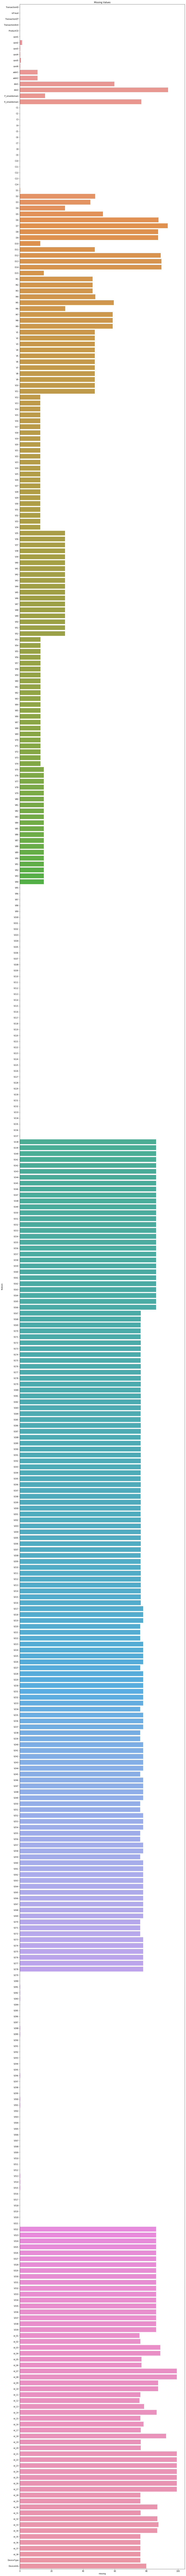

In [10]:
plt.figure(figsize=(16, 256))
sns.barplot(data=missing_data, x = 'missing', y = 'feature' );
plt.title('Missing Values');

In [11]:
def h(content):
    display(HTML(content))
    
def timehist(df, target, tcol, col, title = None, clipping=9999999999999999):
        
    df[df[target] == 0].set_index(tcol)[col].clip(0, clipping).plot(style='.', figsize=(15, 5), label='Normal')
    df[df[target] == 1].set_index(tcol)[col].clip(0, clipping).plot(style='.', figsize=(15, 5), label='Fraud')
    plt.title(title)
    plt.legend(loc = 'upper right')
    plt.show()

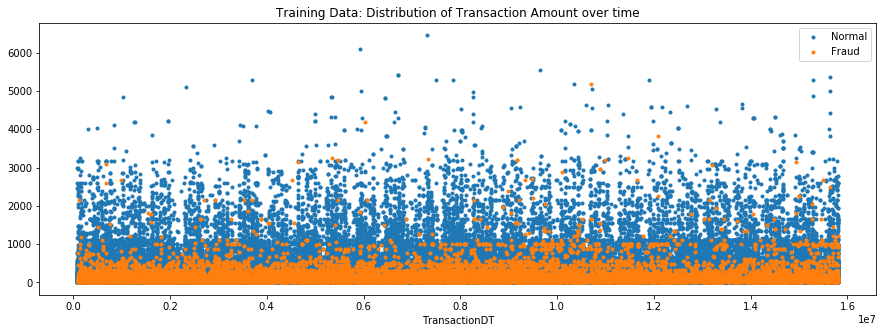

In [12]:
timehist(df=train[train['TransactionAmt']<10000], target='isFraud', tcol='TransactionDT', col='TransactionAmt', title='Training Data: Distribution of Transaction Amount over time')

In [13]:
import warnings

warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [14]:
NUMERIC, CATEG = ft.bin_features(train)

In [15]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Feature: TransactionID

count    5.905400e+05
mean     3.282270e+06
std      1.704744e+05
min      2.987000e+06
25%      3.134635e+06
50%      3.282270e+06
75%      3.429904e+06
max      3.577539e+06
Name: TransactionID, dtype: float64
 


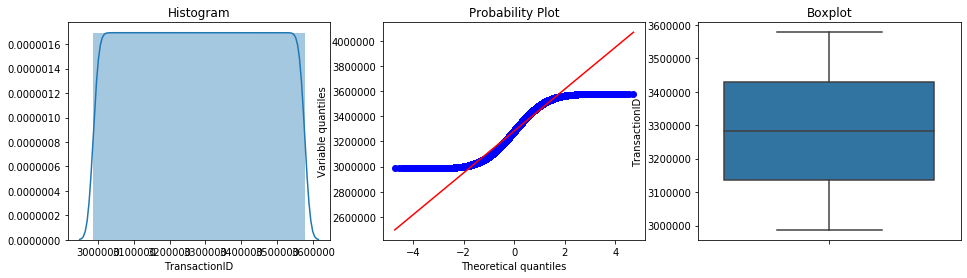

Feature: isFraud

count    590540.000000
mean          0.034990
std           0.183755
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isFraud, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


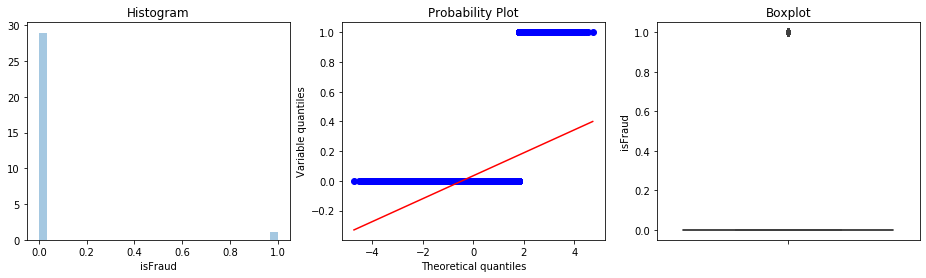

Feature: TransactionDT

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64
 


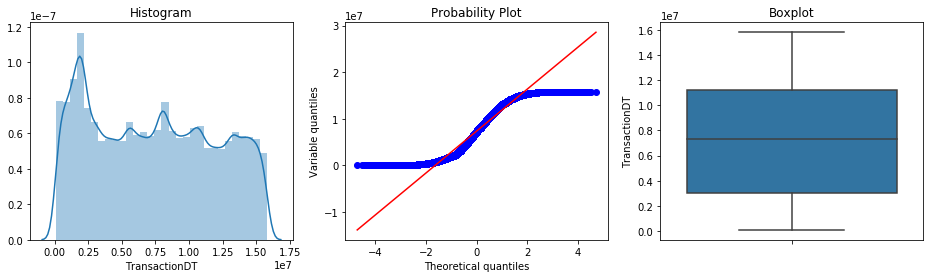

Feature: TransactionAmt

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64
 


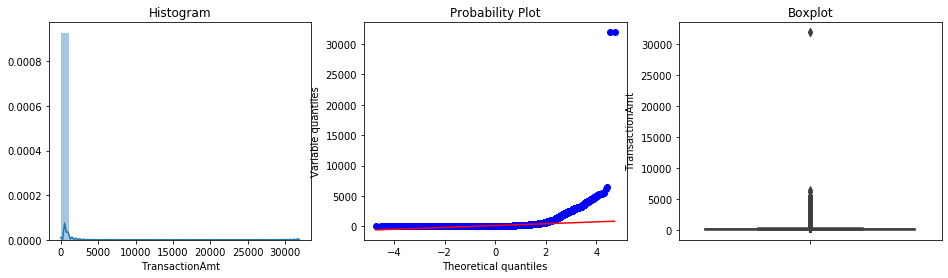

Feature: card1

count    590540.000000
mean       9898.734658
std        4901.170153
min        1000.000000
25%        6019.000000
50%        9678.000000
75%       14184.000000
max       18396.000000
Name: card1, dtype: float64
 


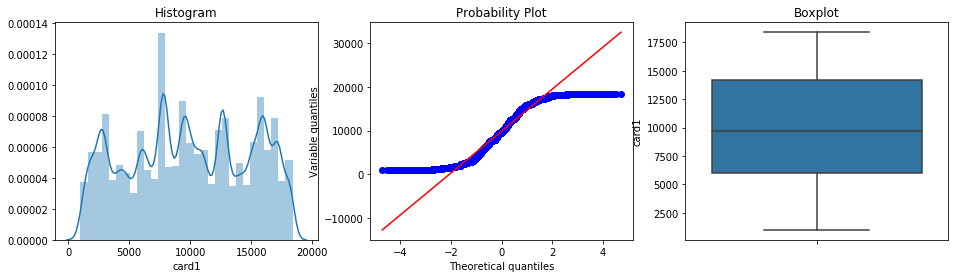

Feature: card2

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64
 


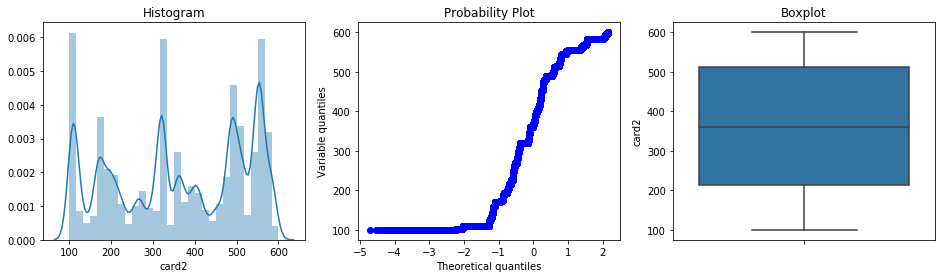

Feature: card3

count    588975.000000
mean        153.194925
std          11.336444
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


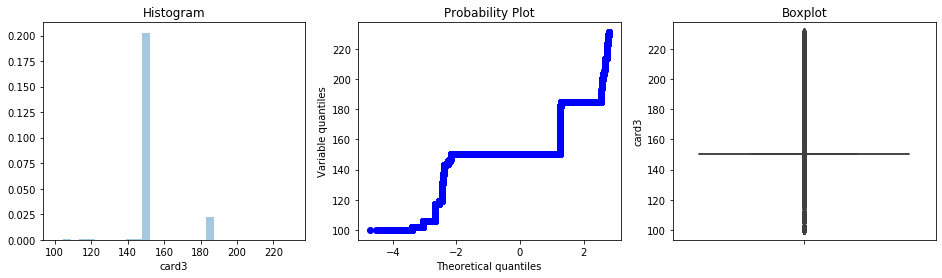

Feature: card5

count    586281.000000
mean        199.278897
std          41.244453
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64
 


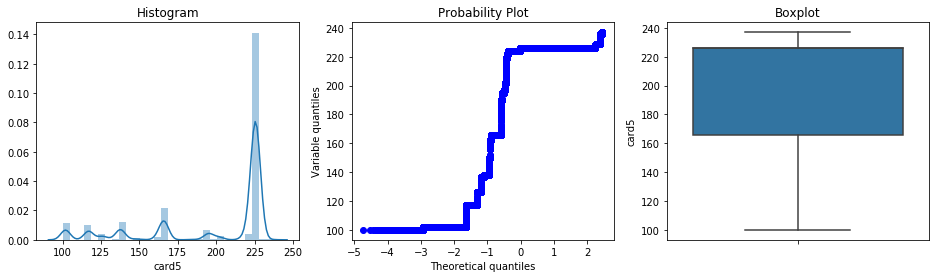

Feature: addr1

count    524834.000000
mean        290.733794
std         101.741072
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64
 


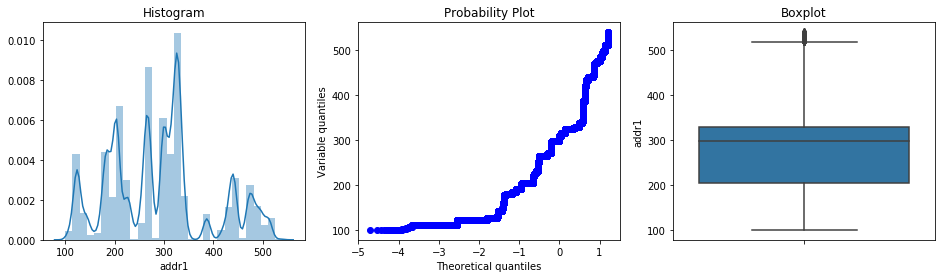

Feature: addr2

count    524834.000000
mean         86.800630
std           2.690623
min          10.000000
25%          87.000000
50%          87.000000
75%          87.000000
max         102.000000
Name: addr2, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


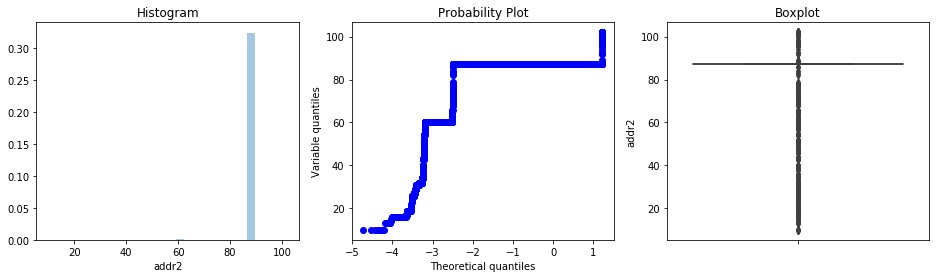

Feature: dist1

count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64
 


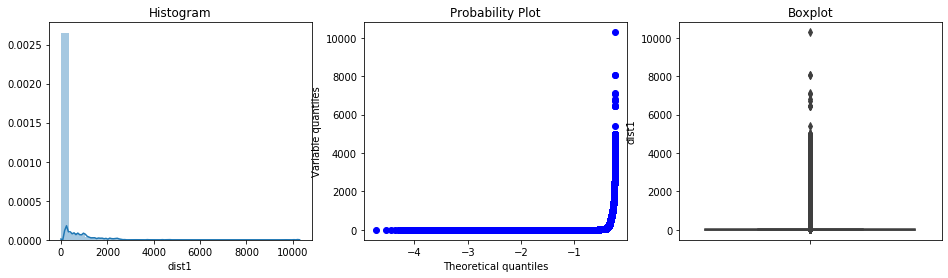

Feature: dist2

count    37627.000000
mean       231.855423
std        529.053494
min          0.000000
25%          7.000000
50%         37.000000
75%        206.000000
max      11623.000000
Name: dist2, dtype: float64
 


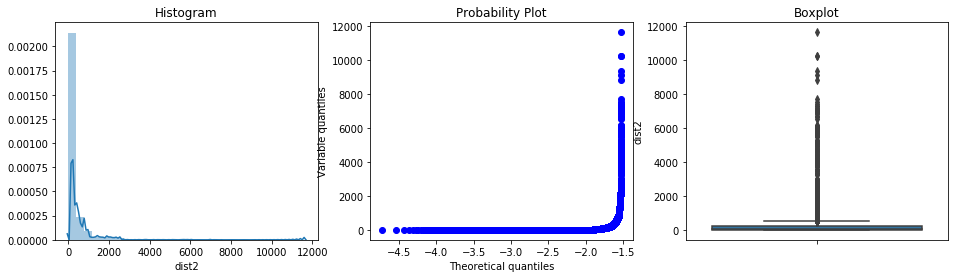

Feature: C1

count    590540.000000
mean         14.092458
std         133.569018
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        4685.000000
Name: C1, dtype: float64
 


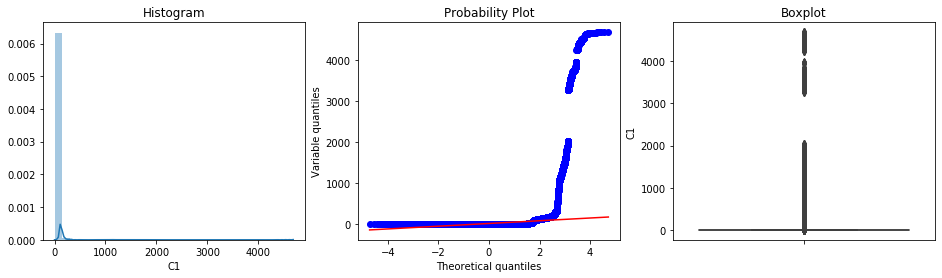

Feature: C2

count    590540.000000
mean         15.269734
std         154.668899
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        5691.000000
Name: C2, dtype: float64
 


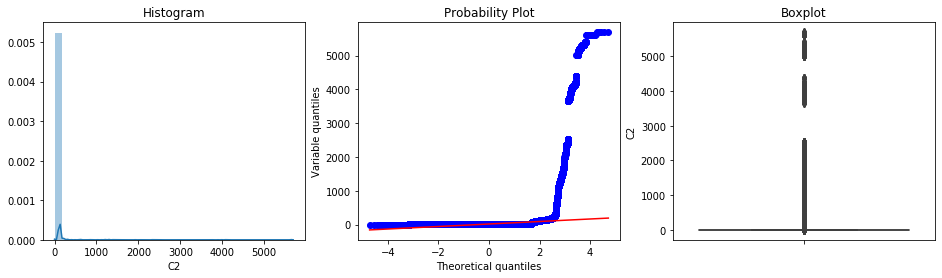

Feature: C3

count    590540.000000
mean          0.005644
std           0.150536
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: C3, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


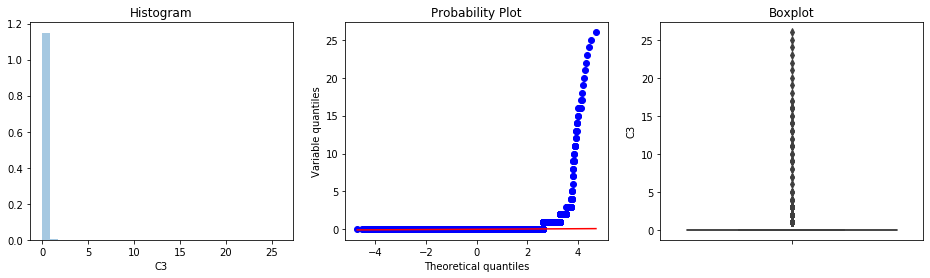

Feature: C4

count    590540.000000
mean          4.092185
std          68.848459
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2253.000000
Name: C4, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


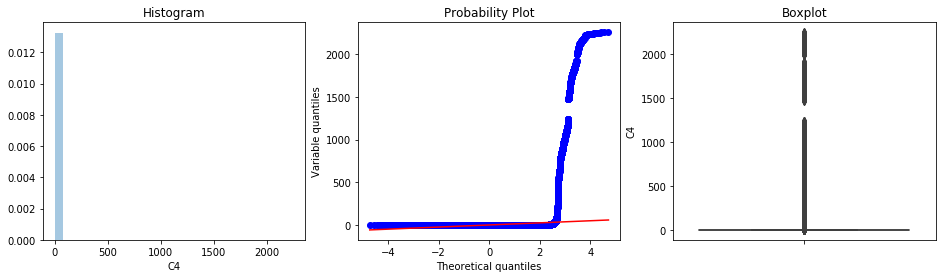

Feature: C5

count    590540.000000
mean          5.571526
std          25.786976
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         349.000000
Name: C5, dtype: float64
 


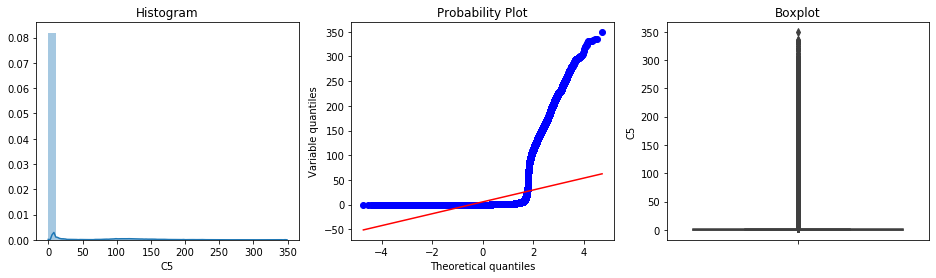

Feature: C6

count    590540.000000
mean          9.071082
std          71.508467
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2253.000000
Name: C6, dtype: float64
 


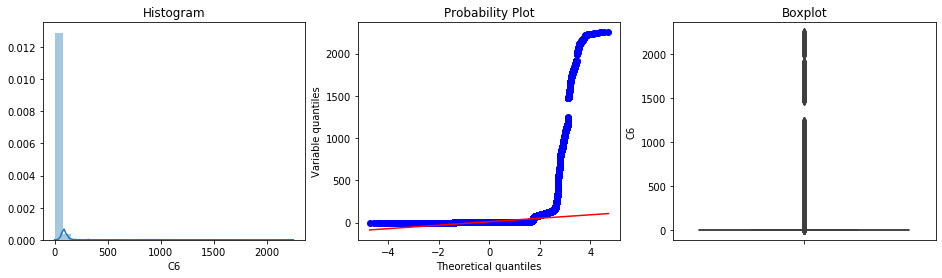

Feature: C7

count    590540.000000
mean          2.848478
std          61.727304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2255.000000
Name: C7, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


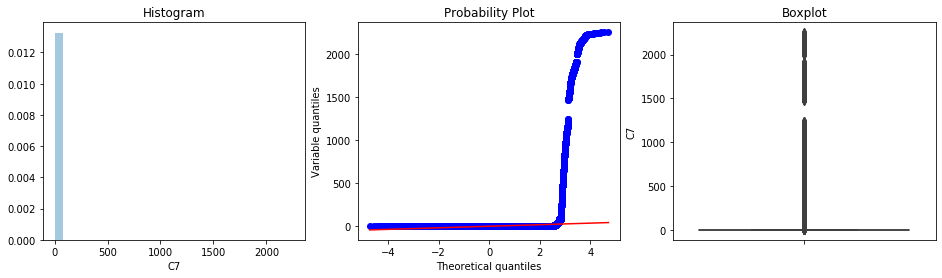

Feature: C8

count    590540.000000
mean          5.144574
std          95.378574
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3331.000000
Name: C8, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


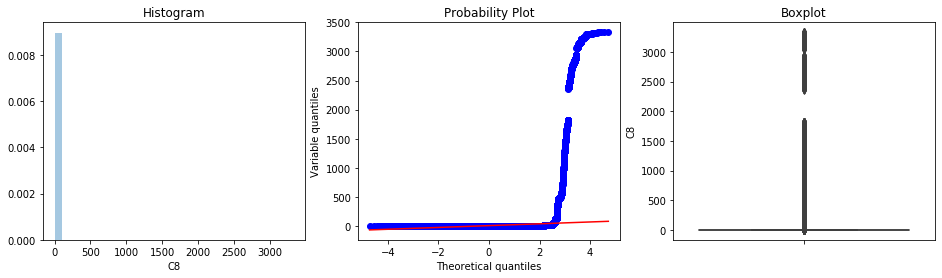

Feature: C9

count    590540.000000
mean          4.480240
std          16.674897
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         210.000000
Name: C9, dtype: float64
 


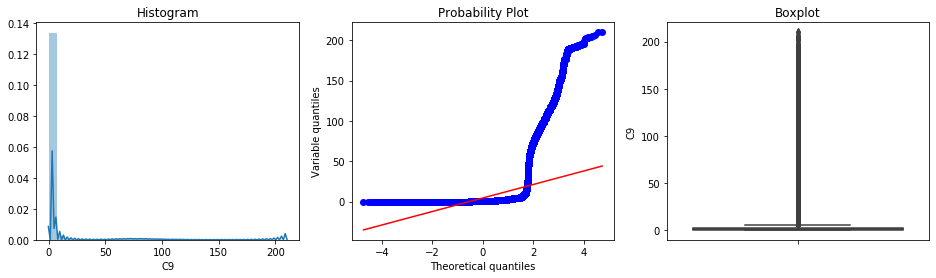

Feature: C10

count    590540.000000
mean          5.240343
std          95.581443
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3257.000000
Name: C10, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


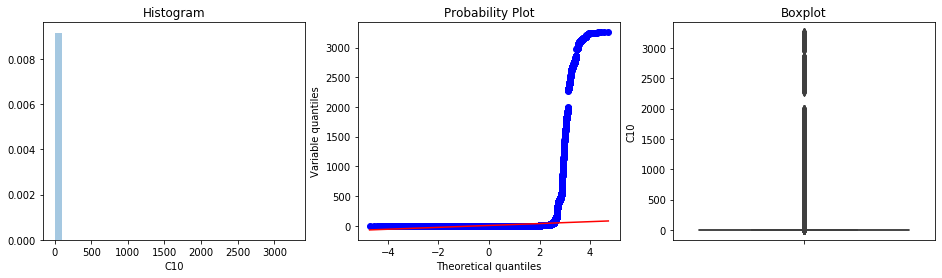

Feature: C11

count    590540.000000
mean         10.241521
std          94.336292
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        3188.000000
Name: C11, dtype: float64
 


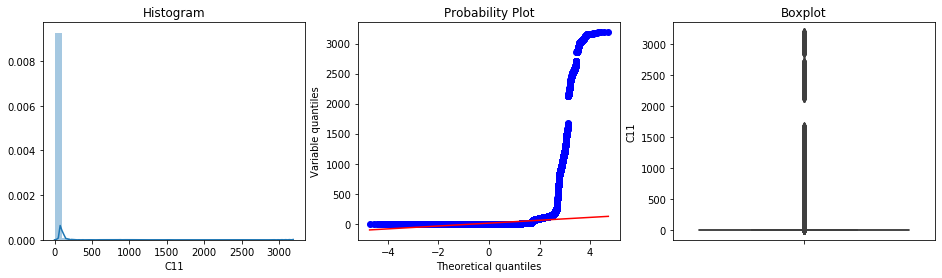

Feature: C12

count    590540.000000
mean          4.076227
std          86.666218
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3188.000000
Name: C12, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


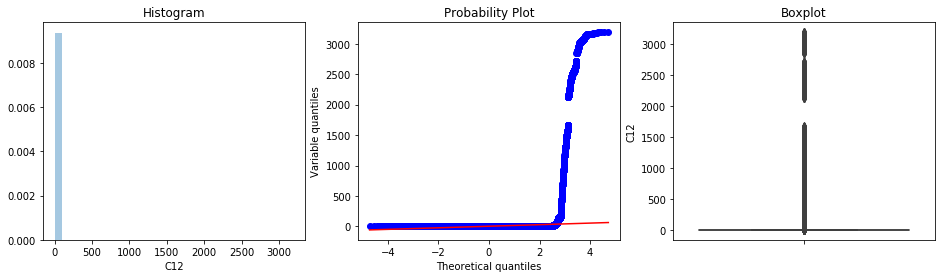

Feature: C13

count    590540.000000
mean         32.539918
std         129.364844
min           0.000000
25%           1.000000
50%           3.000000
75%          12.000000
max        2918.000000
Name: C13, dtype: float64
 


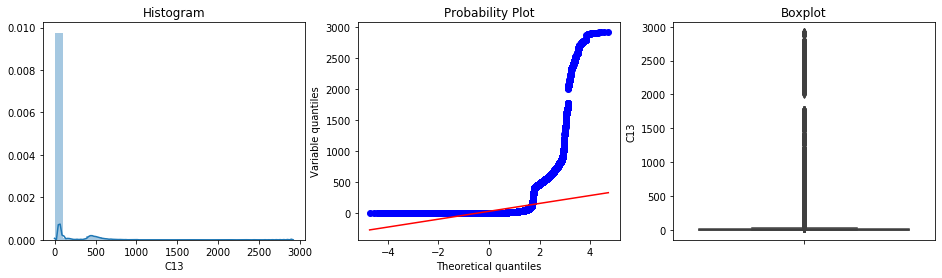

Feature: C14

count    590540.000000
mean          8.295215
std          49.544262
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1429.000000
Name: C14, dtype: float64
 


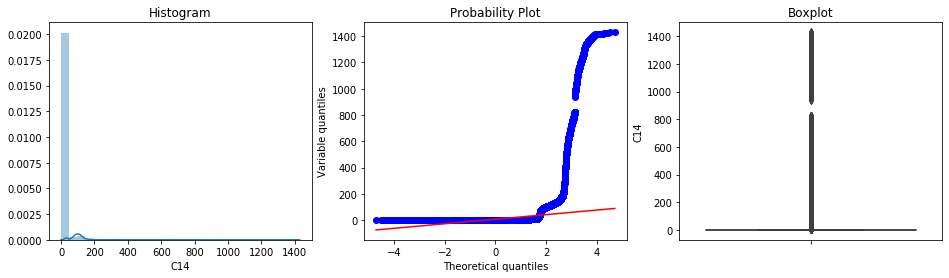

Feature: D1

count    589271.000000
mean         94.347568
std         157.660387
min           0.000000
25%           0.000000
50%           3.000000
75%         122.000000
max         640.000000
Name: D1, dtype: float64
 


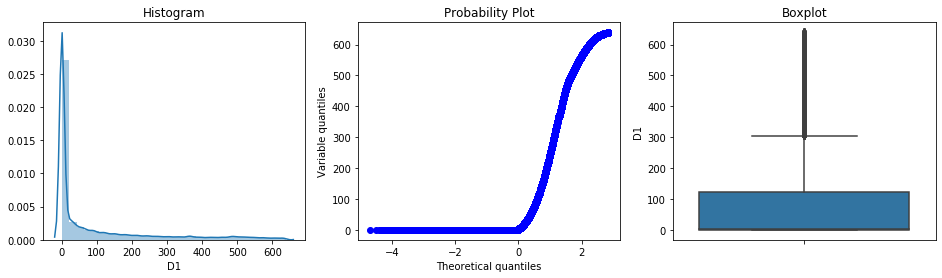

Feature: D2

count    309743.000000
mean        169.563231
std         177.315865
min           0.000000
25%          26.000000
50%          97.000000
75%         276.000000
max         640.000000
Name: D2, dtype: float64
 


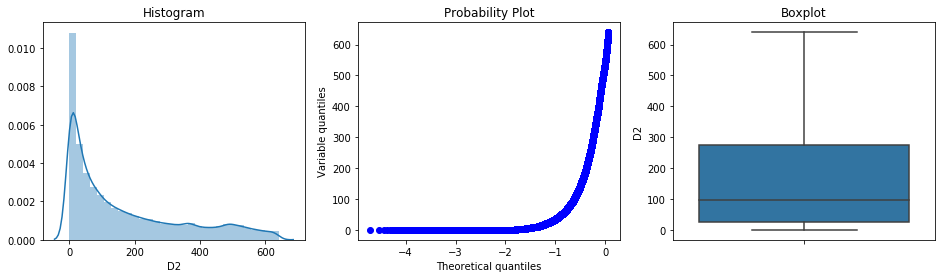

Feature: D3

count    327662.000000
mean         28.343348
std          62.384721
min           0.000000
25%           1.000000
50%           8.000000
75%          27.000000
max         819.000000
Name: D3, dtype: float64
 


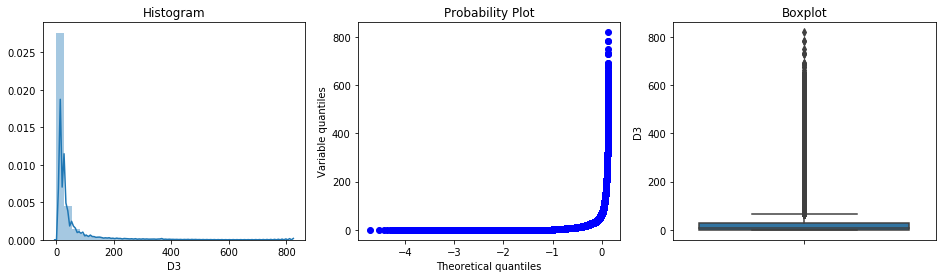

Feature: D4

count    421618.000000
mean        140.002441
std         191.096774
min        -122.000000
25%           0.000000
50%          26.000000
75%         253.000000
max         869.000000
Name: D4, dtype: float64
 


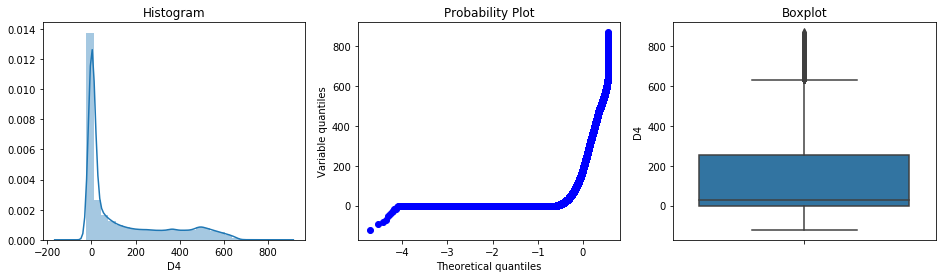

Feature: D5

count    280699.000000
mean         42.335965
std          89.000144
min           0.000000
25%           1.000000
50%          10.000000
75%          32.000000
max         819.000000
Name: D5, dtype: float64
 


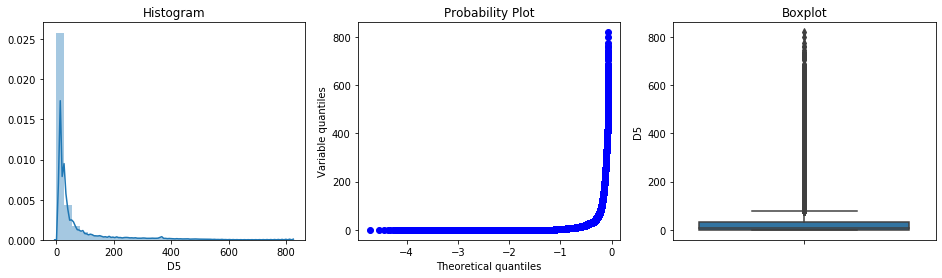

Feature: D6

count    73187.000000
mean        69.805717
std        143.669253
min        -83.000000
25%          0.000000
50%          0.000000
75%         40.000000
max        873.000000
Name: D6, dtype: float64
 


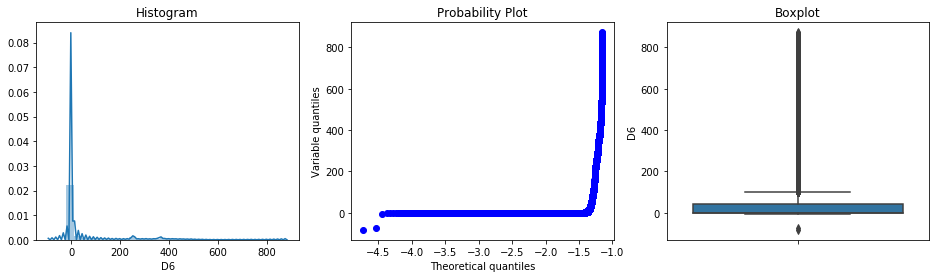

Feature: D7

count    38917.000000
mean        41.638950
std         99.743264
min          0.000000
25%          0.000000
50%          0.000000
75%         17.000000
max        843.000000
Name: D7, dtype: float64
 


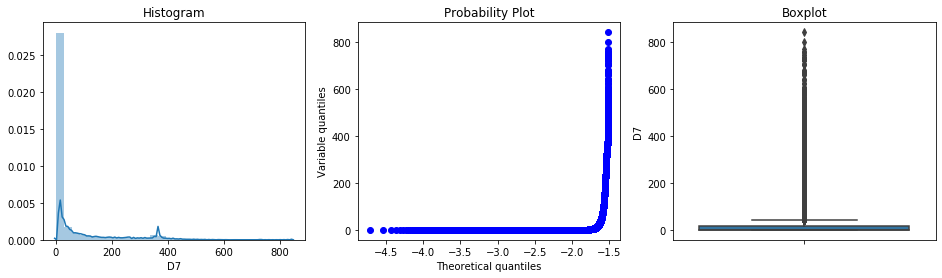

Feature: D8

count    74926.000000
mean       146.058108
std        231.663840
min          0.000000
25%          0.958333
50%         37.875000
75%        187.958328
max       1707.791626
Name: D8, dtype: float64
 


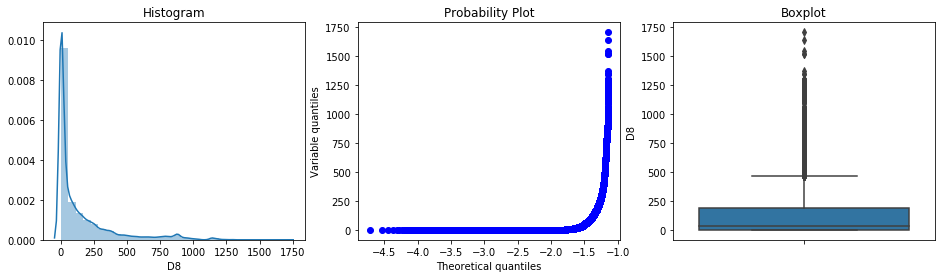

Feature: D9

count    74926.000000
mean         0.561057
std          0.316880
min          0.000000
25%          0.208333
50%          0.666666
75%          0.833333
max          0.958333
Name: D9, dtype: float64
 


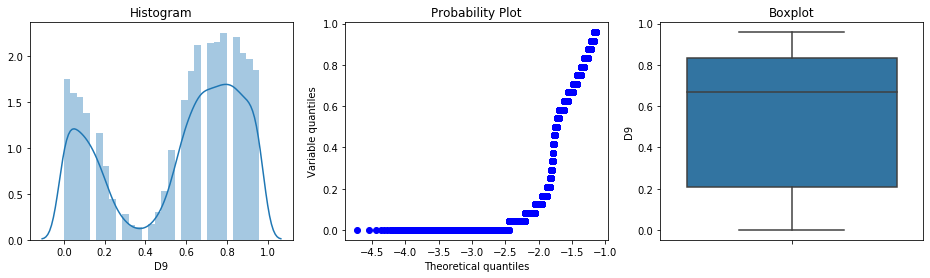

Feature: D10

count    514518.000000
mean        123.982137
std         182.615225
min           0.000000
25%           0.000000
50%          15.000000
75%         197.000000
max         876.000000
Name: D10, dtype: float64
 


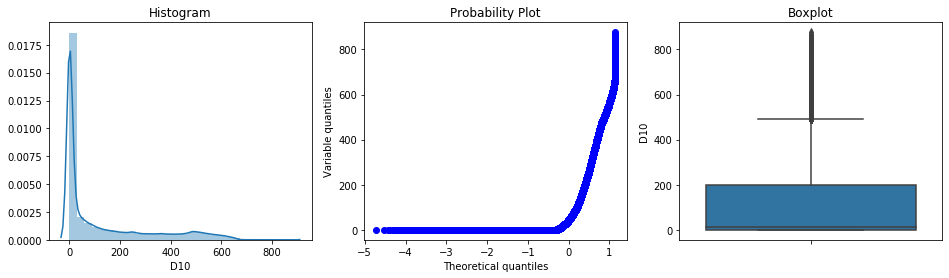

Feature: D11

count    311253.000000
mean        146.621465
std         186.042622
min         -53.000000
25%           0.000000
50%          43.000000
75%         274.000000
max         670.000000
Name: D11, dtype: float64
 


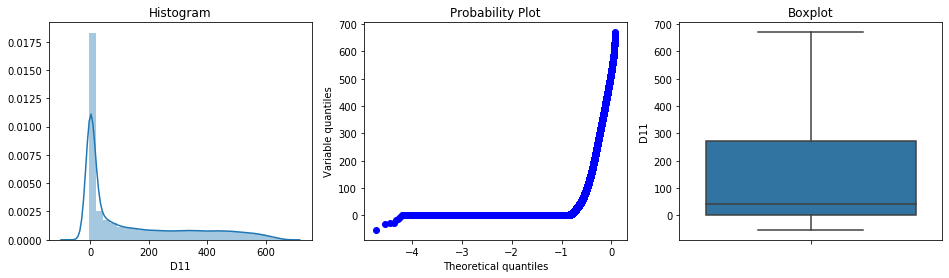

Feature: D12

count    64717.000000
mean        54.037533
std        124.274558
min        -83.000000
25%          0.000000
50%          0.000000
75%         13.000000
max        648.000000
Name: D12, dtype: float64
 


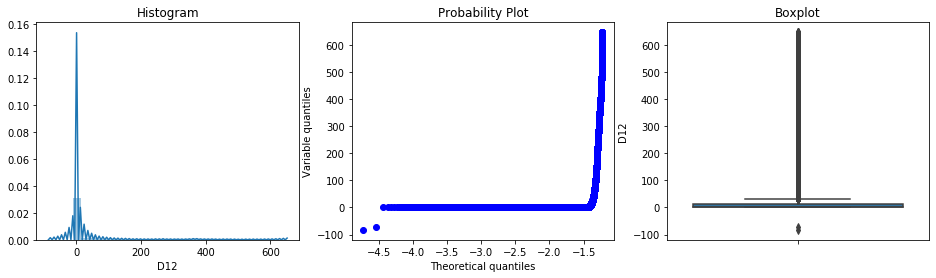

Feature: D13

count    61952.000000
mean        17.901295
std         67.614425
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        847.000000
Name: D13, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


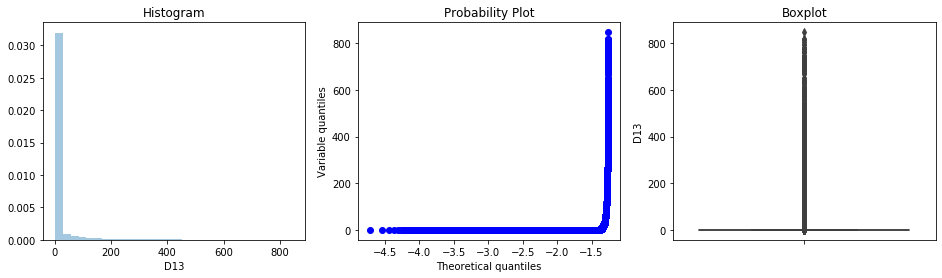

Feature: D14

count    62187.000000
mean        57.724444
std        136.312450
min       -193.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        878.000000
Name: D14, dtype: float64
 


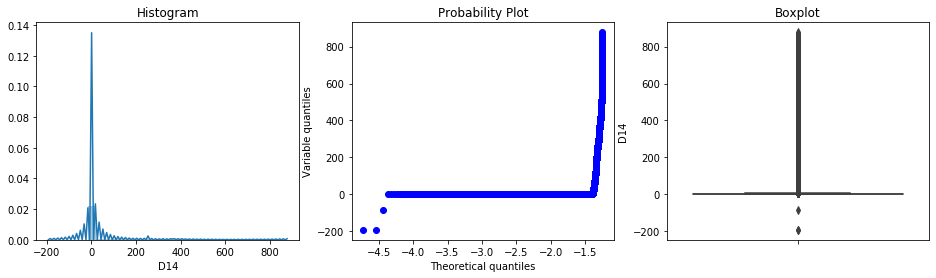

Feature: D15

count    501427.000000
mean        163.744579
std         202.726660
min         -83.000000
25%           0.000000
50%          52.000000
75%         314.000000
max         879.000000
Name: D15, dtype: float64
 


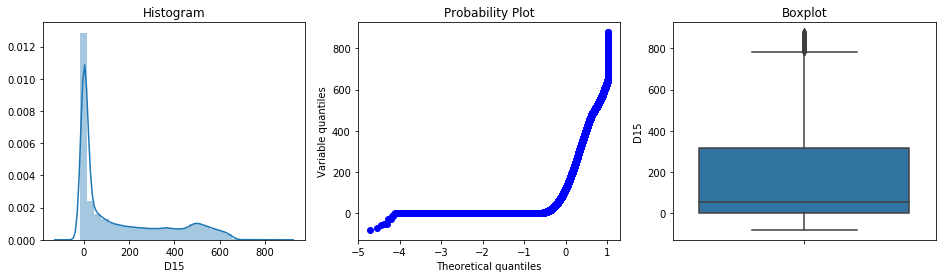

Feature: V1

count    311253.000000
mean          0.999945
std           0.007390
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: V1, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


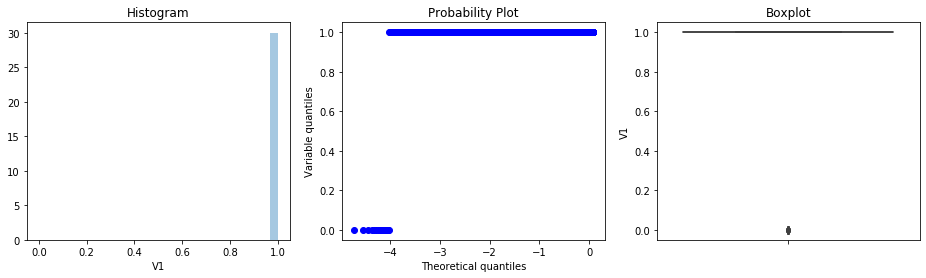

Feature: V2

count    311253.000000
mean          1.045204
std           0.240133
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: V2, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


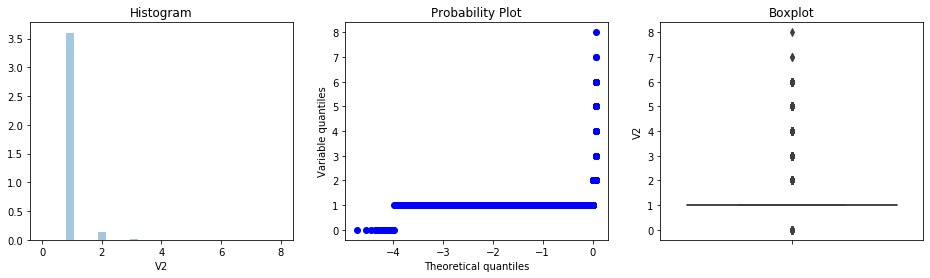

Feature: V3

count    311253.000000
mean          1.078075
std           0.320890
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: V3, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


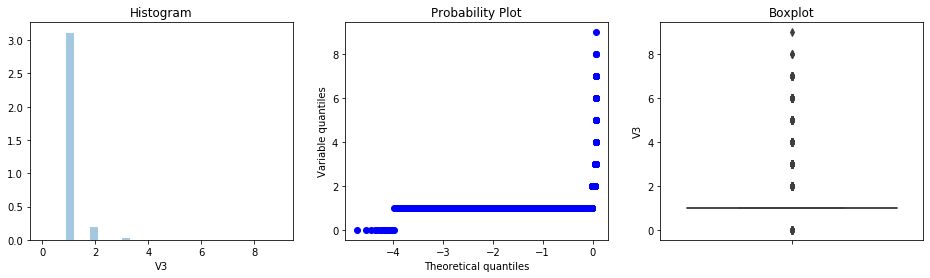

Feature: V4

count    311253.000000
mean          0.846456
std           0.440053
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V4, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


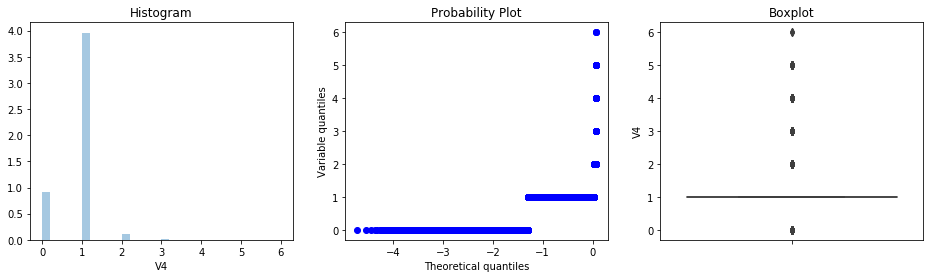

Feature: V5

count    311253.000000
mean          0.876991
std           0.475902
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V5, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


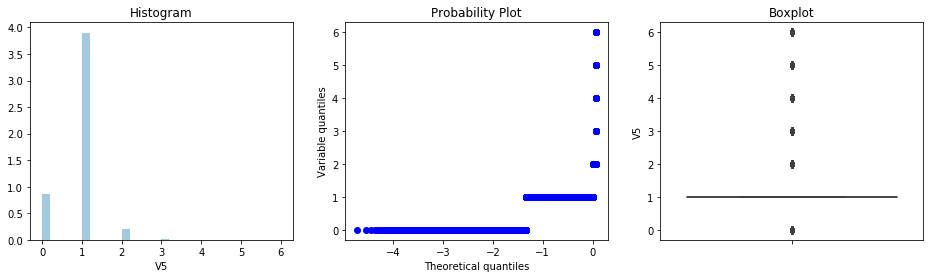

Feature: V6

count    311253.000000
mean          1.045686
std           0.239385
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: V6, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


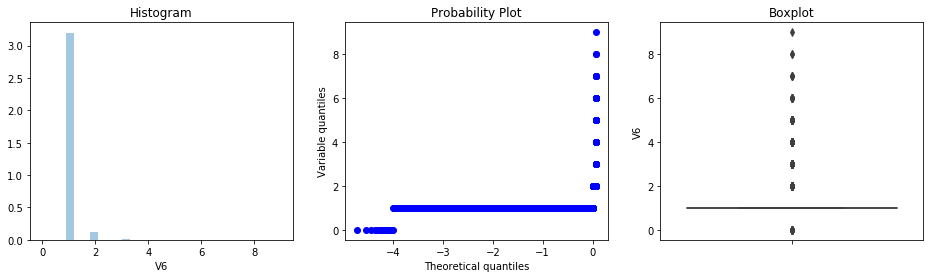

Feature: V7

count    311253.000000
mean          1.072870
std           0.304779
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: V7, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


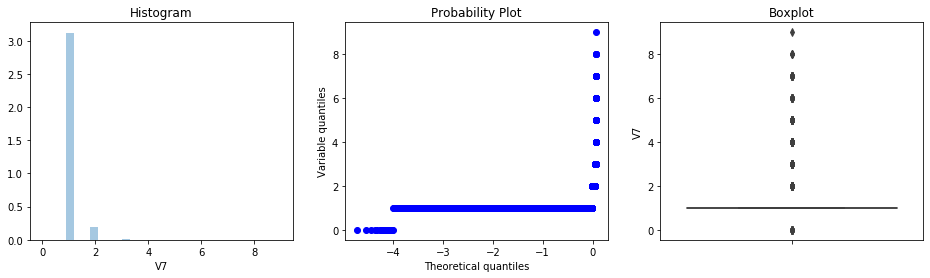

Feature: V8

count    311253.000000
mean          1.027704
std           0.186069
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: V8, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


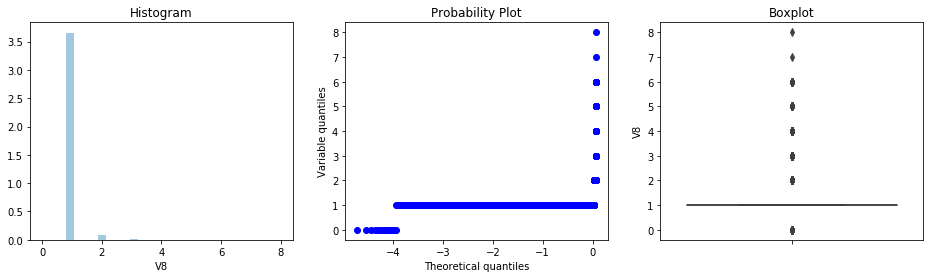

Feature: V9

count    311253.000000
mean          1.041529
std           0.226339
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: V9, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


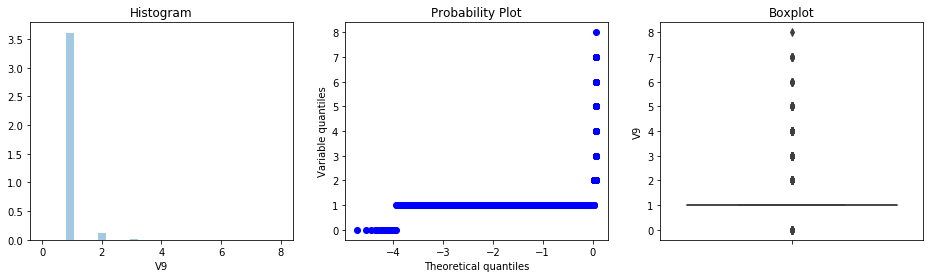

Feature: V10

count    311253.000000
mean          0.463915
std           0.521522
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: V10, dtype: float64
 


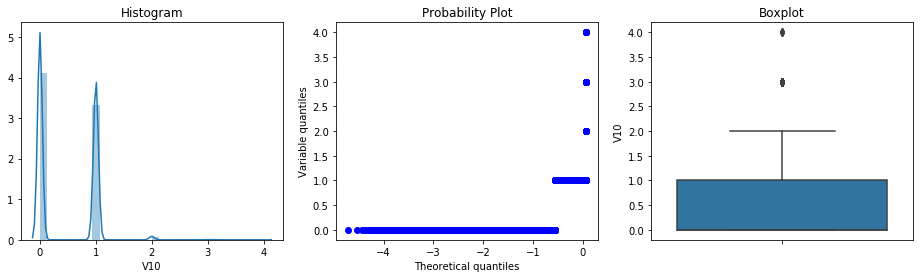

Feature: V11

count    311253.000000
mean          0.478987
std           0.552431
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: V11, dtype: float64
 


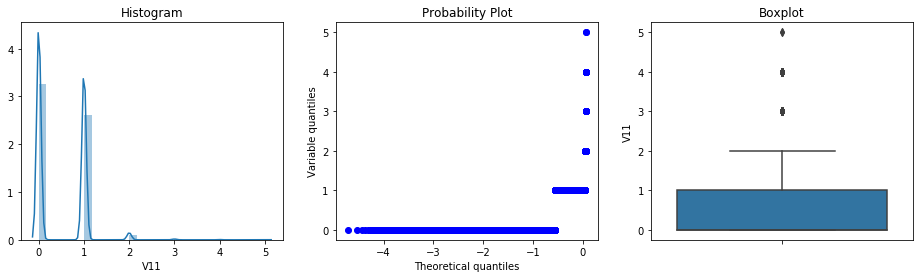

Feature: V12

count    514467.000000
mean          0.559711
std           0.510533
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V12, dtype: float64
 


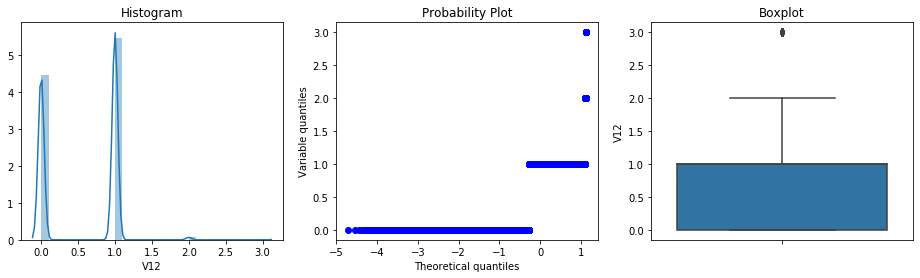

Feature: V13

count    514467.000000
mean          0.599166
std           0.532185
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V13, dtype: float64
 


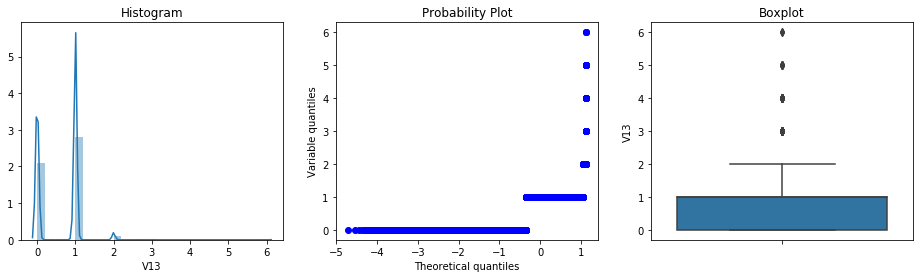

Feature: V14

count    514467.000000
mean          0.999500
std           0.022345
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: V14, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


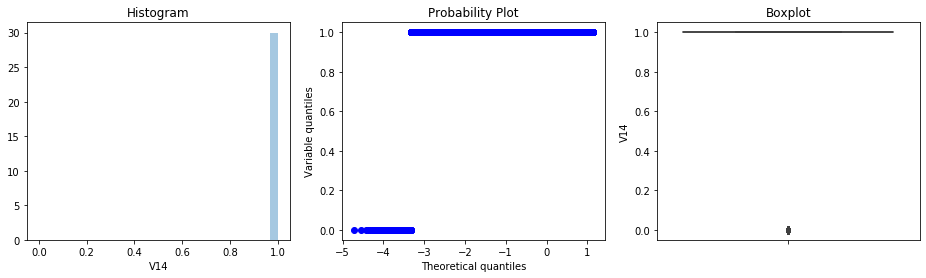

Feature: V15

count    514467.000000
mean          0.122342
std           0.332422
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V15, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


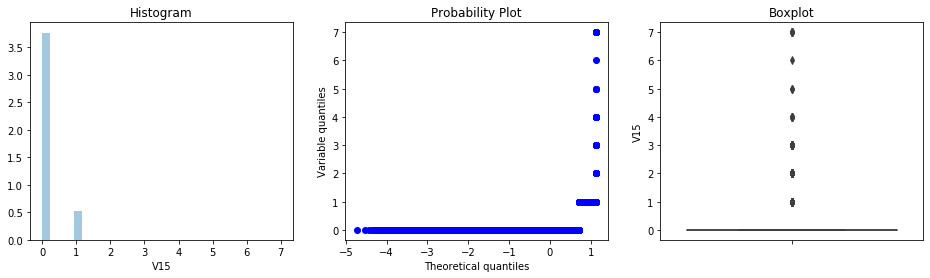

Feature: V16

count    514467.000000
mean          0.123460
std           0.342841
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: V16, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


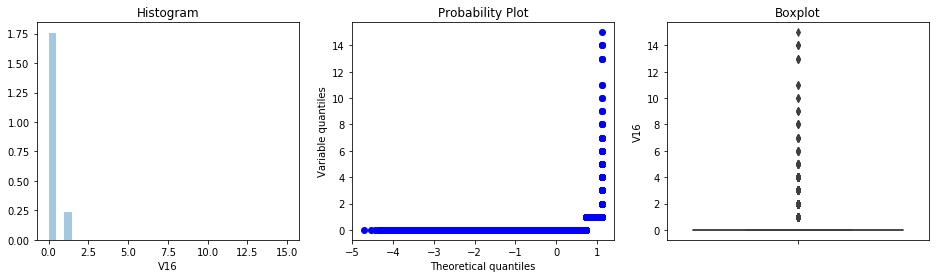

Feature: V17

count    514467.000000
mean          0.134040
std           0.364456
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: V17, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


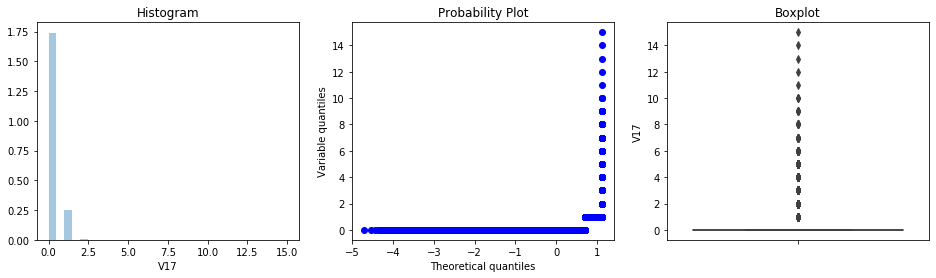

Feature: V18

count    514467.000000
mean          0.135363
std           0.371763
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: V18, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


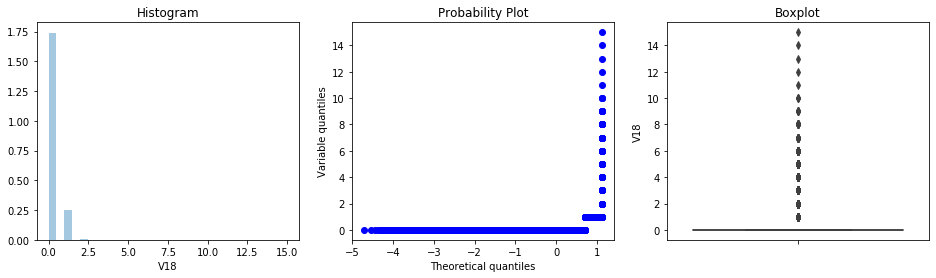

Feature: V19

count    514467.000000
mean          0.816371
std           0.425512
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: V19, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


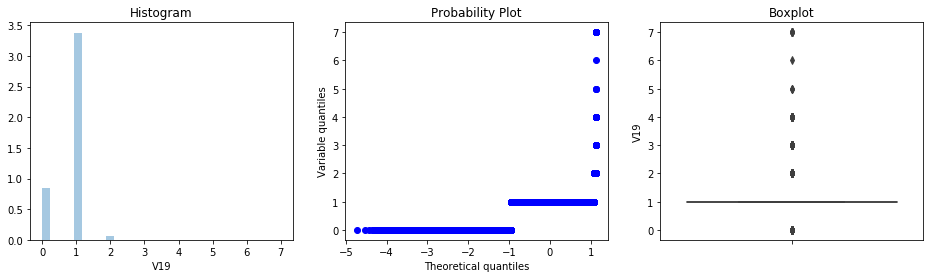

Feature: V20

count    514467.000000
mean          0.847843
std           0.459451
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          15.000000
Name: V20, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


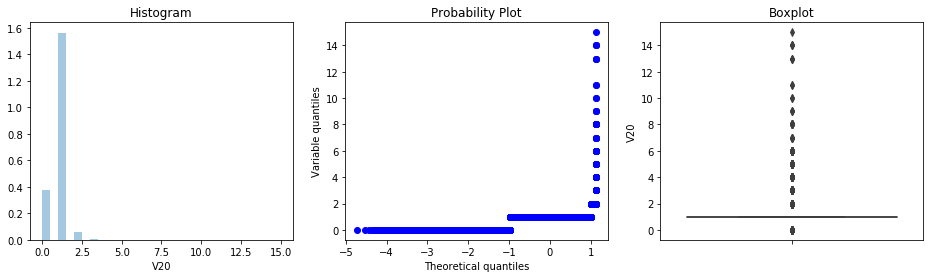

Feature: V21

count    514467.000000
mean          0.129684
std           0.339060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: V21, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


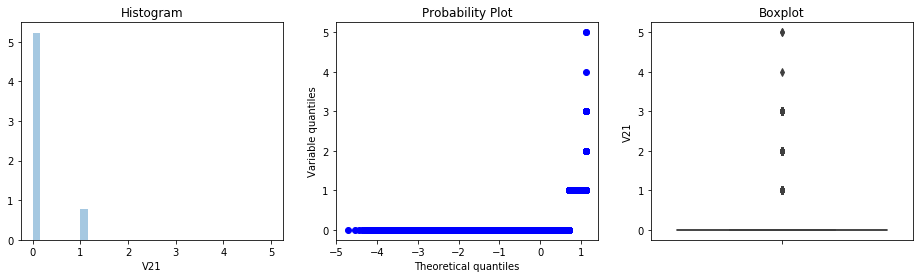

Feature: V22

count    514467.000000
mean          0.132292
std           0.359415
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: V22, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


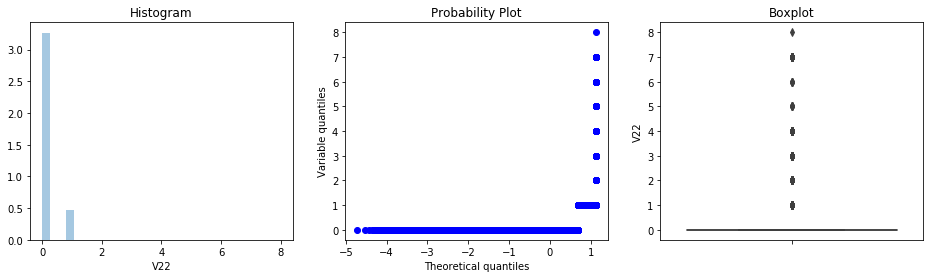

Feature: V23

count    514467.000000
mean          1.034791
std           0.247681
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          13.000000
Name: V23, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


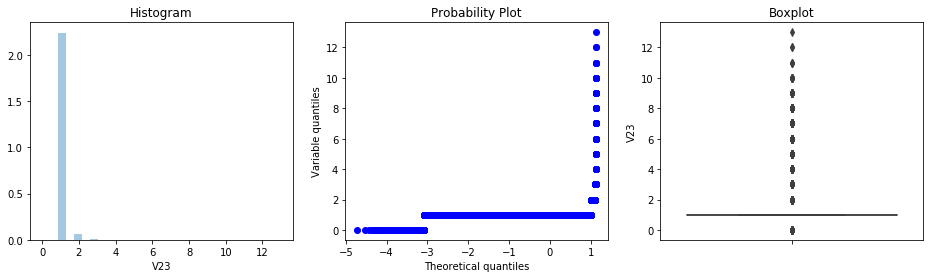

Feature: V24

count    514467.000000
mean          1.058097
std           0.305485
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          13.000000
Name: V24, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


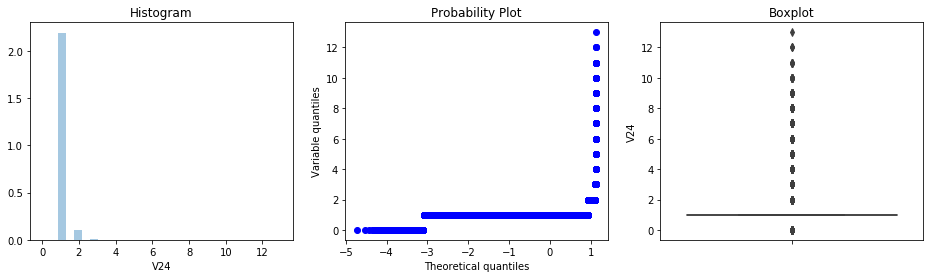

Feature: V25

count    514467.000000
mean          0.977660
std           0.185245
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: V25, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


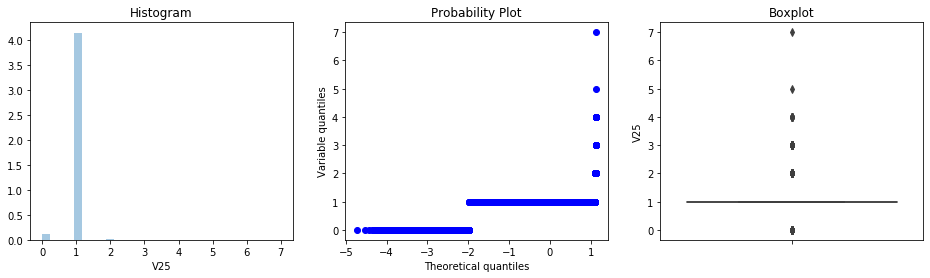

Feature: V26

count    514467.000000
mean          0.988040
std           0.209302
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          13.000000
Name: V26, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


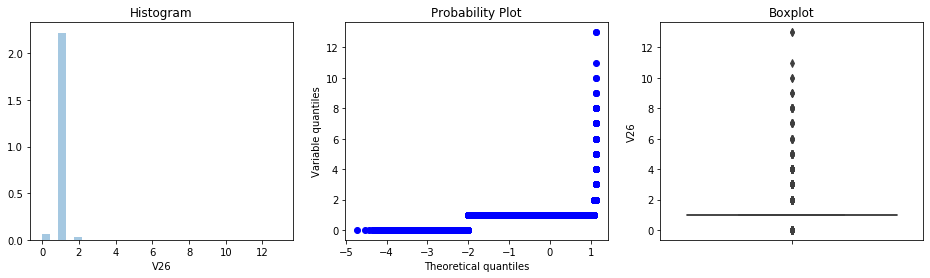

Feature: V27

count    514467.000000
mean          0.000776
std           0.028596
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: V27, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


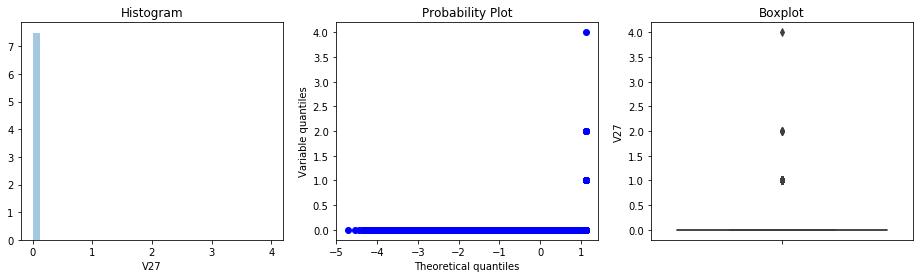

Feature: V28

count    514467.000000
mean          0.000830
std           0.031133
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: V28, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


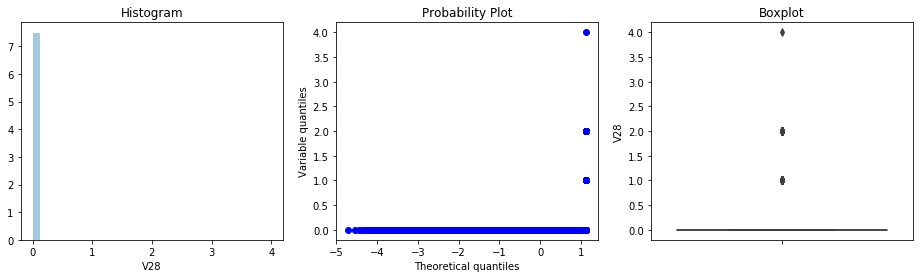

Feature: V29

count    514467.000000
mean          0.387840
std           0.510652
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: V29, dtype: float64
 


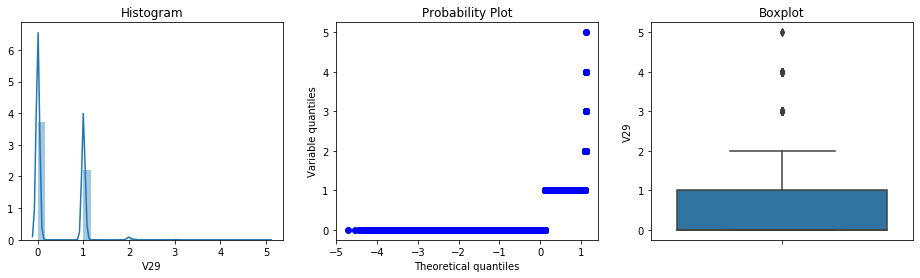

Feature: V30

count    514467.000000
mean          0.406436
std           0.554311
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: V30, dtype: float64
 


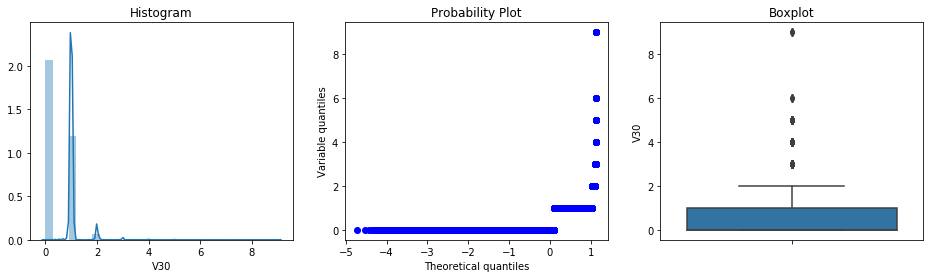

Feature: V31

count    514467.000000
mean          0.140761
std           0.355793
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V31, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


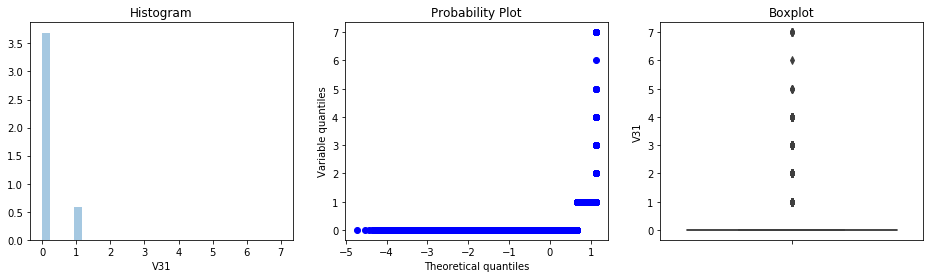

Feature: V32

count    514467.000000
mean          0.142417
std           0.368278
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: V32, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


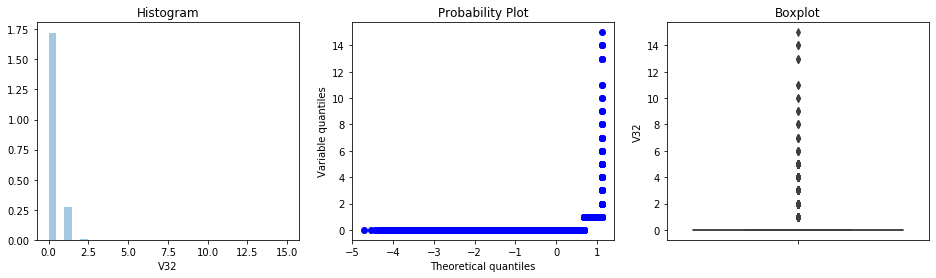

Feature: V33

count    514467.000000
mean          0.130693
std           0.340900
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V33, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


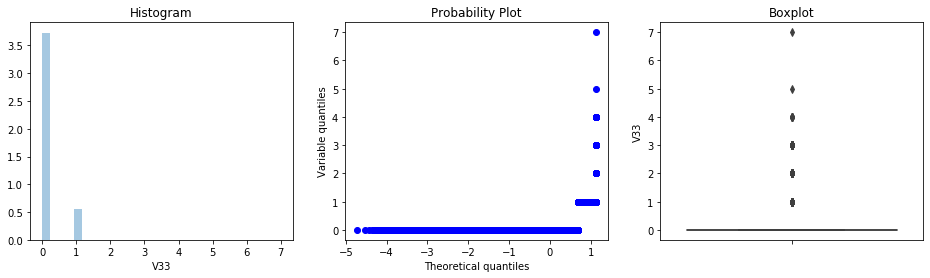

Feature: V34

count    514467.000000
mean          0.139154
std           0.357549
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: V34, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


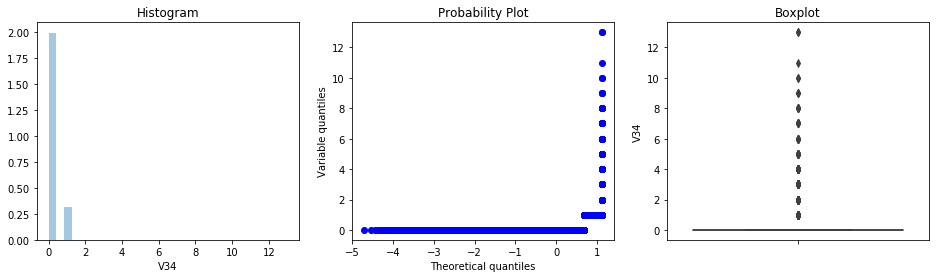

Feature: V35

count    421571.000000
mean          0.542594
std           0.516010
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V35, dtype: float64
 


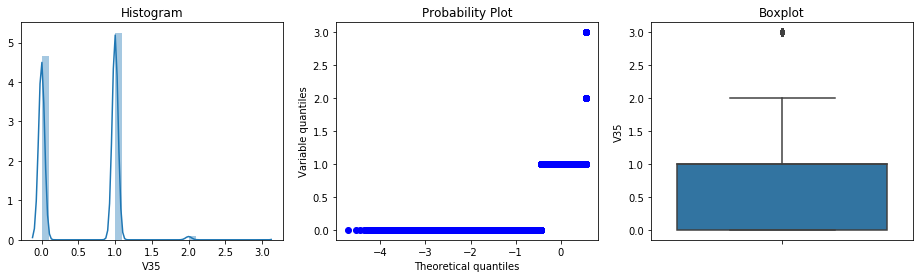

Feature: V36

count    421571.000000
mean          0.579198
std           0.539039
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: V36, dtype: float64
 


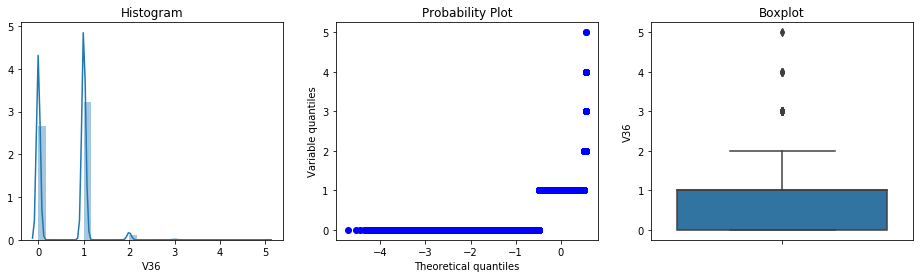

Feature: V37

count    421571.000000
mean          1.108065
std           0.690571
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          54.000000
Name: V37, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


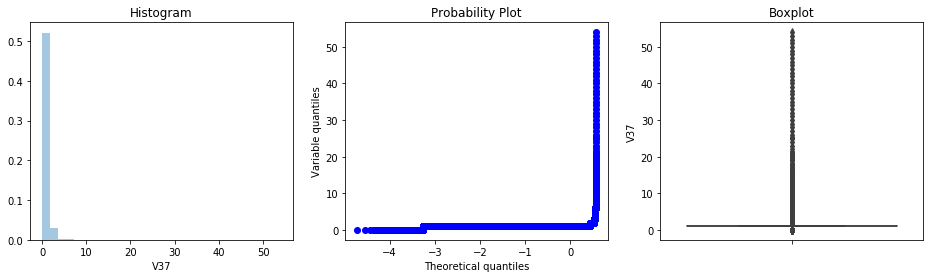

Feature: V38

count    421571.00000
mean          1.16240
std           0.85892
min           0.00000
25%           1.00000
50%           1.00000
75%           1.00000
max          54.00000
Name: V38, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


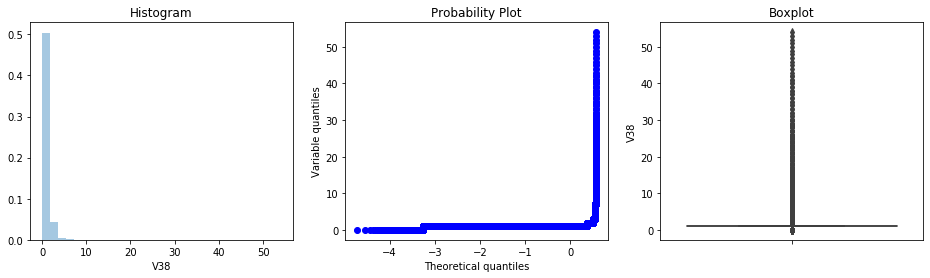

Feature: V39

count    421571.000000
mean          0.166076
std           0.451956
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: V39, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


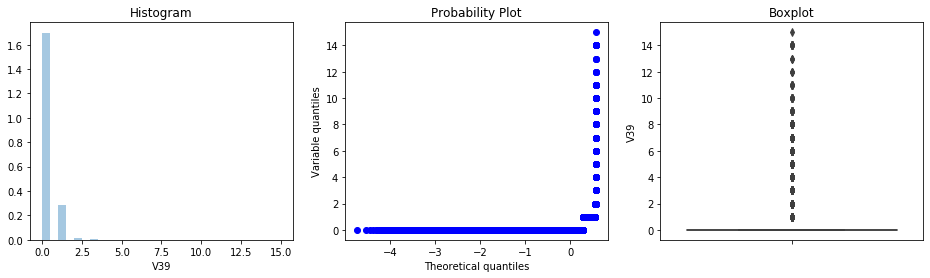

Feature: V40

count    421571.000000
mean          0.177145
std           0.505786
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: V40, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


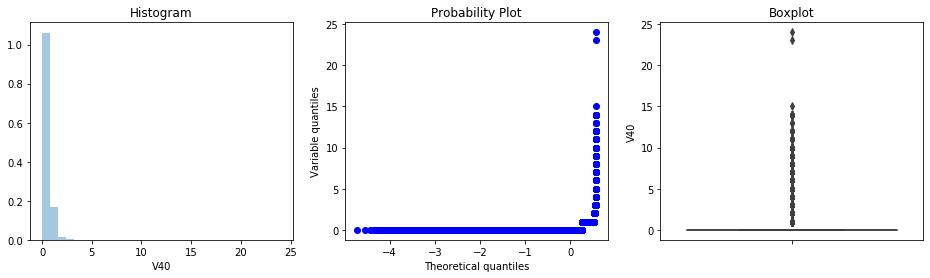

Feature: V41

count    421571.000000
mean          0.999269
std           0.027020
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: V41, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


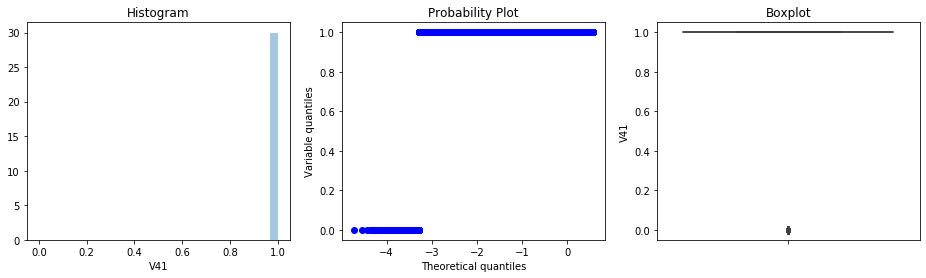

Feature: V42

count    421571.000000
mean          0.156118
std           0.382896
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: V42, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


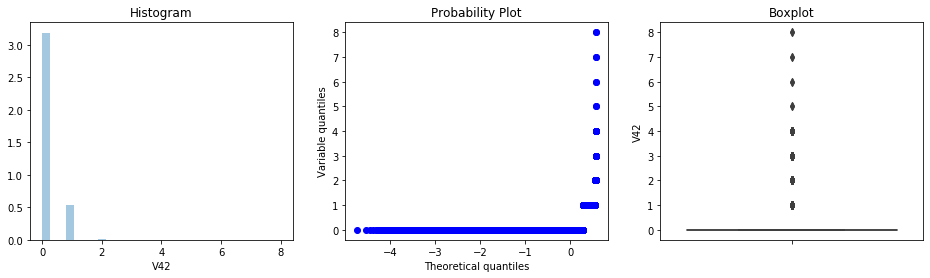

Feature: V43

count    421571.000000
mean          0.168942
std           0.433359
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: V43, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


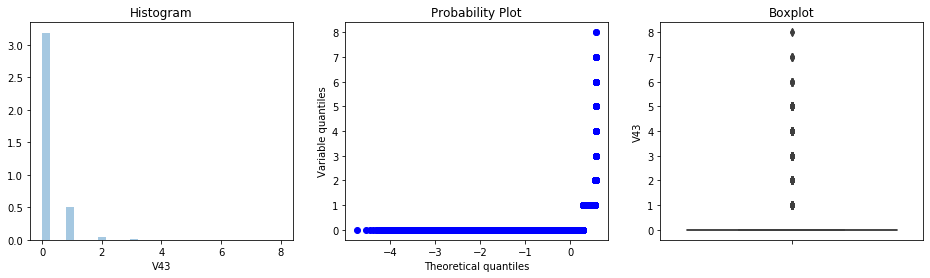

Feature: V44

count    421571.000000
mean          1.083891
std           0.639143
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          48.000000
Name: V44, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


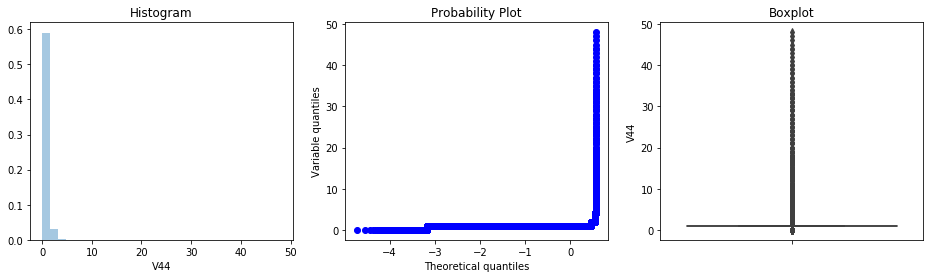

Feature: V45

count    421571.000000
mean          1.120779
std           0.729774
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          48.000000
Name: V45, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


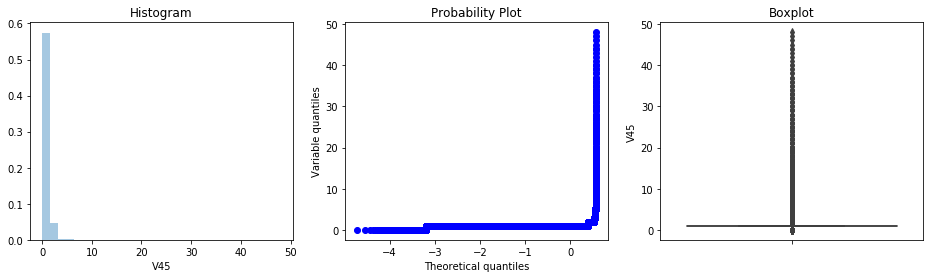

Feature: V46

count    421571.000000
mean          1.022286
std           0.166719
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V46, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


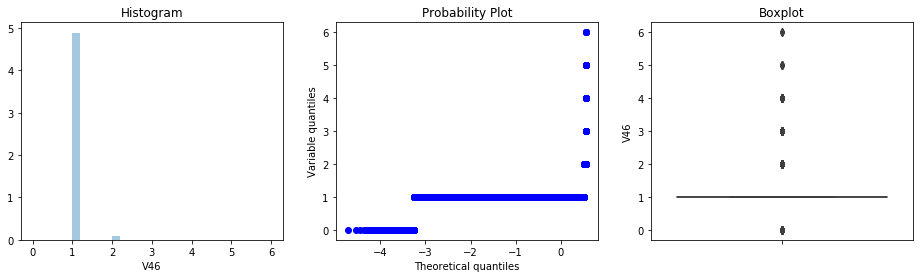

Feature: V47

count    421571.000000
mean          1.038515
std           0.231862
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          12.000000
Name: V47, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


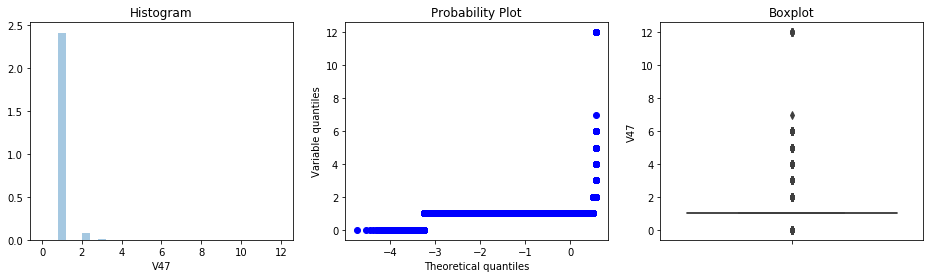

Feature: V48

count    421571.000000
mean          0.383174
std           0.508189
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: V48, dtype: float64
 


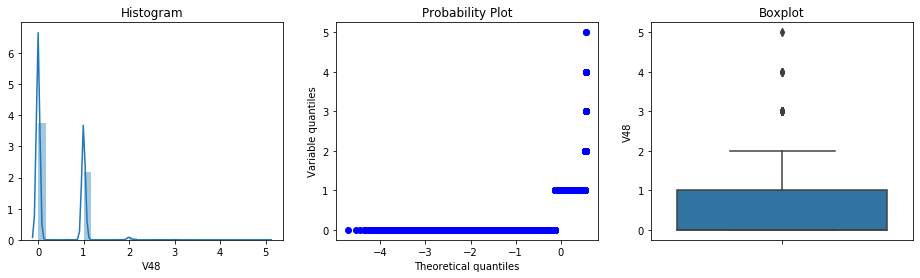

Feature: V49

count    421571.000000
mean          0.397724
std           0.542654
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: V49, dtype: float64
 


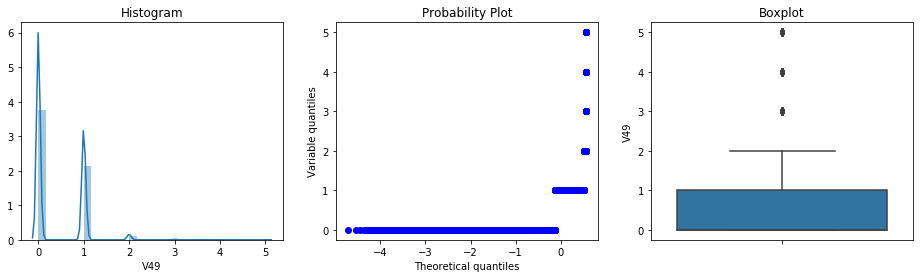

Feature: V50

count    421571.000000
mean          0.164746
std           0.373995
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: V50, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


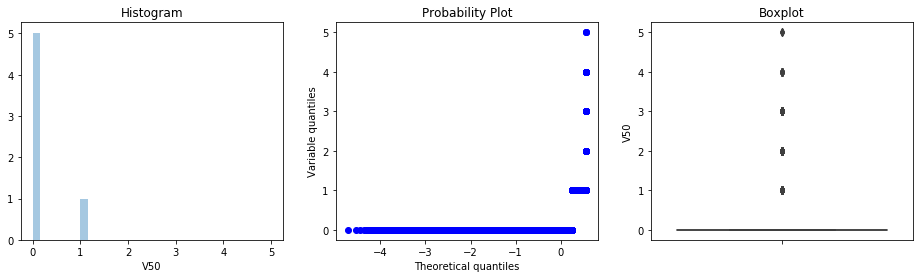

Feature: V51

count    421571.000000
mean          0.170579
std           0.403899
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: V51, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


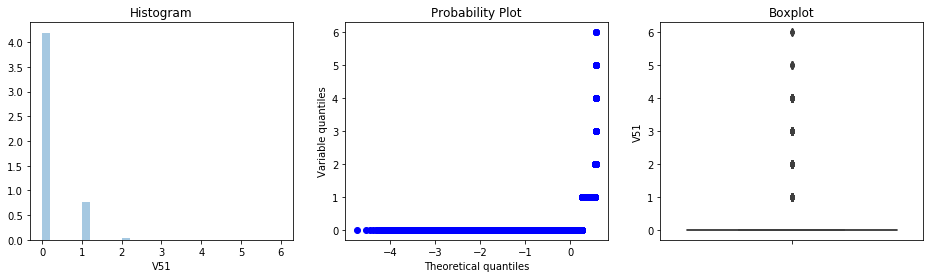

Feature: V52

count    421571.000000
mean          0.182695
std           0.439002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: V52, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


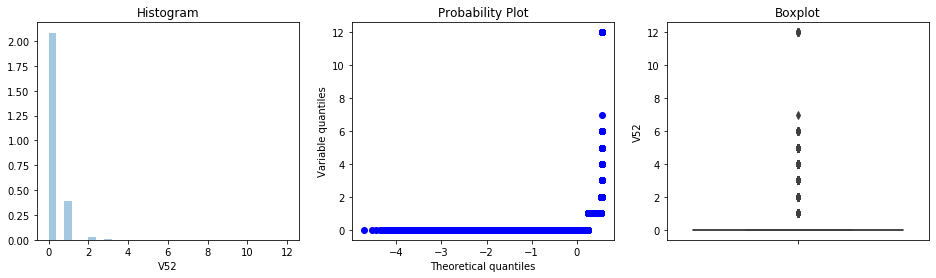

Feature: V53

count    513444.000000
mean          0.577586
std           0.511571
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: V53, dtype: float64
 


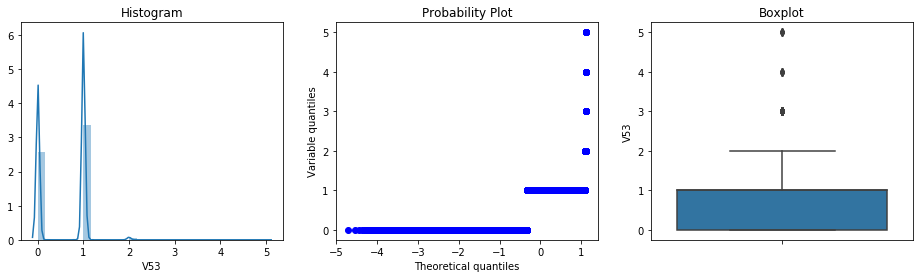

Feature: V54

count    513444.000000
mean          0.619982
std           0.534635
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V54, dtype: float64
 


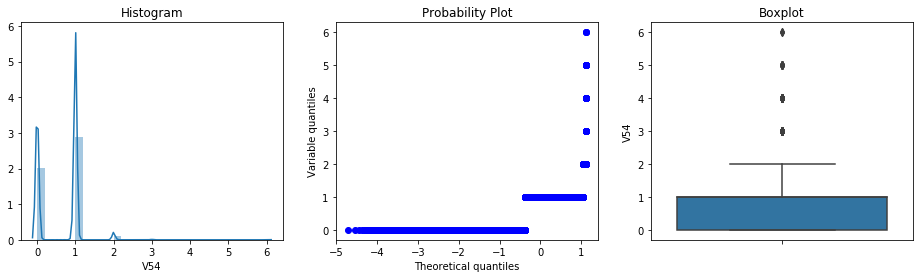

Feature: V55

count    513444.000000
mean          1.067670
std           0.391364
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          17.000000
Name: V55, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


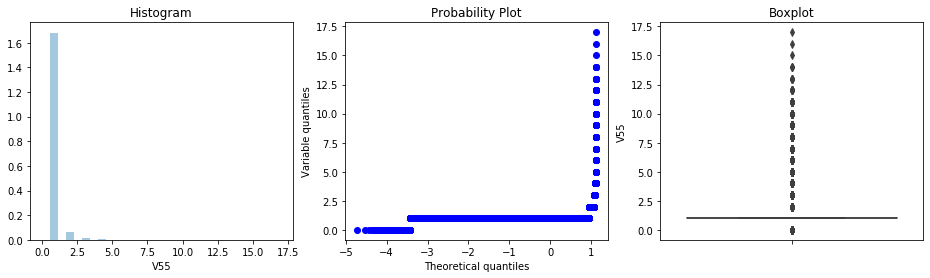

Feature: V56

count    513444.000000
mean          1.120979
std           0.661129
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          51.000000
Name: V56, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


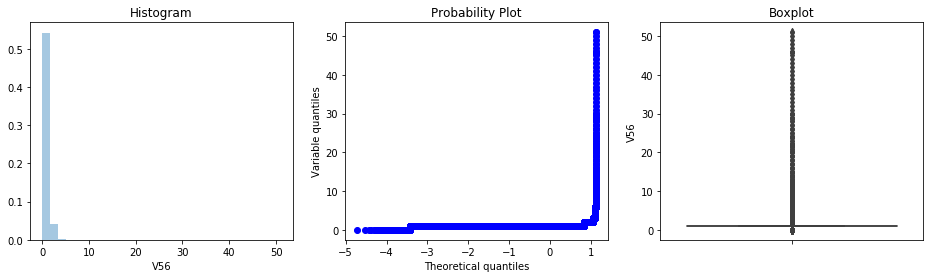

Feature: V57

count    513444.000000
mean          0.128312
std           0.349094
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: V57, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


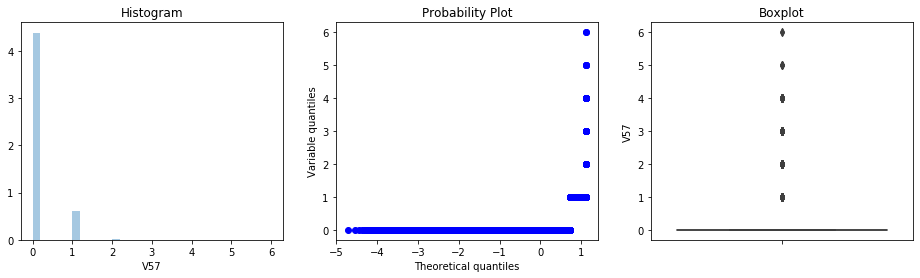

Feature: V58

count    513444.000000
mean          0.132453
std           0.372907
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: V58, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


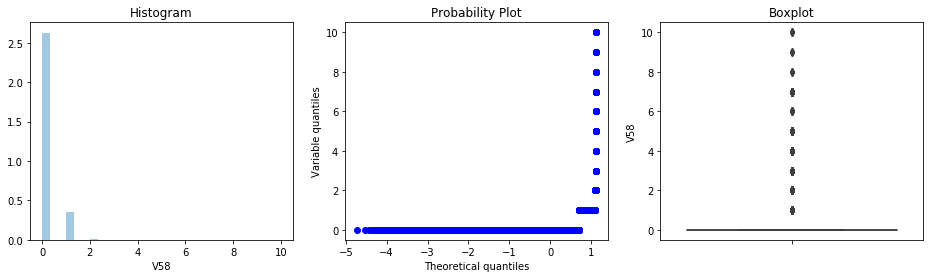

Feature: V59

count    513444.000000
mean          0.134433
std           0.379291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: V59, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


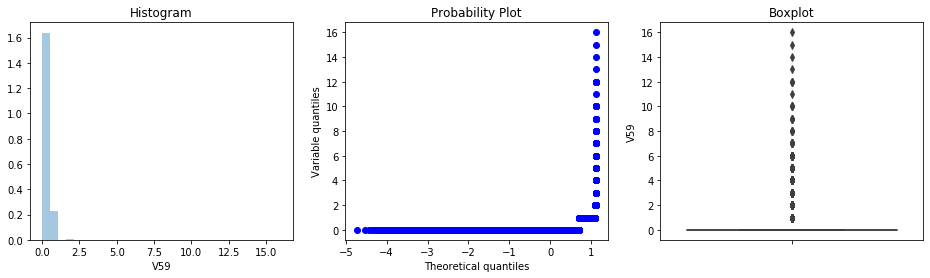

Feature: V60

count    513444.000000
mean          0.142537
std           0.418230
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: V60, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


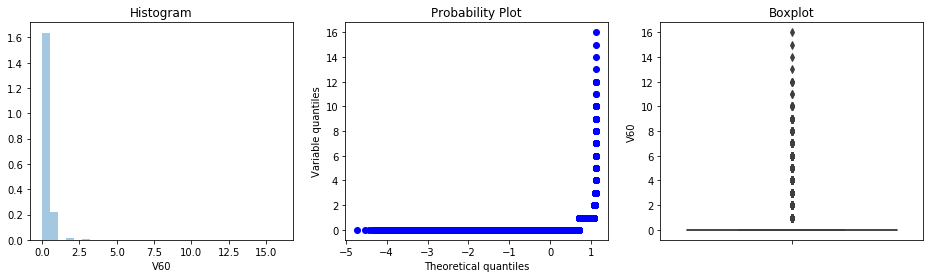

Feature: V61

count    513444.000000
mean          0.829785
std           0.436617
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V61, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


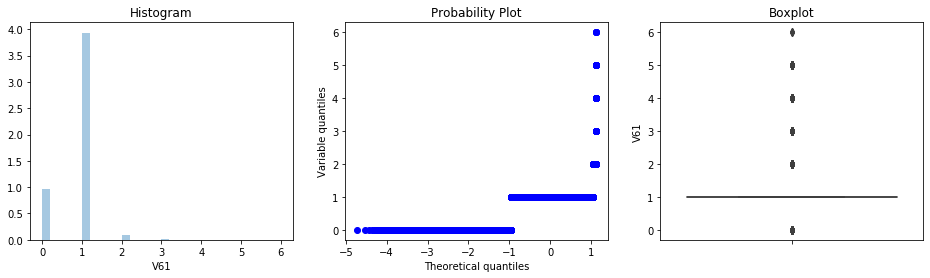

Feature: V62

count    513444.000000
mean          0.867563
std           0.483803
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: V62, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


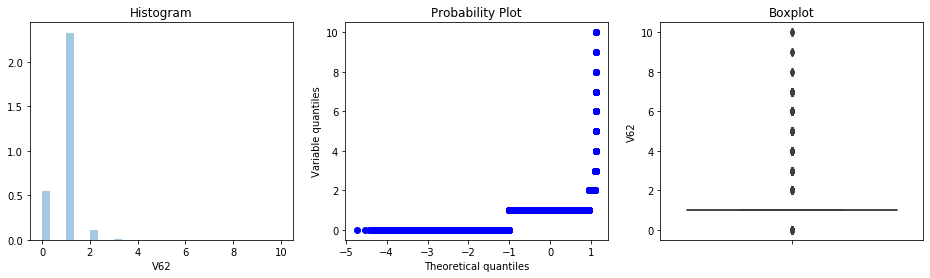

Feature: V63

count    513444.000000
mean          0.130743
std           0.355262
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V63, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


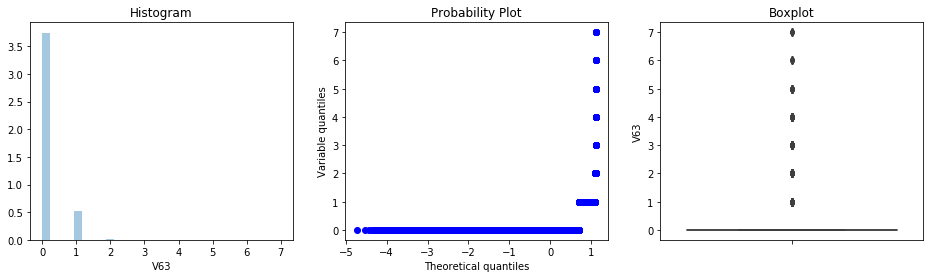

Feature: V64

count    513444.000000
mean          0.141825
std           0.406157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V64, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


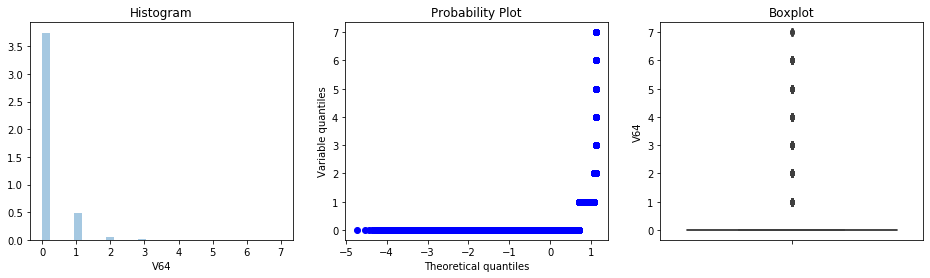

Feature: V65

count    513444.000000
mean          0.999663
std           0.018353
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: V65, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


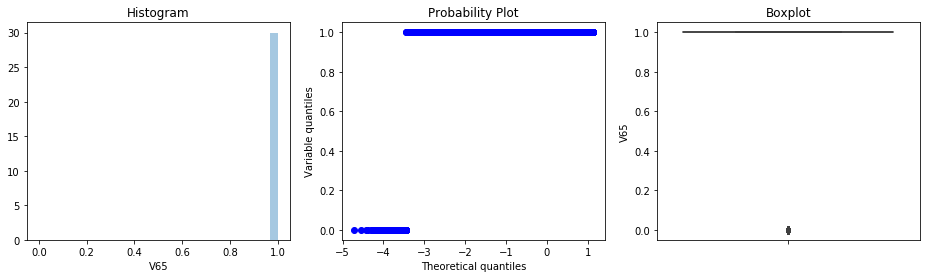

Feature: V66

count    513444.000000
mean          0.981038
std           0.216235
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: V66, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


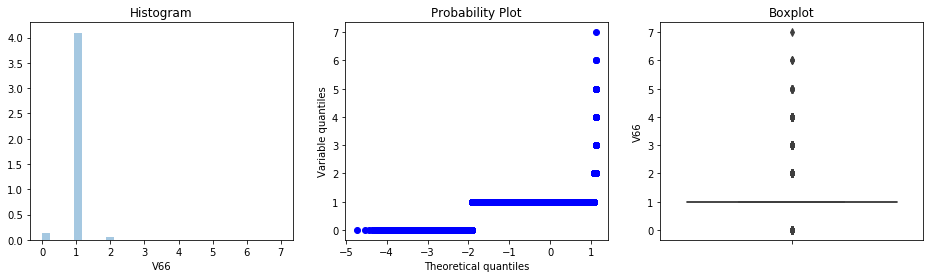

Feature: V67

count    513444.000000
mean          0.998121
std           0.245912
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: V67, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


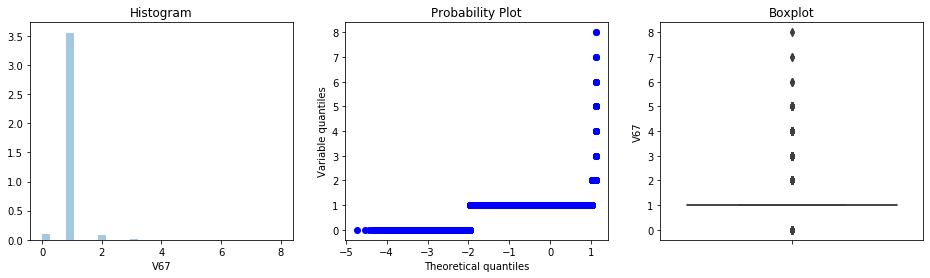

Feature: V68

count    513444.000000
mean          0.000534
std           0.023760
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: V68, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


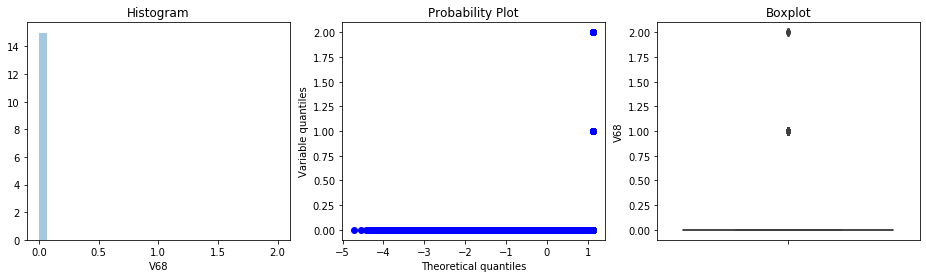

Feature: V69

count    513444.000000
mean          0.390200
std           0.513696
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: V69, dtype: float64
 


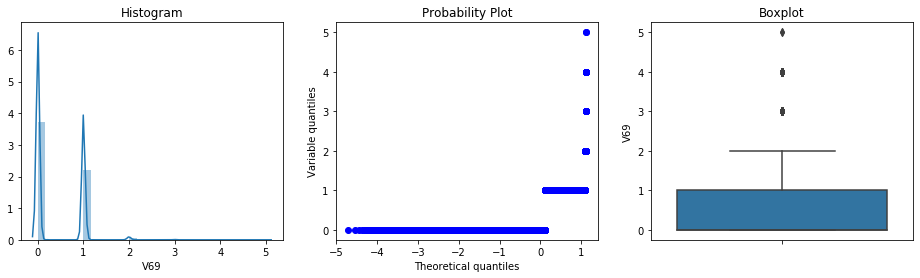

Feature: V70

count    513444.000000
mean          0.407924
std           0.554499
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: V70, dtype: float64
 


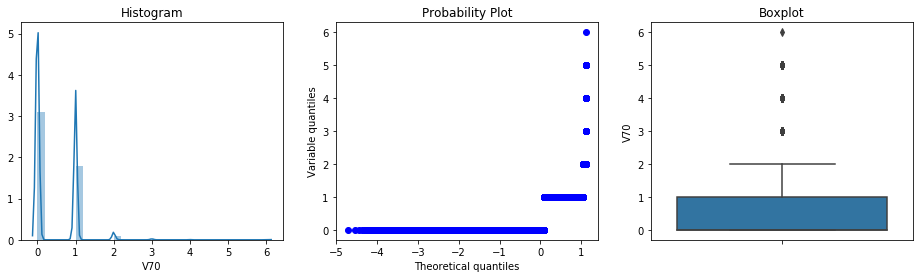

Feature: V71

count    513444.000000
mean          0.140639
std           0.364303
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: V71, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


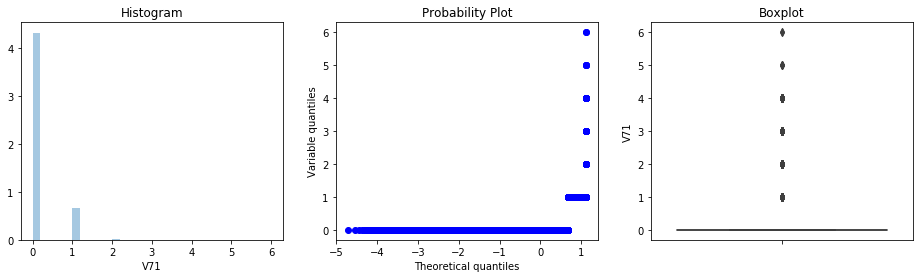

Feature: V72

count    513444.000000
mean          0.145124
std           0.389212
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: V72, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


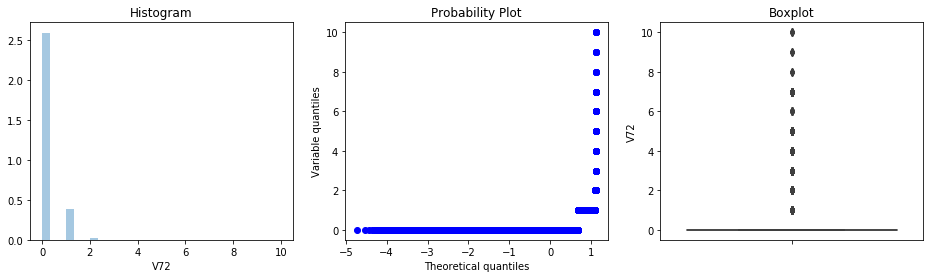

Feature: V73

count    513444.000000
mean          0.139982
std           0.367098
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V73, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


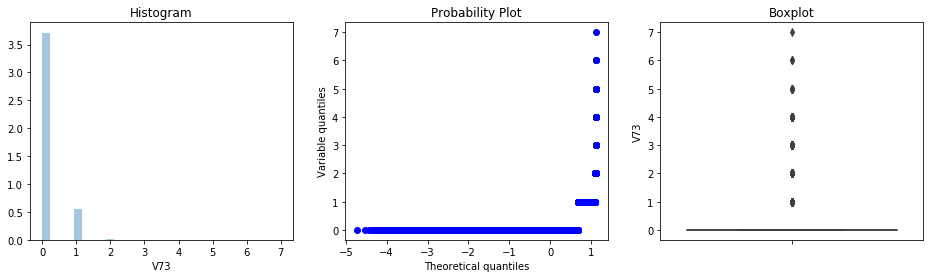

Feature: V74

count    513444.000000
mean          0.152147
std           0.393274
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: V74, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


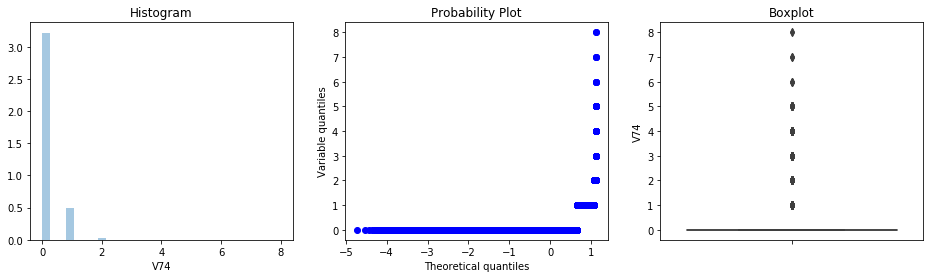

Feature: V75

count    501376.000000
mean          0.544278
std           0.514318
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: V75, dtype: float64
 


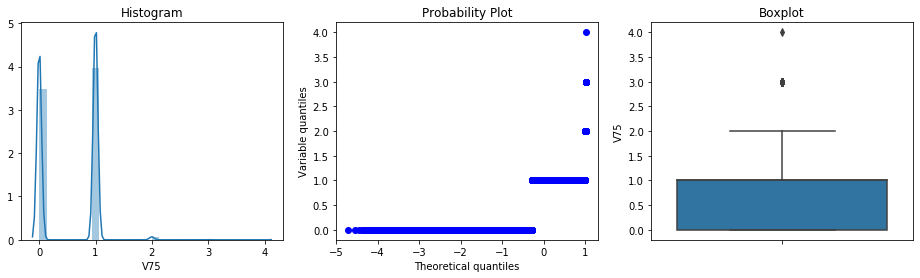

Feature: V76

count    501376.000000
mean          0.587557
std           0.538230
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V76, dtype: float64
 


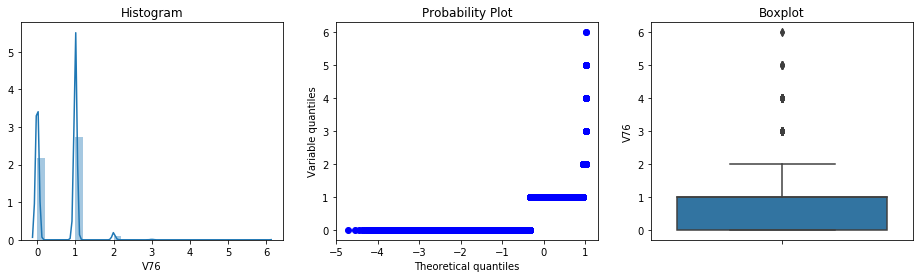

Feature: V77

count    501376.000000
mean          1.086893
std           0.532958
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          30.000000
Name: V77, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


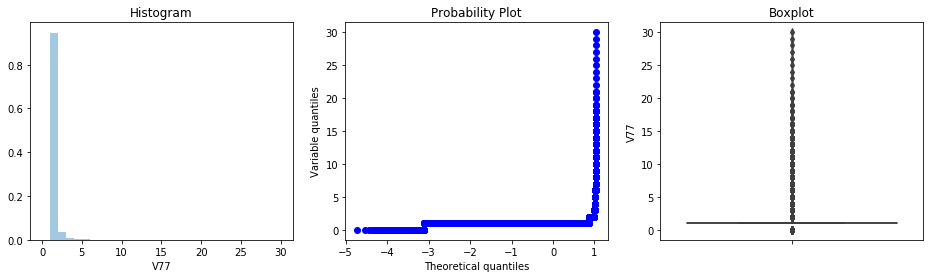

Feature: V78

count    501376.000000
mean          1.144462
std           0.781474
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          31.000000
Name: V78, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


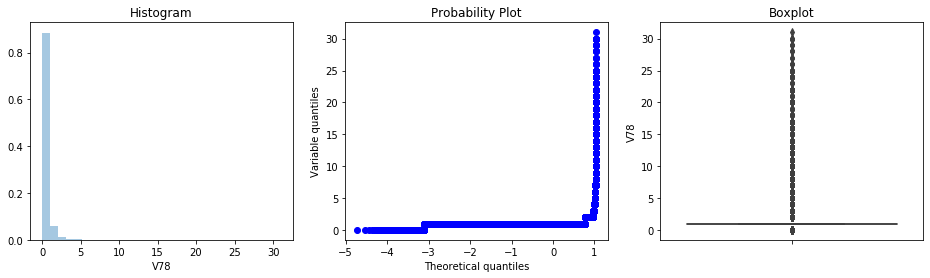

Feature: V79

count    501376.000000
mean          0.136867
std           0.379904
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V79, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


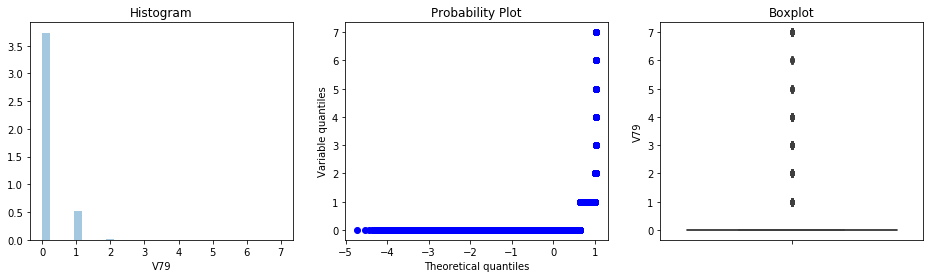

Feature: V80

count    501376.000000
mean          0.143954
std           0.409932
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          19.000000
Name: V80, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


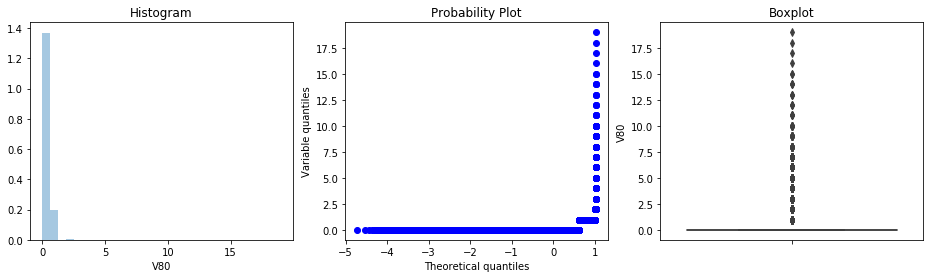

Feature: V81

count    501376.000000
mean          0.152696
std           0.452298
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          19.000000
Name: V81, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


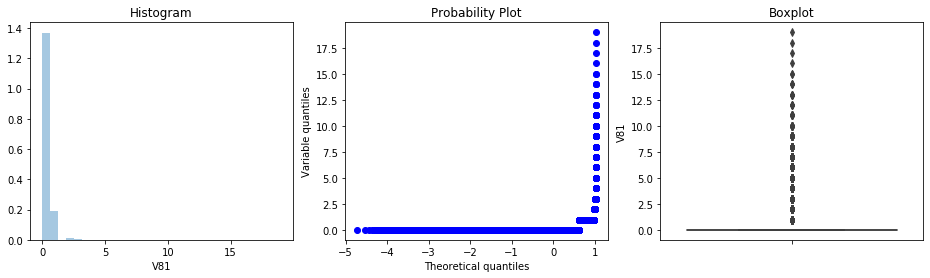

Feature: V82

count    501376.000000
mean          0.844610
std           0.422529
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: V82, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


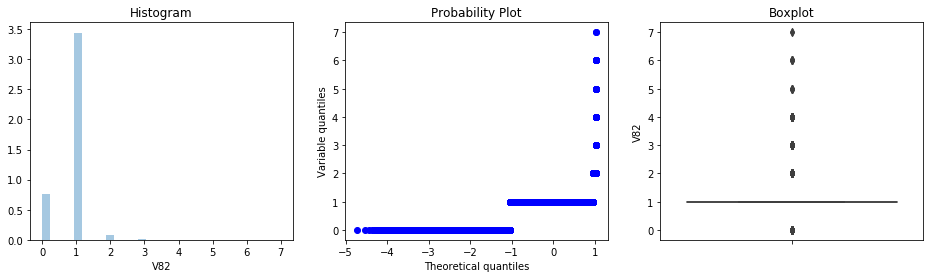

Feature: V83

count    501376.000000
mean          0.881965
std           0.470757
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: V83, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


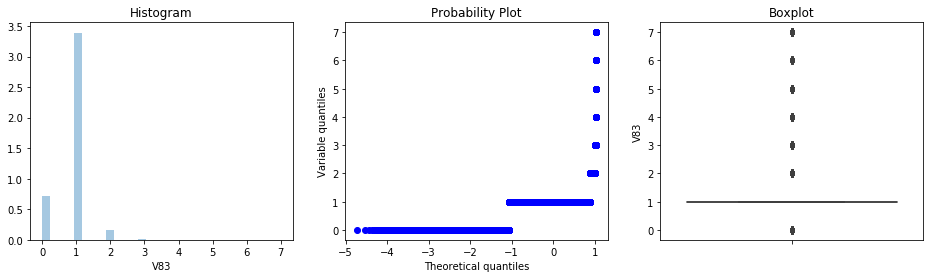

Feature: V84

count    501376.000000
mean          0.137145
std           0.361875
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V84, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


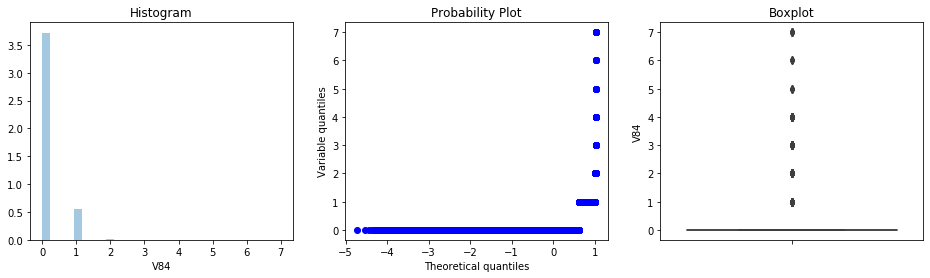

Feature: V85

count    501376.000000
mean          0.149788
std           0.419445
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V85, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


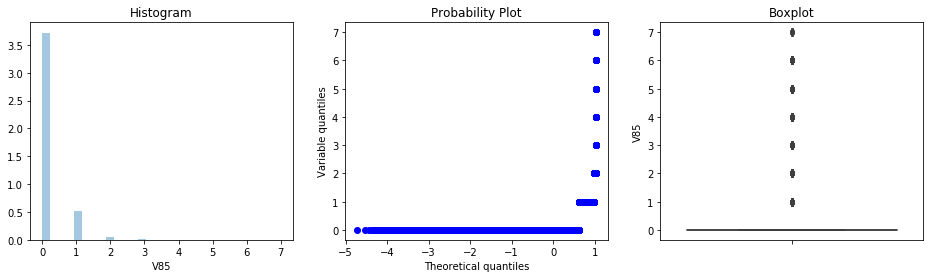

Feature: V86

count    501376.000000
mean          1.064885
std           0.419807
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          30.000000
Name: V86, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


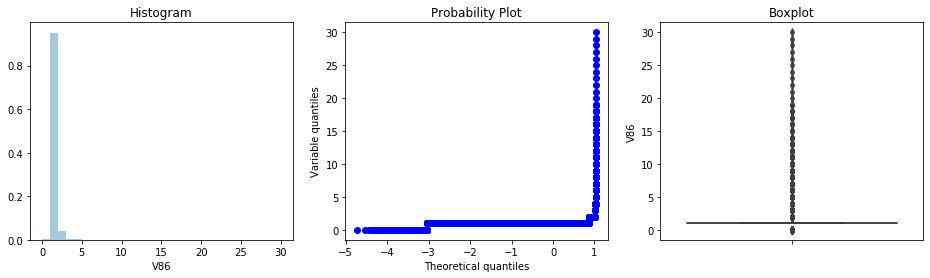

Feature: V87

count    501376.000000
mean          1.099456
std           0.511281
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          30.000000
Name: V87, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


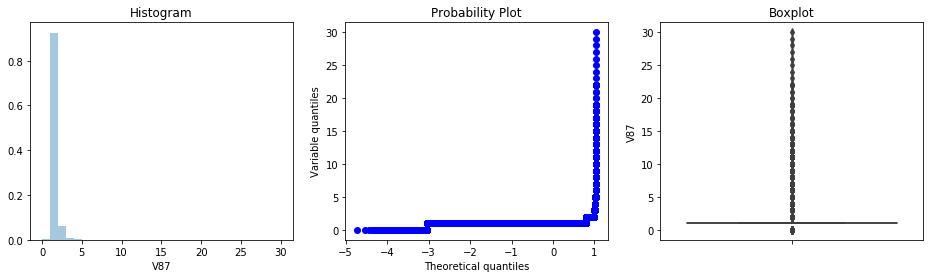

Feature: V88

count    501376.000000
mean          0.999246
std           0.027447
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: V88, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


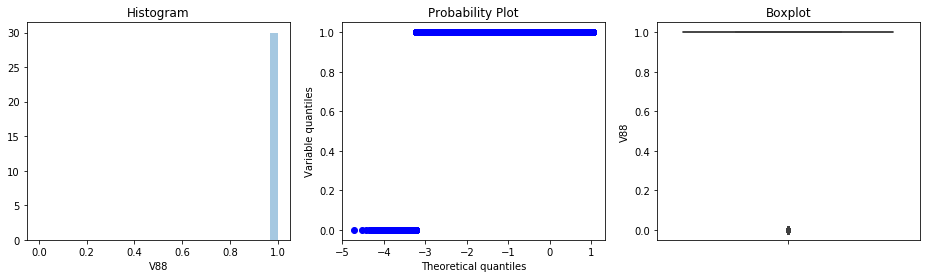

Feature: V89

count    501376.000000
mean          0.000902
std           0.031943
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: V89, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


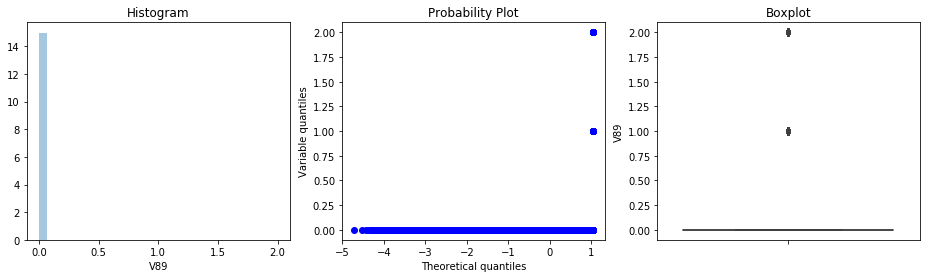

Feature: V90

count    501376.000000
mean          0.401862
std           0.516153
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: V90, dtype: float64
 


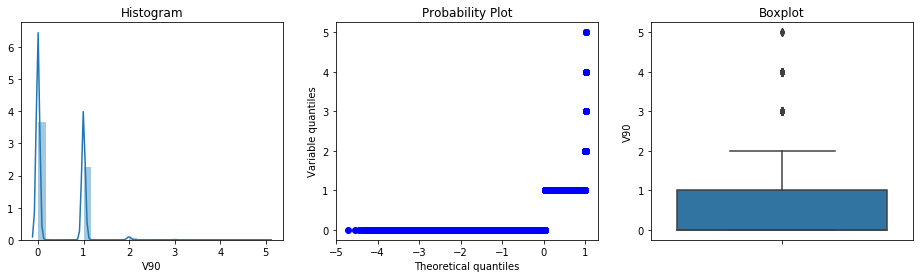

Feature: V91

count    501376.000000
mean          0.420461
std           0.561865
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: V91, dtype: float64
 


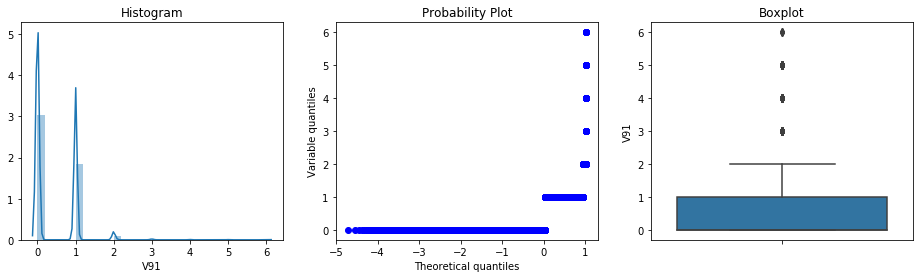

Feature: V92

count    501376.000000
mean          0.150322
std           0.375682
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V92, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


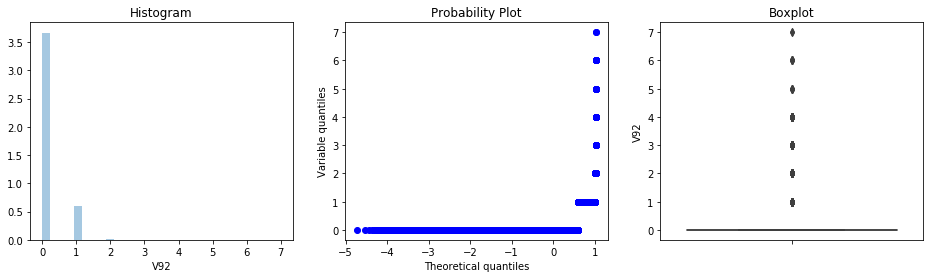

Feature: V93

count    501376.000000
mean          0.154812
std           0.402314
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V93, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


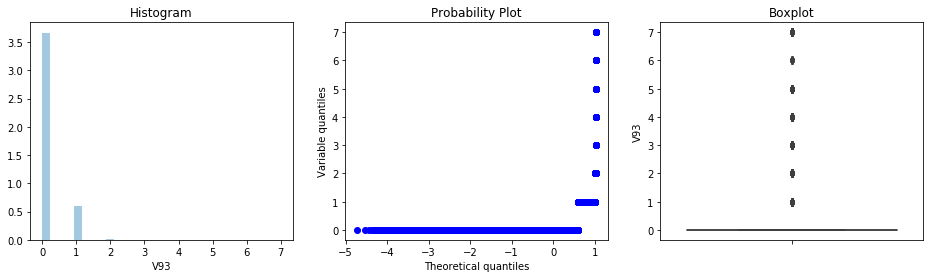

Feature: V94

count    501376.000000
mean          0.137007
std           0.343878
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: V94, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


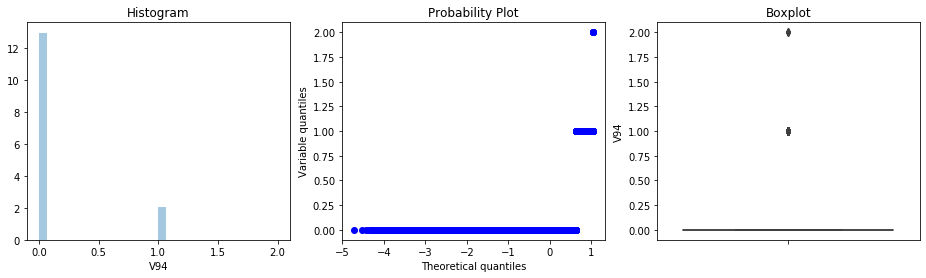

Feature: V95

count    590226.000000
mean          1.038019
std          21.034304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         880.000000
Name: V95, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


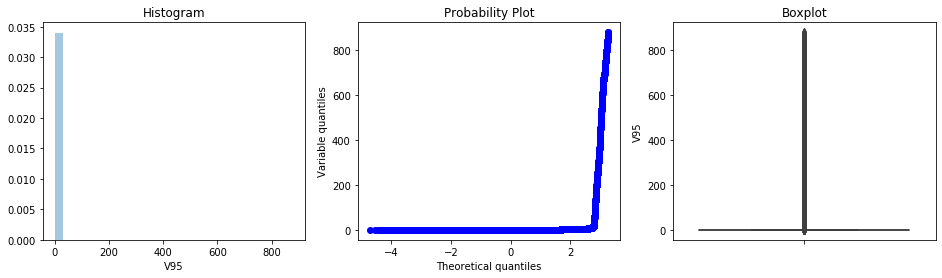

Feature: V96

count    590226.00000
mean          3.00519
std          40.23949
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max        1410.00000
Name: V96, dtype: float64
 


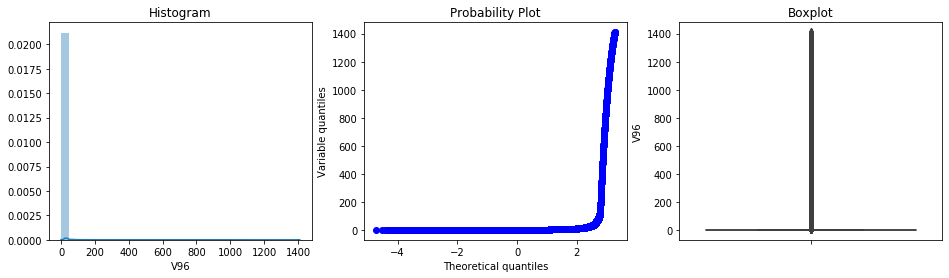

Feature: V97

count    590226.000000
mean          1.718933
std          27.700449
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         976.000000
Name: V97, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


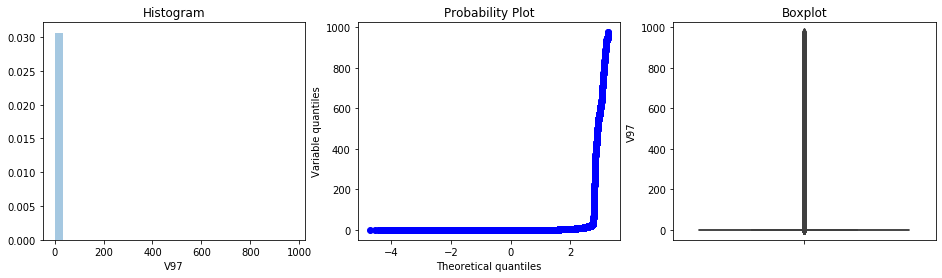

Feature: V98

count    590226.000000
mean          0.061985
std           0.284995
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: V98, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


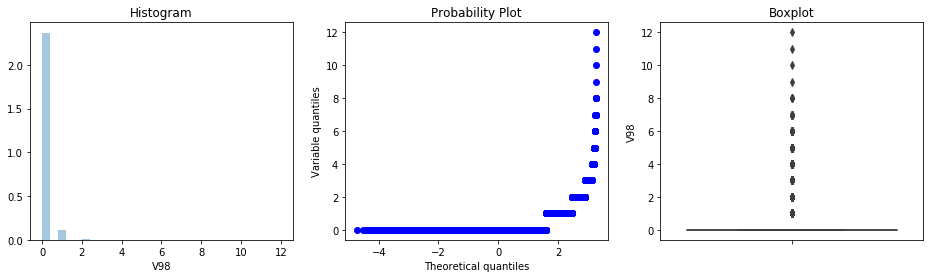

Feature: V99

count    590226.000000
mean          0.894986
std           2.722552
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          88.000000
Name: V99, dtype: float64
 


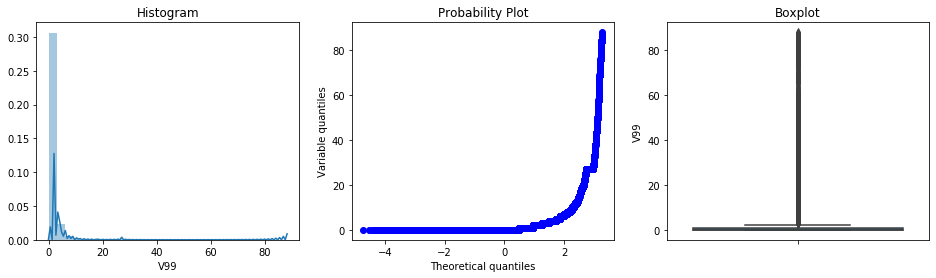

Feature: V100

count    590226.000000
mean          0.273504
std           0.947176
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          28.000000
Name: V100, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


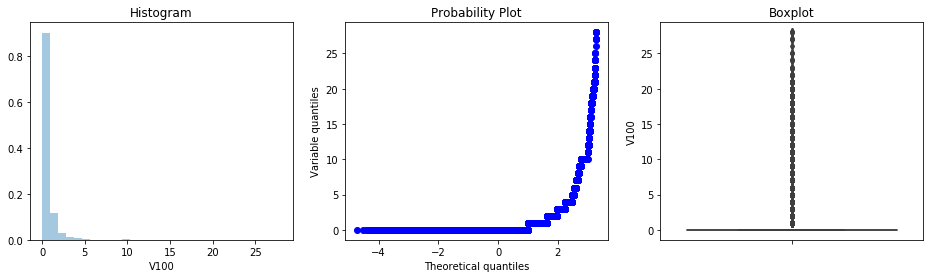

Feature: V101

count    590226.000000
mean          0.889249
std          20.582571
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         869.000000
Name: V101, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


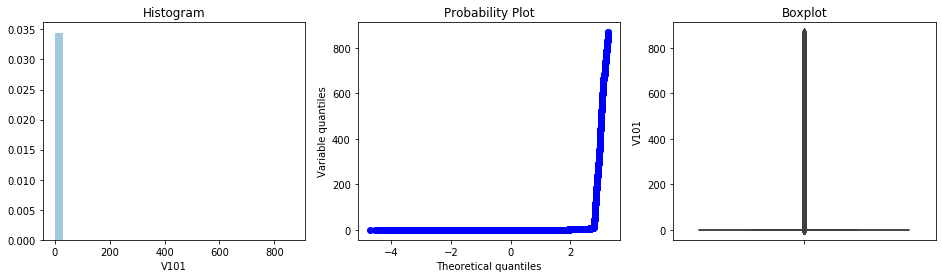

Feature: V102

count    590226.000000
mean          1.827229
std          35.928456
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1285.000000
Name: V102, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


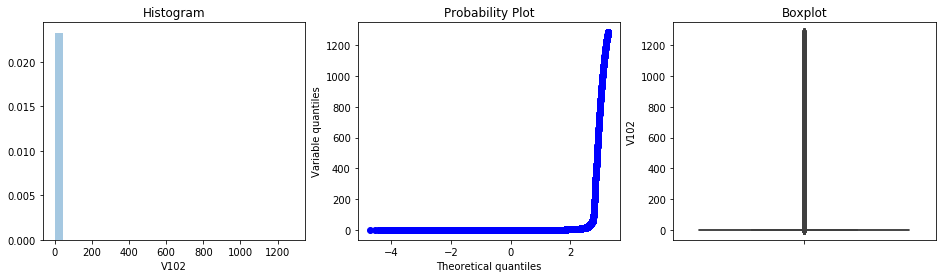

Feature: V103

count    590226.000000
mean          1.279288
std          25.685642
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         928.000000
Name: V103, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


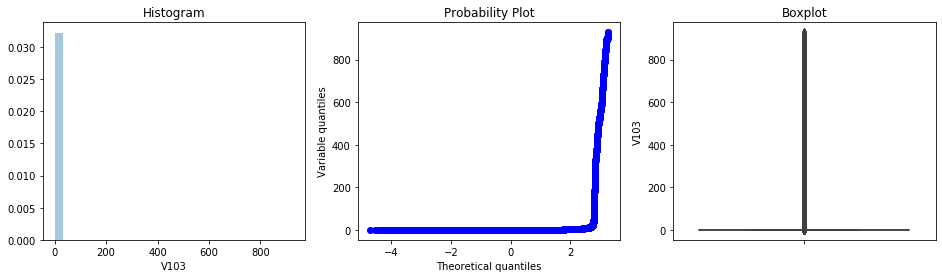

Feature: V104

count    590226.000000
mean          0.085433
std           0.648718
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: V104, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


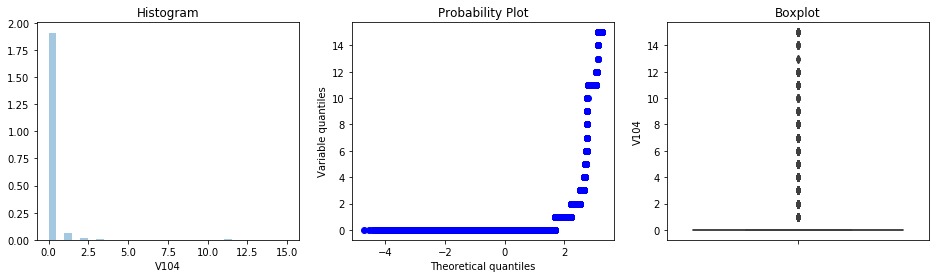

Feature: V105

count    590226.000000
mean          0.281145
std           3.373948
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          99.000000
Name: V105, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


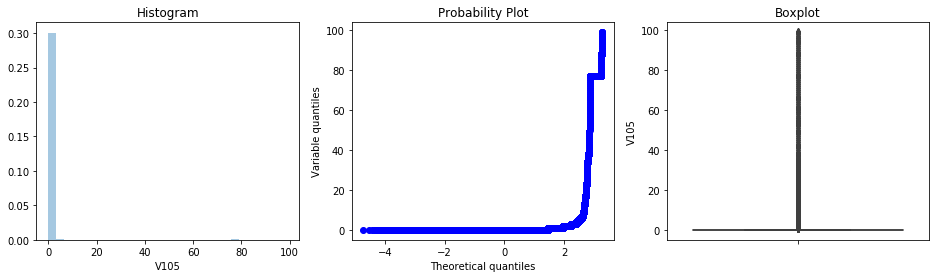

Feature: V106

count    590226.000000
mean          0.164584
std           1.825665
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          55.000000
Name: V106, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


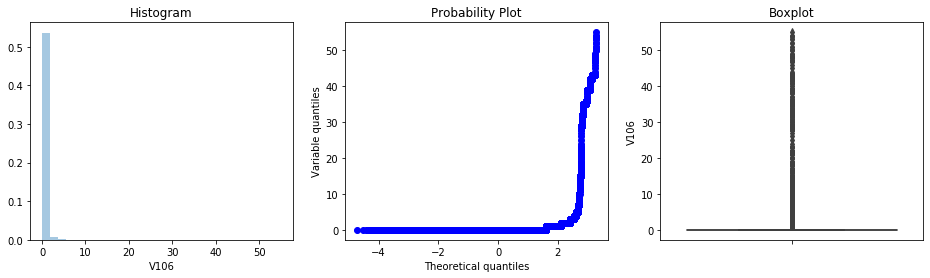

Feature: V107

count    590226.000000
mean          0.999580
std           0.020494
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: V107, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


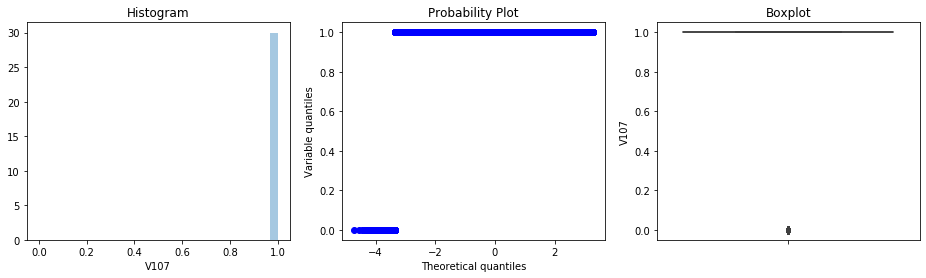

Feature: V108

count    590226.000000
mean          1.004613
std           0.081146
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: V108, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


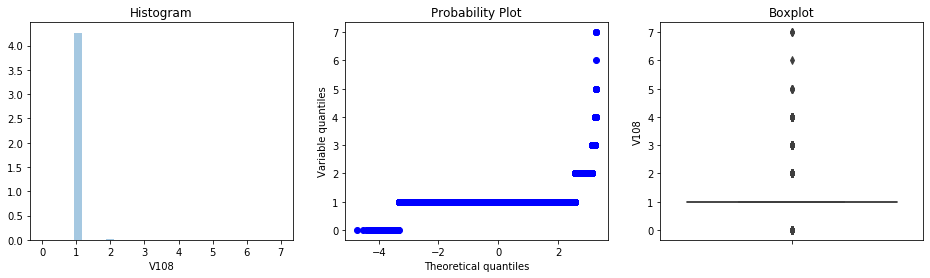

Feature: V109

count    590226.000000
mean          1.014816
std           0.127769
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: V109, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


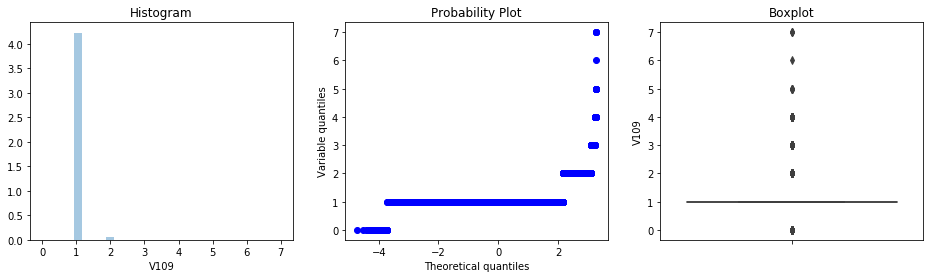

Feature: V110

count    590226.000000
mean          1.007739
std           0.097290
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: V110, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


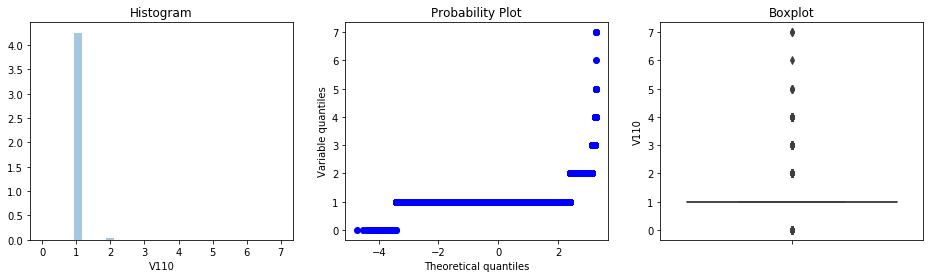

Feature: V111

count    590226.000000
mean          1.002563
std           0.070830
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: V111, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


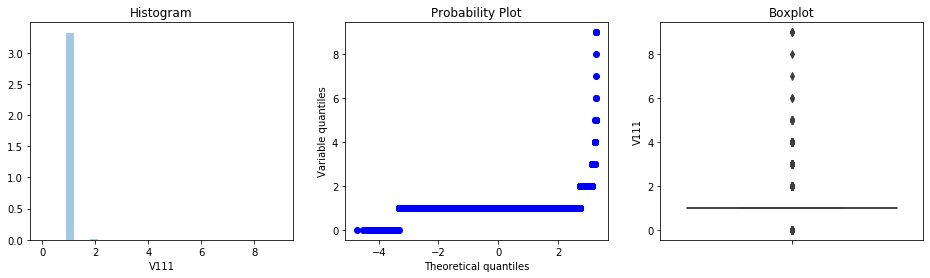

Feature: V112

count    590226.000000
mean          1.005356
std           0.084617
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: V112, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


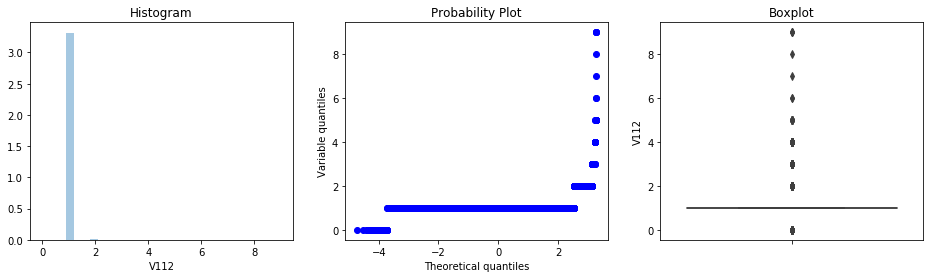

Feature: V113

count    590226.000000
mean          1.003383
std           0.074754
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: V113, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


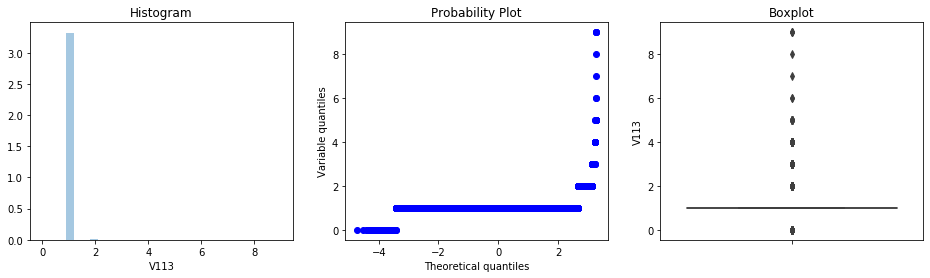

Feature: V114

count    590226.000000
mean          1.009298
std           0.110179
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V114, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


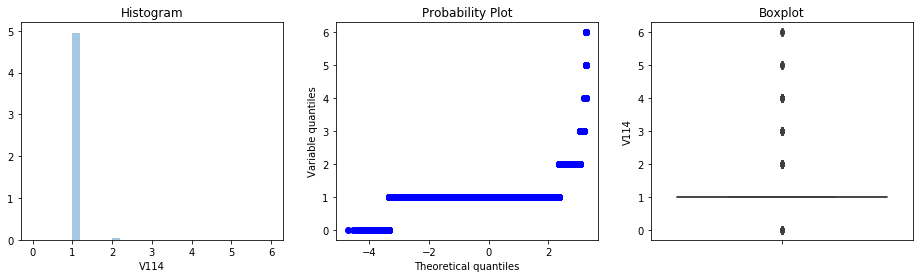

Feature: V115

count    590226.000000
mean          1.032450
std           0.190385
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V115, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


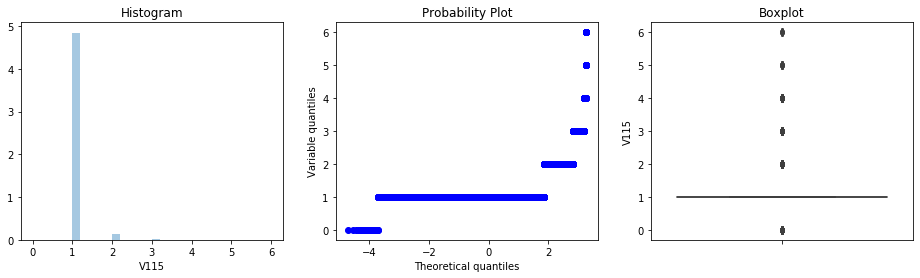

Feature: V116

count    590226.000000
mean          1.015738
std           0.136770
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V116, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


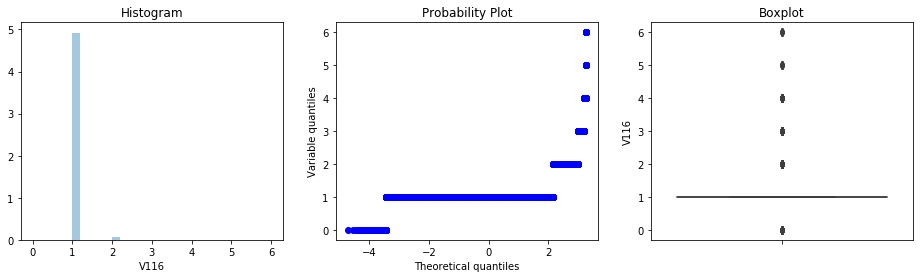

Feature: V117

count    590226.000000
mean          1.000391
std           0.035238
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V117, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


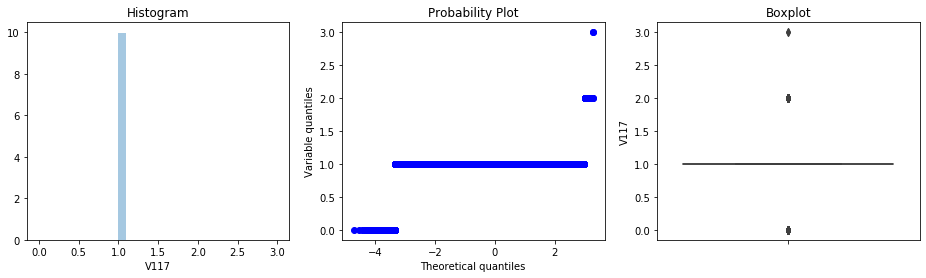

Feature: V118

count    590226.000000
mean          1.001474
std           0.041011
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V118, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


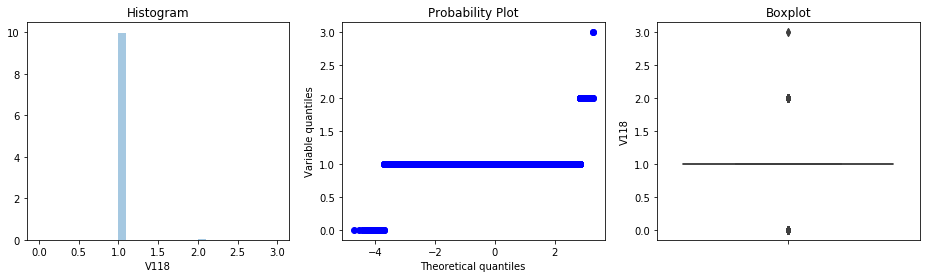

Feature: V119

count    590226.000000
mean          1.000729
std           0.036392
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V119, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


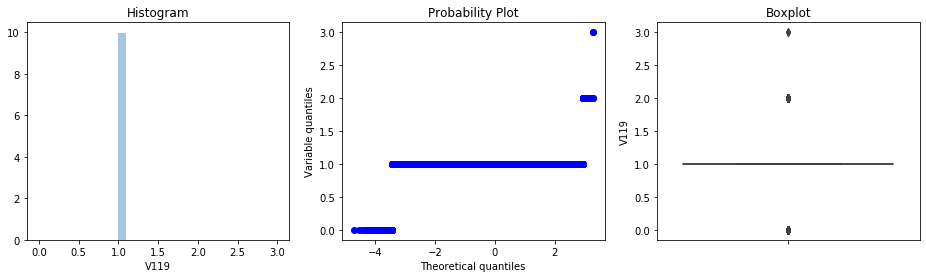

Feature: V120

count    590226.000000
mean          1.000874
std           0.041684
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V120, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


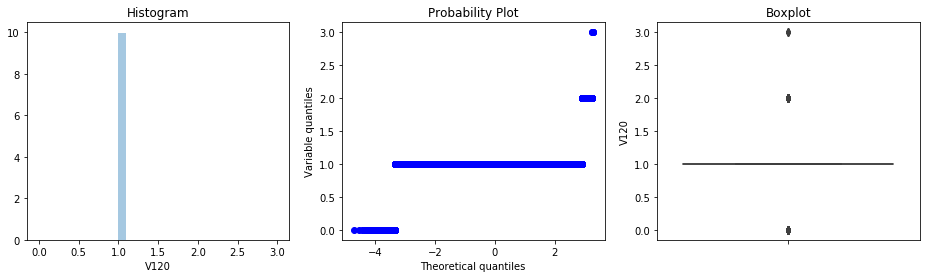

Feature: V121

count    590226.000000
mean          1.004276
std           0.067097
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V121, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


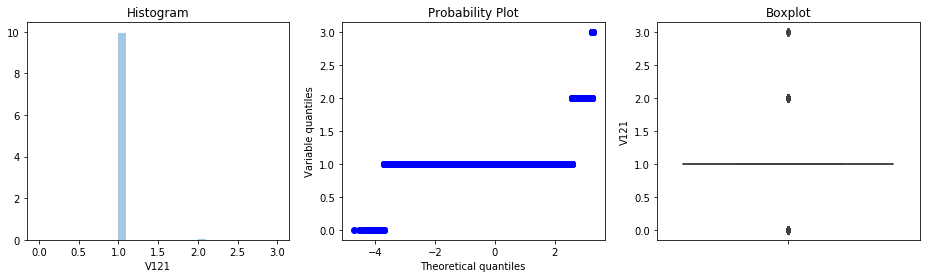

Feature: V122

count    590226.000000
mean          1.001759
std           0.048636
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V122, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


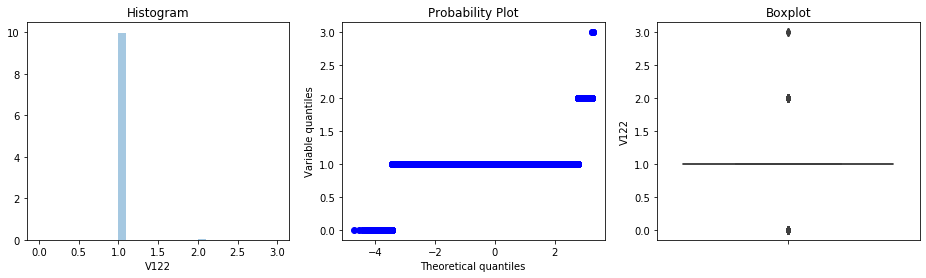

Feature: V123

count    590226.000000
mean          1.031120
std           0.228134
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          13.000000
Name: V123, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


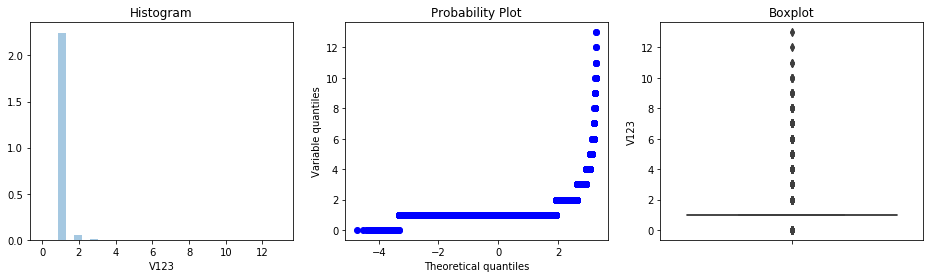

Feature: V124

count    590226.000000
mean          1.092975
std           0.374103
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          13.000000
Name: V124, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


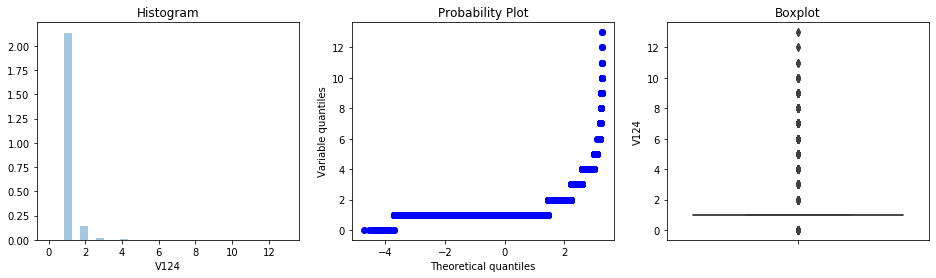

Feature: V125

count    590226.000000
mean          1.050415
std           0.280037
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          13.000000
Name: V125, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


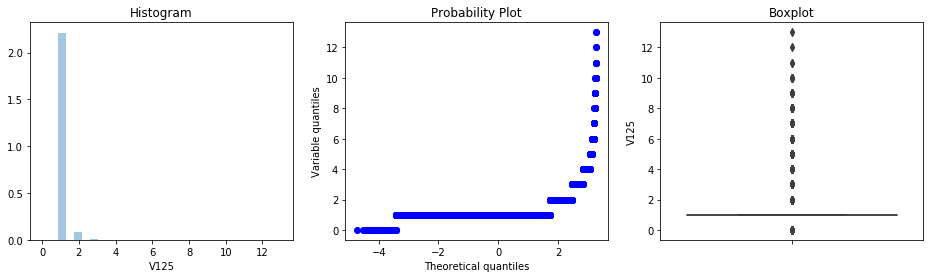

Feature: V126

count    590226.000000
mean        129.979417
std        2346.951681
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      160000.000000
Name: V126, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


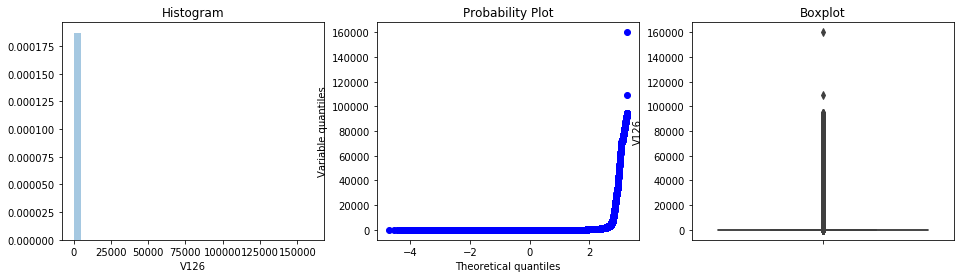

Feature: V127

count    590226.000000
mean        336.611559
std        4238.666949
min           0.000000
25%           0.000000
50%           0.000000
75%         107.949997
max      160000.000000
Name: V127, dtype: float64
 


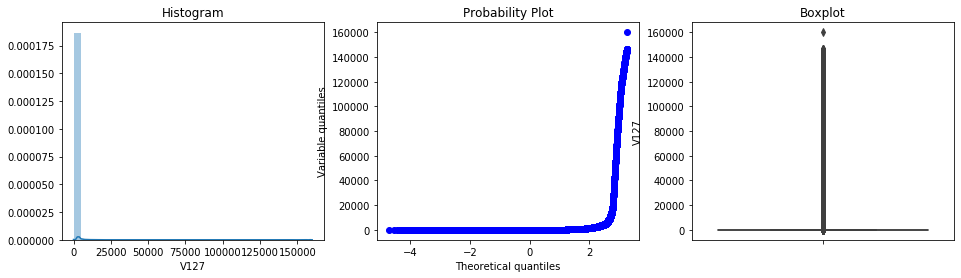

Feature: V128

count    590226.000000
mean        204.094038
std        3010.258774
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      160000.000000
Name: V128, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


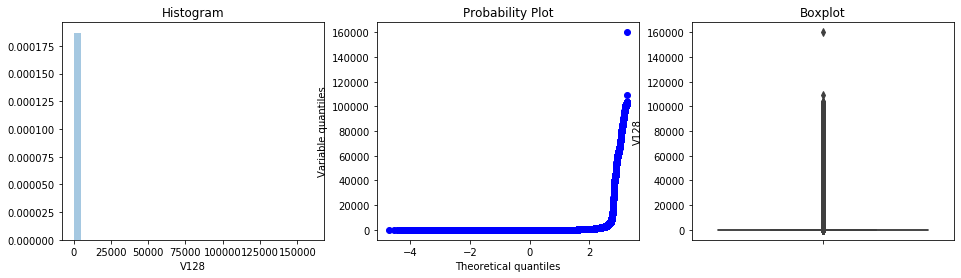

Feature: V129

count    590226.000000
mean          8.768944
std         113.832828
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V129, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


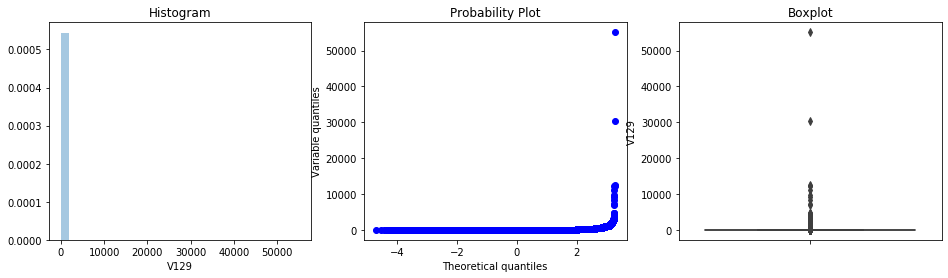

Feature: V130

count    590226.000000
mean         92.165849
std         315.960485
min           0.000000
25%           0.000000
50%           0.000000
75%          59.000000
max       55125.000000
Name: V130, dtype: float64
 


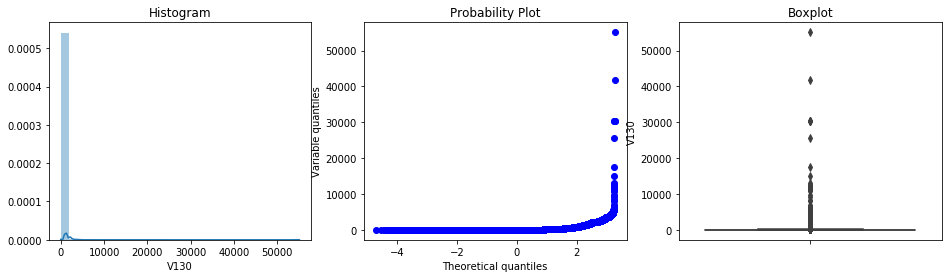

Feature: V131

count    590226.000000
mean         31.133302
std         161.161258
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V131, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


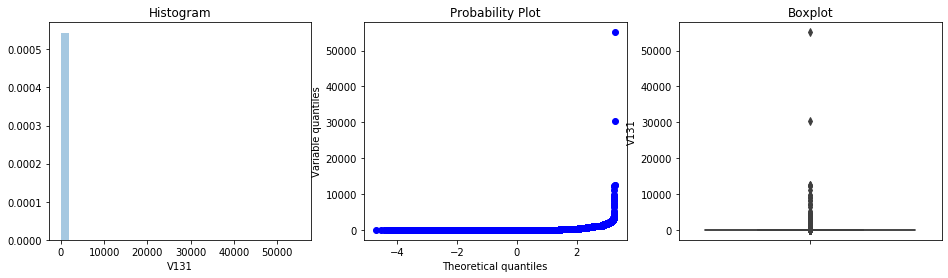

Feature: V132

count    590226.000000
mean        103.513188
std        2266.106140
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       93736.000000
Name: V132, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


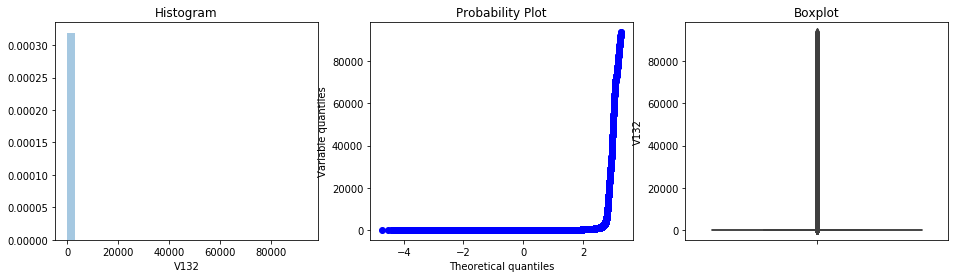

Feature: V133

count    590226.000000
mean        204.889160
std        3796.316755
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      133915.000000
Name: V133, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


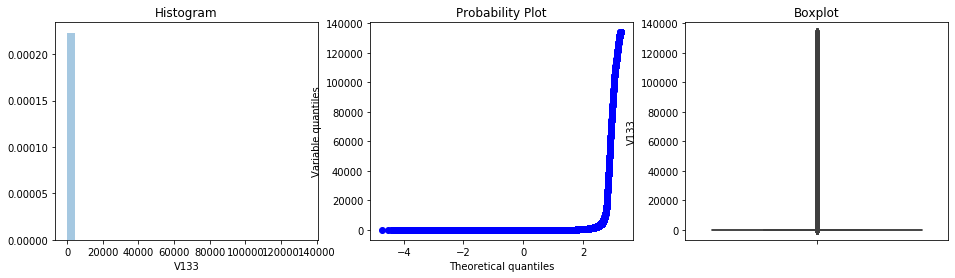

Feature: V134

count    590226.000000
mean        145.972328
std        2772.986817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       98476.000000
Name: V134, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


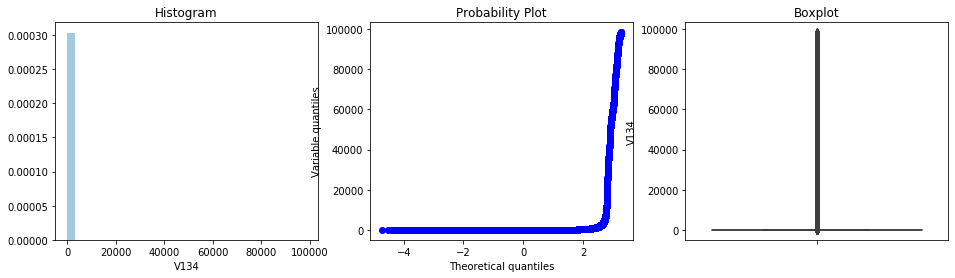

Feature: V135

count    590226.000000
mean         17.250132
std         293.847563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       90750.000000
Name: V135, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


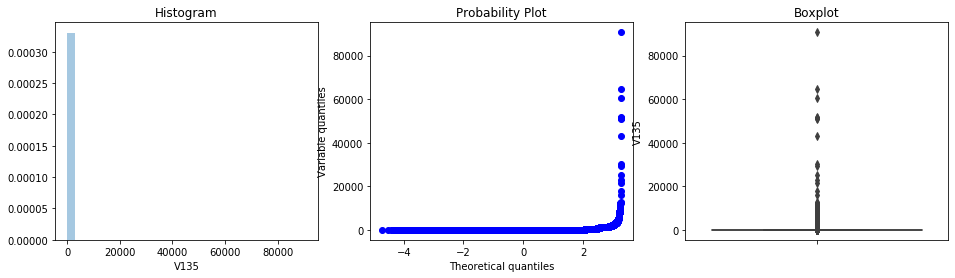

Feature: V136

count    590226.000000
mean         38.821196
std         451.808411
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       90750.000000
Name: V136, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


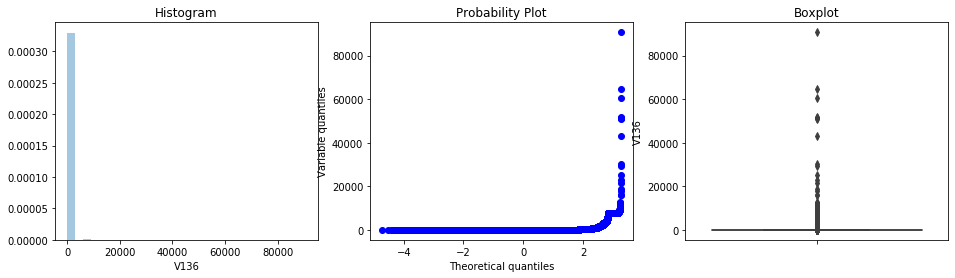

Feature: V137

count    590226.000000
mean         26.365090
std         348.332714
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       90750.000000
Name: V137, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


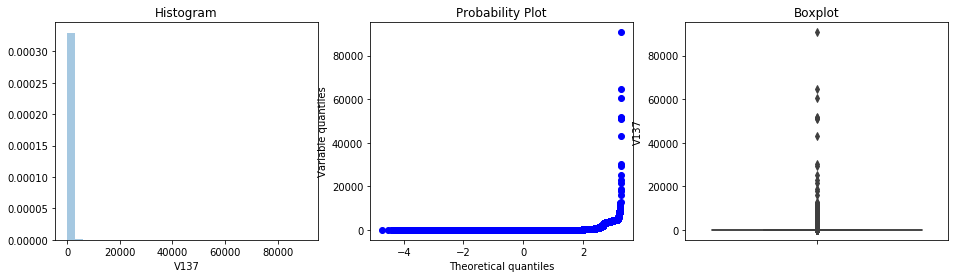

Feature: V138

count    81945.000000
mean         0.036439
std          0.428490
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.000000
Name: V138, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


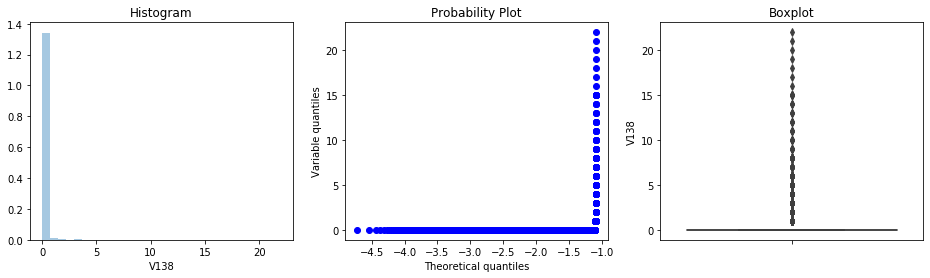

Feature: V139

count    81945.000000
mean         1.073915
std          1.333924
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         33.000000
Name: V139, dtype: float64
 


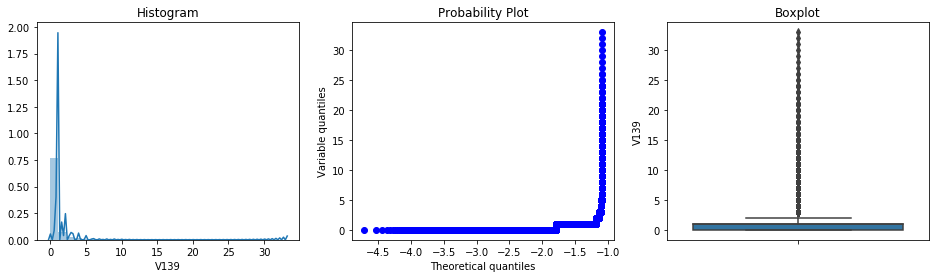

Feature: V140

count    81945.000000
mean         1.125267
std          1.467850
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         33.000000
Name: V140, dtype: float64
 


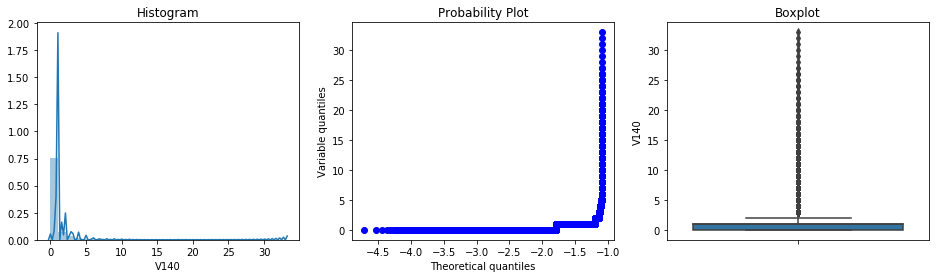

Feature: V141

count    81945.000000
mean         0.037696
std          0.215133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: V141, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


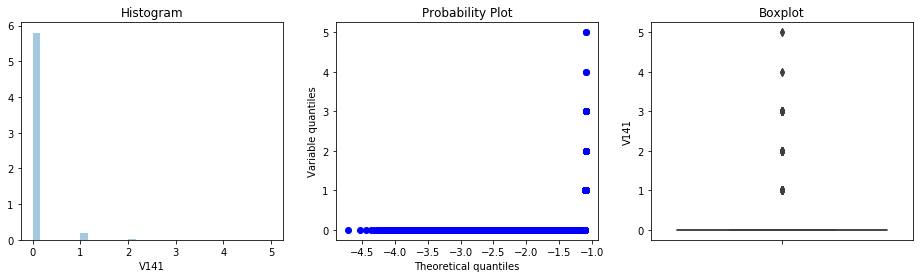

Feature: V142

count    81945.000000
mean         0.048581
std          0.313888
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: V142, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


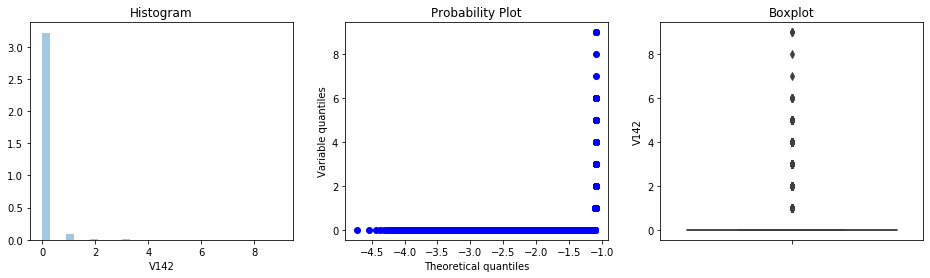

Feature: V143

count    81951.000000
mean         8.397006
std         55.267545
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        869.000000
Name: V143, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


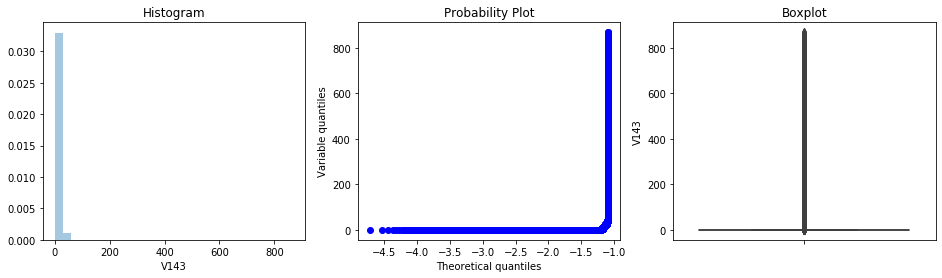

Feature: V144

count    81951.000000
mean         3.708484
std         10.485633
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         62.000000
Name: V144, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


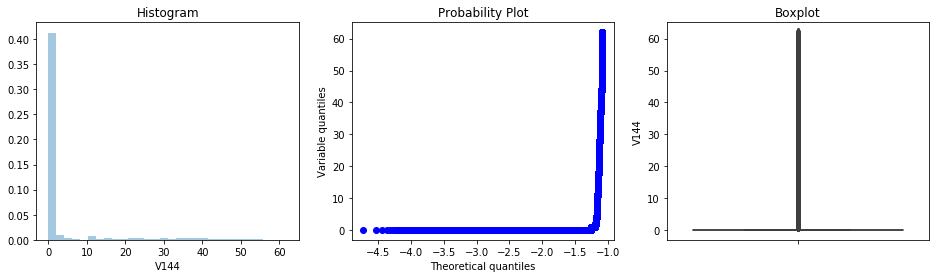

Feature: V145

count    81951.000000
mean        22.112946
std         64.371860
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        297.000000
Name: V145, dtype: float64
 


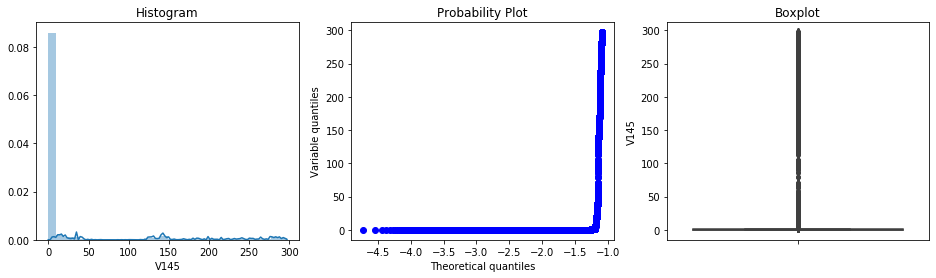

Feature: V146

count    81945.000000
mean         0.156276
std          0.682328
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: V146, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


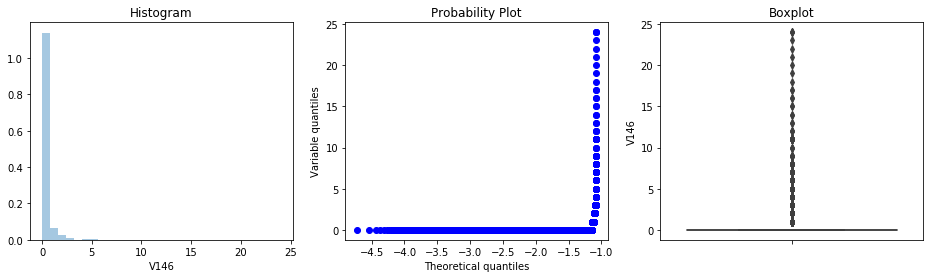

Feature: V147

count    81945.000000
mean         0.168601
std          0.750497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: V147, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


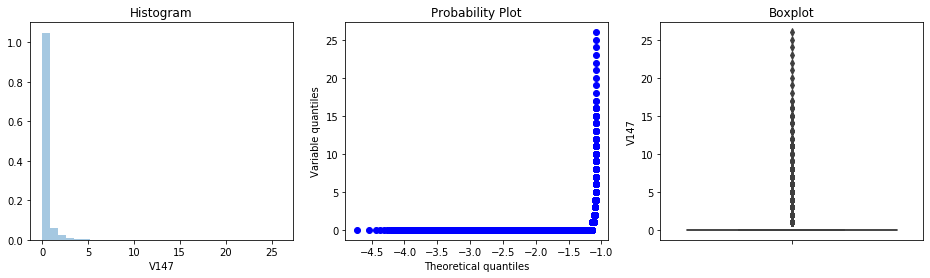

Feature: V148

count    81945.000000
mean         0.765001
std          0.581425
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: V148, dtype: float64
 


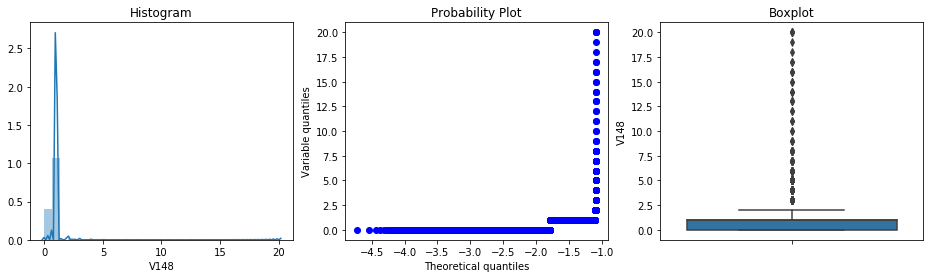

Feature: V149

count    81945.000000
mean         0.775313
std          0.628191
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: V149, dtype: float64
 


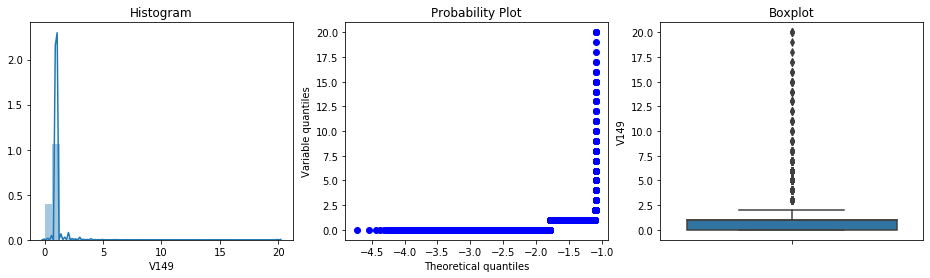

Feature: V150

count    81951.000000
mean       277.598028
std        829.576922
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       3389.000000
Name: V150, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


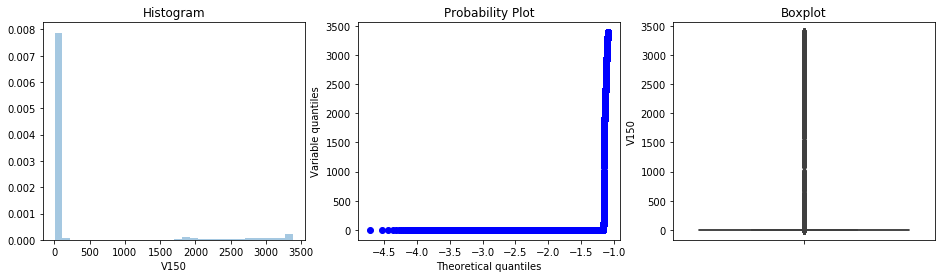

Feature: V151

count    81951.000000
mean         6.460190
std         15.232324
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         57.000000
Name: V151, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


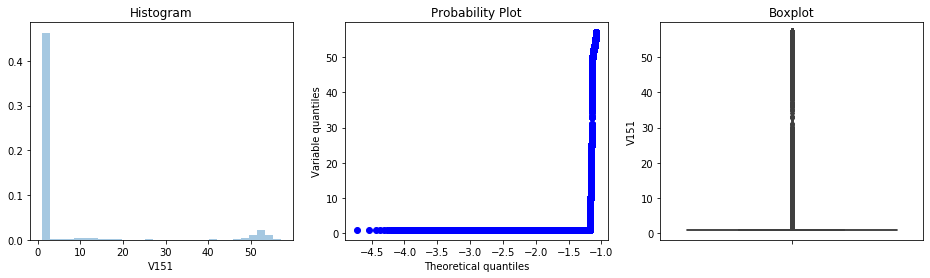

Feature: V152

count    81951.000000
mean         9.432710
std         21.554486
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         69.000000
Name: V152, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


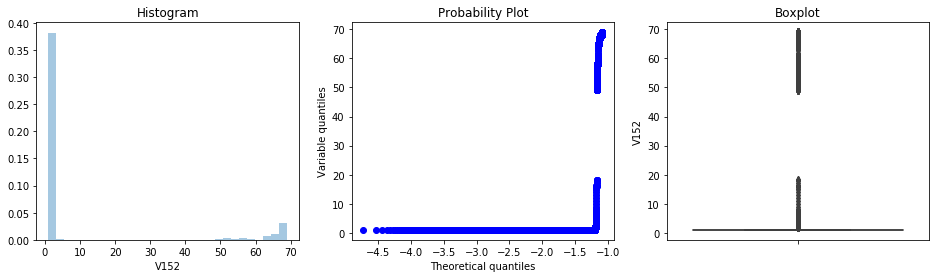

Feature: V153

count    81945.000000
mean         0.753200
std          0.532649
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         18.000000
Name: V153, dtype: float64
 


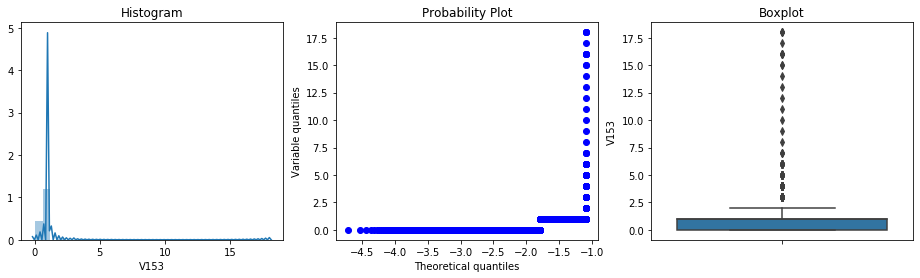

Feature: V154

count    81945.000000
mean         0.757423
std          0.546907
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         18.000000
Name: V154, dtype: float64
 


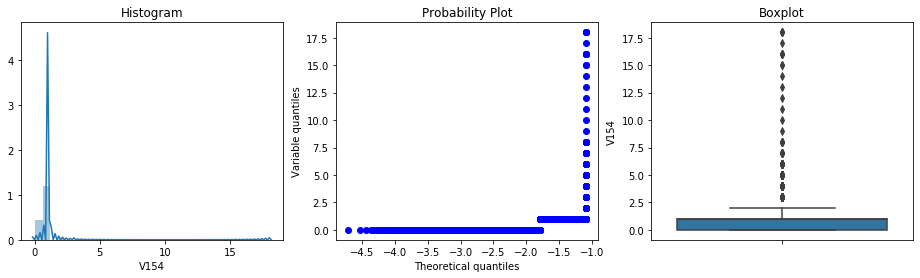

Feature: V155

count    81945.000000
mean         0.767381
std          0.602678
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         24.000000
Name: V155, dtype: float64
 


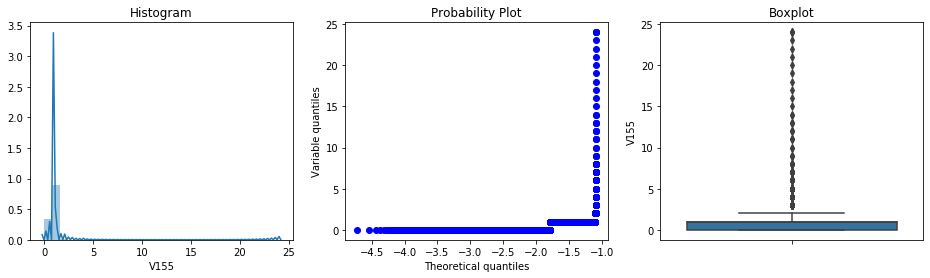

Feature: V156

count    81945.000000
mean         0.777485
std          0.647209
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         24.000000
Name: V156, dtype: float64
 


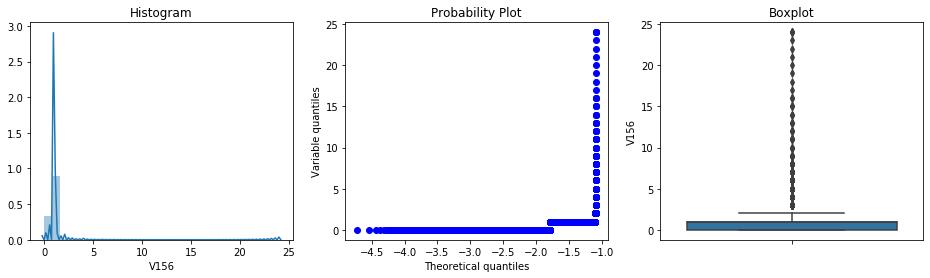

Feature: V157

count    81945.000000
mean         0.817573
std          0.682016
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         24.000000
Name: V157, dtype: float64
 


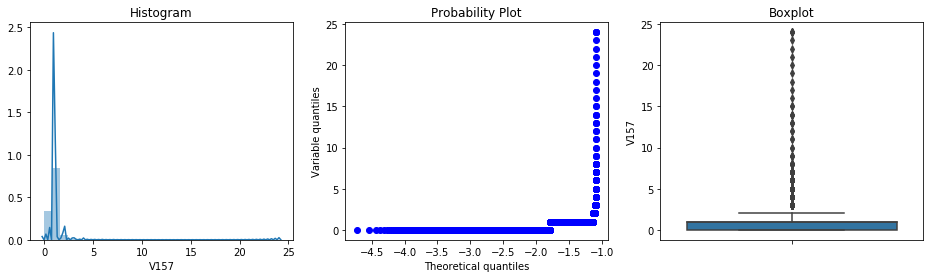

Feature: V158

count    81945.000000
mean         0.833461
std          0.734336
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         24.000000
Name: V158, dtype: float64
 


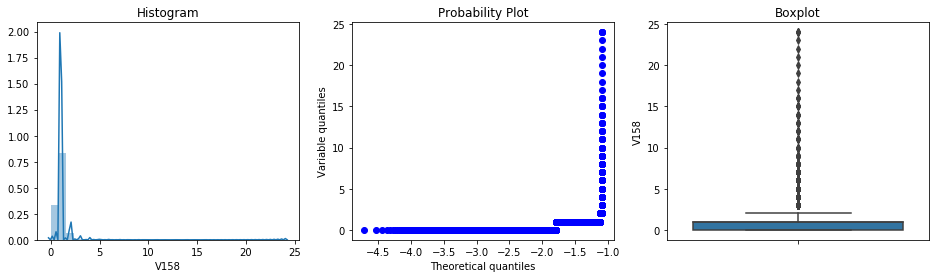

Feature: V159

count    81951.000000
mean      2719.299775
std       8355.445049
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      55125.000000
Name: V159, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


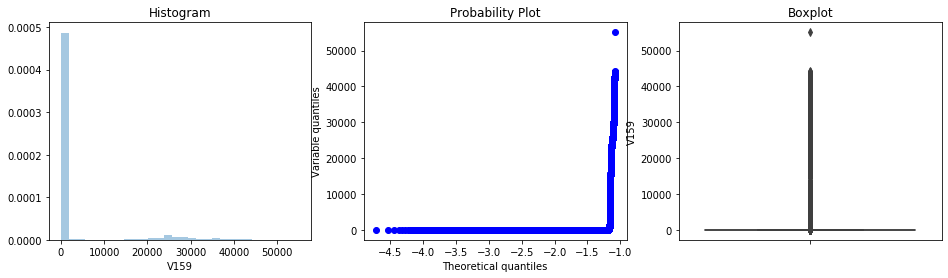

Feature: V160

count     81951.000000
mean      47453.181173
std      142076.069162
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      641511.437500
Name: V160, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


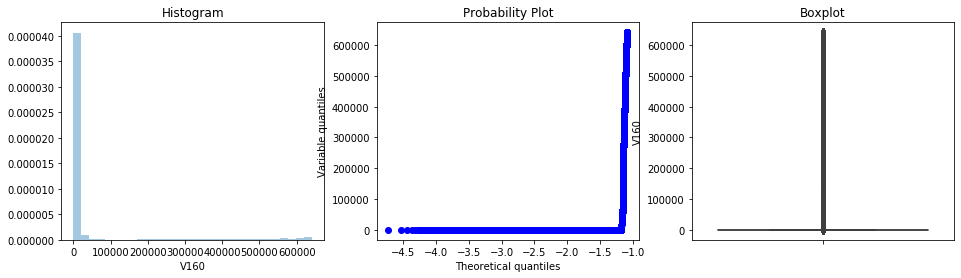

Feature: V161

count    81945.000000
mean         4.843938
std         58.929757
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3300.000000
Name: V161, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


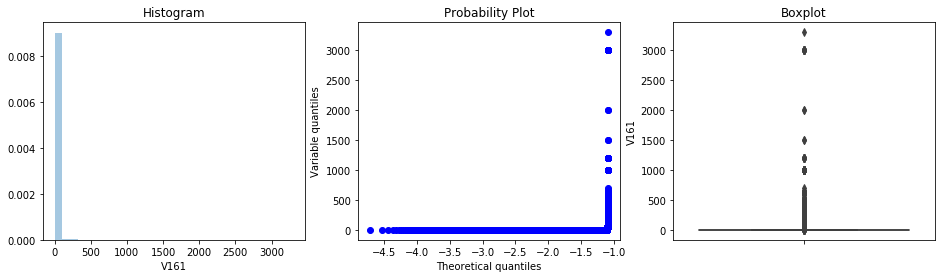

Feature: V162

count    81945.000000
mean         6.594661
std         69.195180
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3300.000000
Name: V162, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


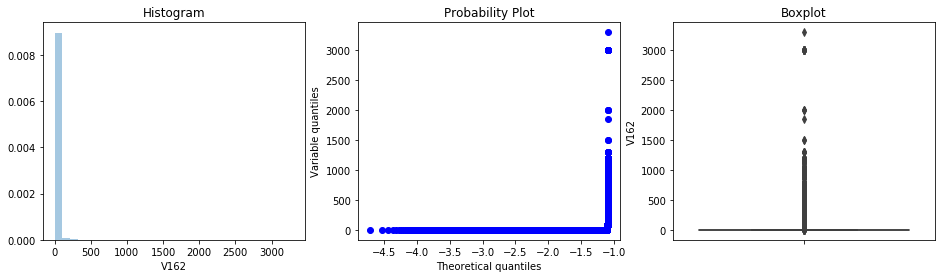

Feature: V163

count    81945.000000
mean         5.505955
std         63.077887
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3300.000000
Name: V163, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


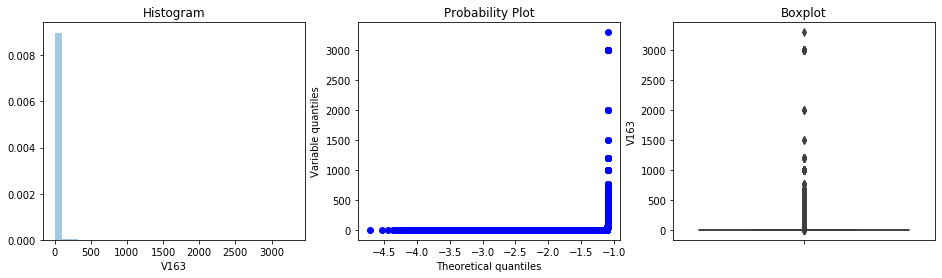

Feature: V164

count    81951.000000
mean       877.888928
std       6049.166505
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      93736.000000
Name: V164, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


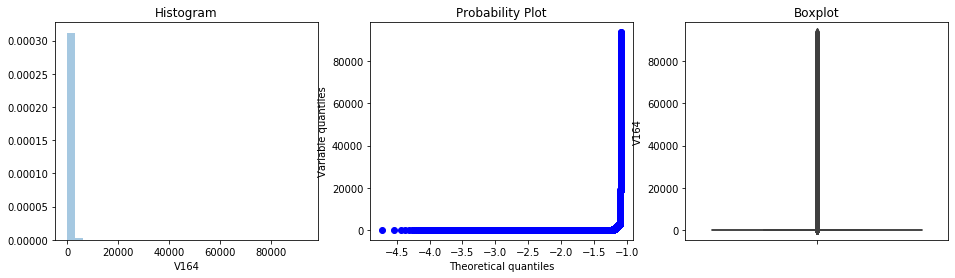

Feature: V165

count    81951.000000
mean      2239.912219
std       8223.258928
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      98476.000000
Name: V165, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


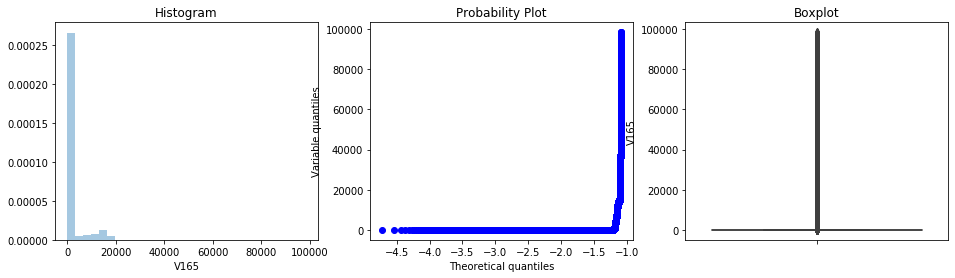

Feature: V166

count     81951.000000
mean        359.469437
std        1244.463270
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V166, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


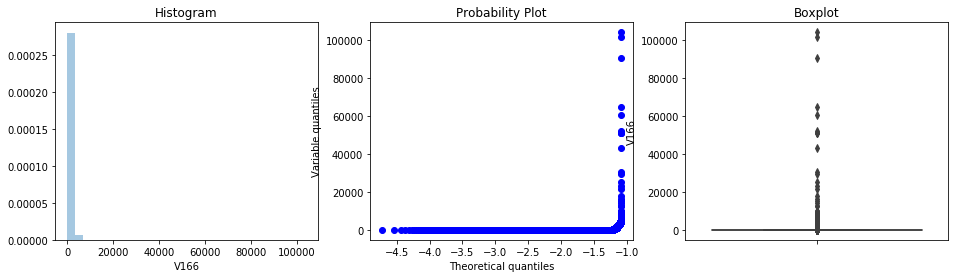

Feature: V167

count    139631.000000
mean          3.929514
std          42.200980
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         872.000000
Name: V167, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


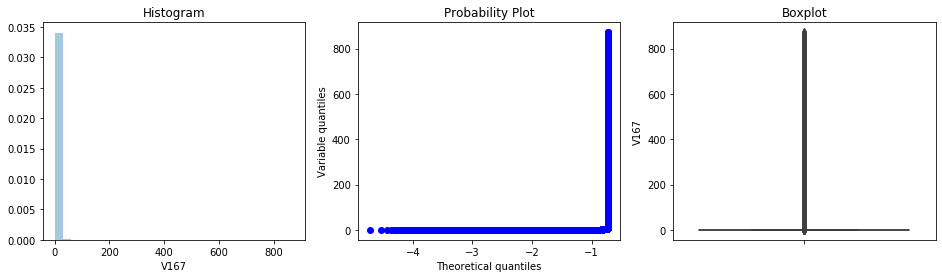

Feature: V168

count    139631.000000
mean          5.859501
std          54.032468
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         964.000000
Name: V168, dtype: float64
 


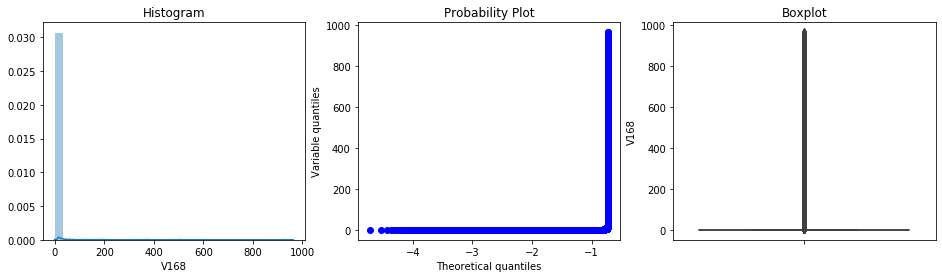

Feature: V169

count    139819.000000
mean          0.168053
std           0.904944
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          19.000000
Name: V169, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


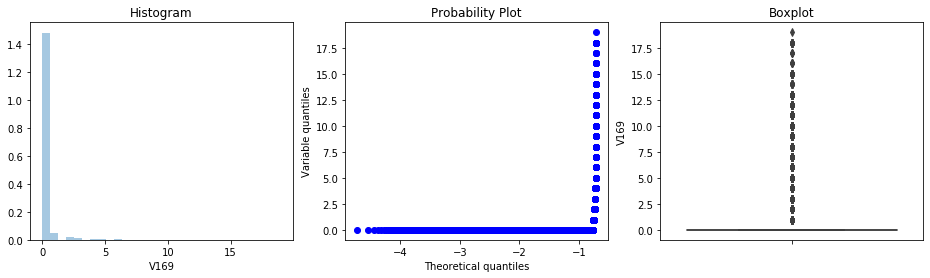

Feature: V170

count    139819.000000
mean          1.436779
std           1.751143
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          48.000000
Name: V170, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


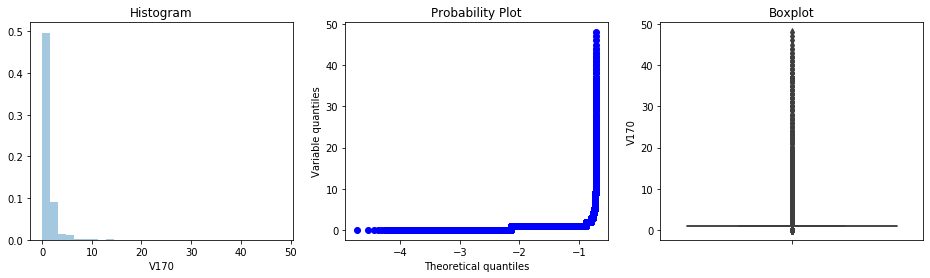

Feature: V171

count    139819.000000
mean          1.690908
std           2.444748
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          61.000000
Name: V171, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


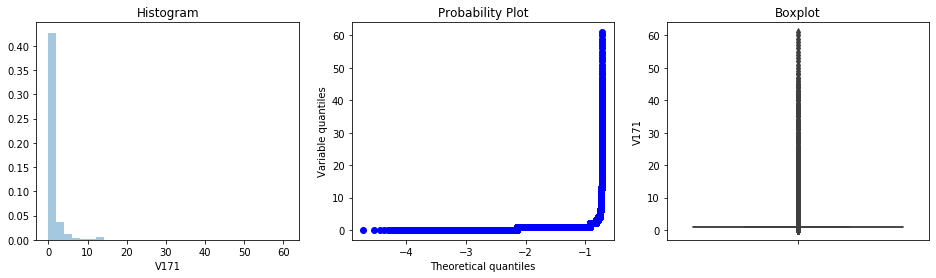

Feature: V172

count    139631.000000
mean          0.132012
std           0.924894
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          31.000000
Name: V172, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


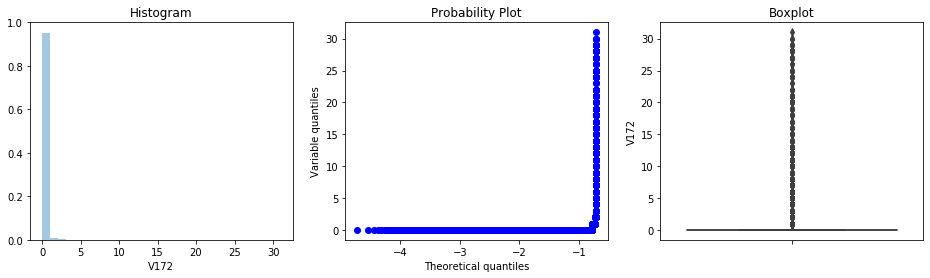

Feature: V173

count    139631.000000
mean          0.055231
std           0.264439
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V173, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


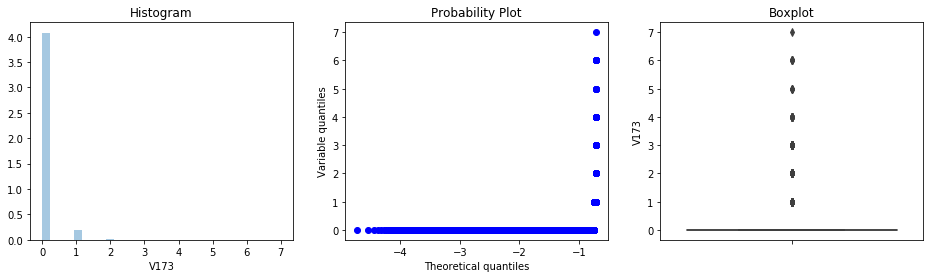

Feature: V174

count    139819.000000
mean          0.127794
std           0.379763
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: V174, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


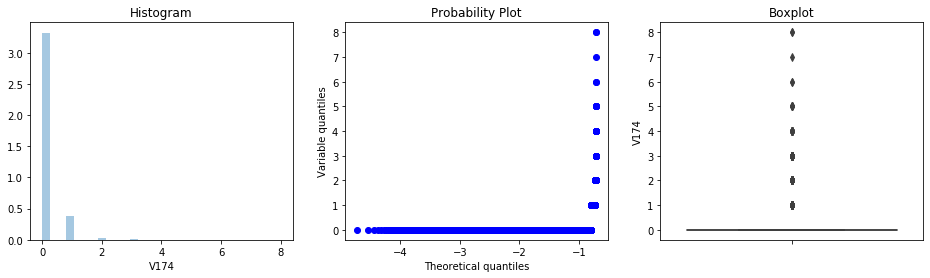

Feature: V175

count    139819.000000
mean          0.212639
std           0.857133
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: V175, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


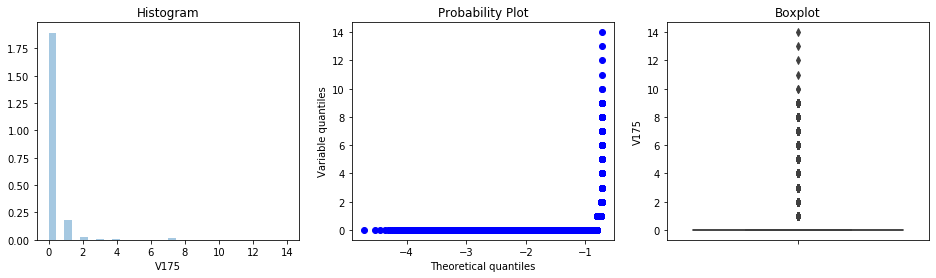

Feature: V176

count    139631.000000
mean          1.376979
std           1.829420
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          48.000000
Name: V176, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


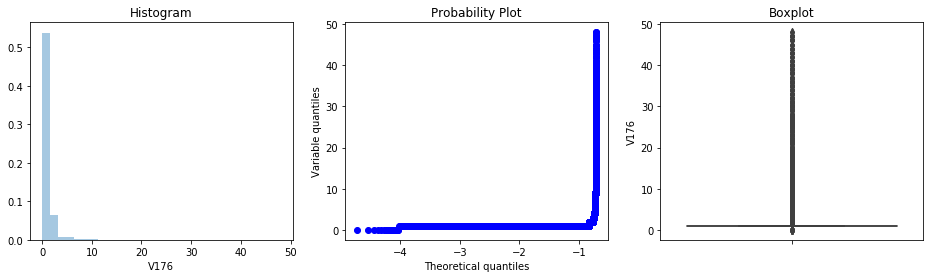

Feature: V177

count    139631.000000
mean          3.529245
std          41.310622
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         861.000000
Name: V177, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


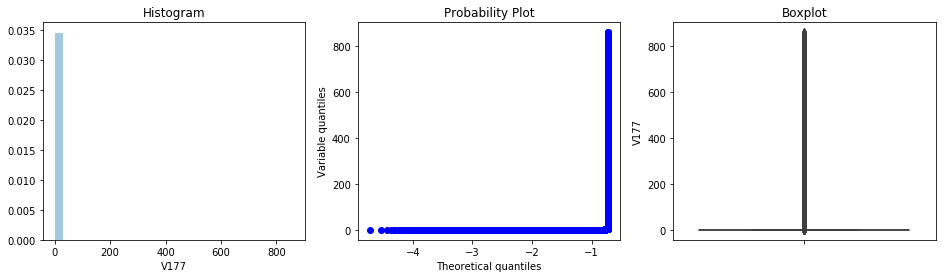

Feature: V178

count    139631.000000
mean          6.649283
std          69.447364
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1235.000000
Name: V178, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


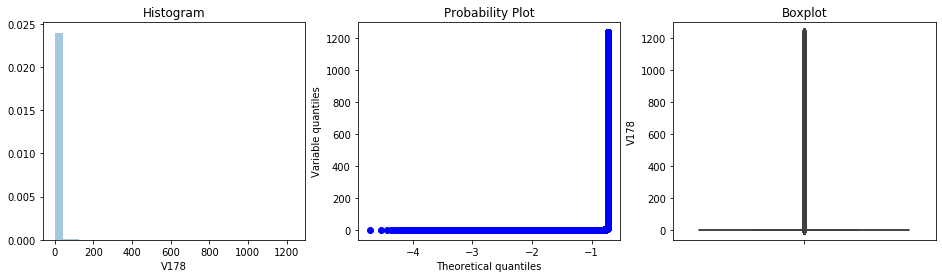

Feature: V179

count    139631.000000
mean          4.869012
std          50.489426
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         920.000000
Name: V179, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


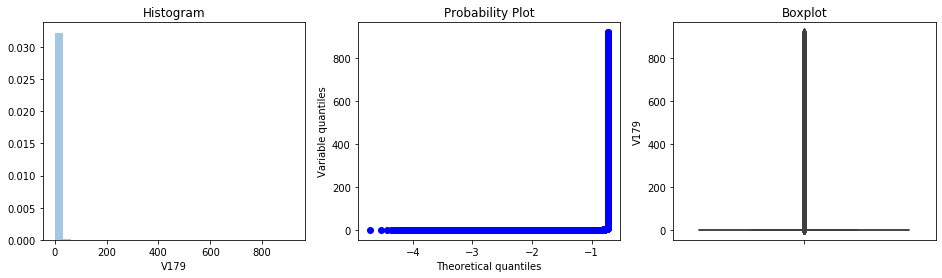

Feature: V180

count    139819.000000
mean          0.924123
std           6.112630
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: V180, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


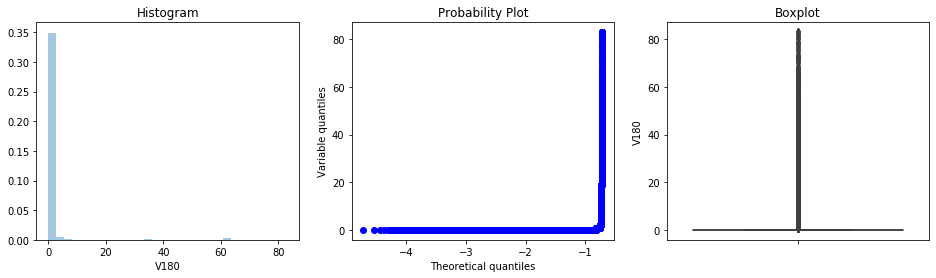

Feature: V181

count    139631.000000
mean          0.253332
std           1.248974
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: V181, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


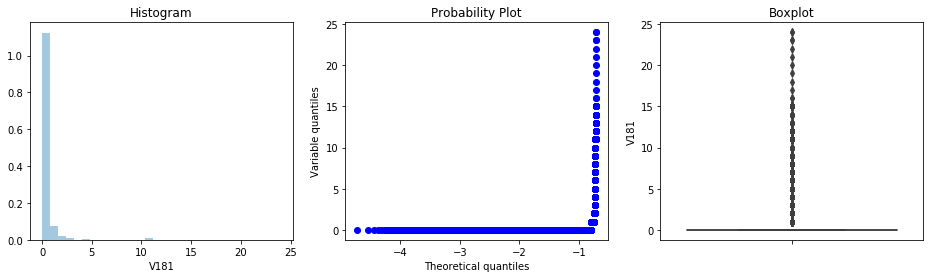

Feature: V182

count    139631.000000
mean          0.856243
std           5.792934
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: V182, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


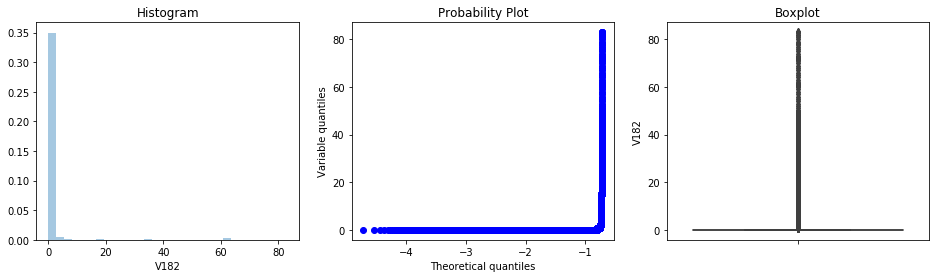

Feature: V183

count    139631.000000
mean          0.484692
std           2.946982
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          41.000000
Name: V183, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


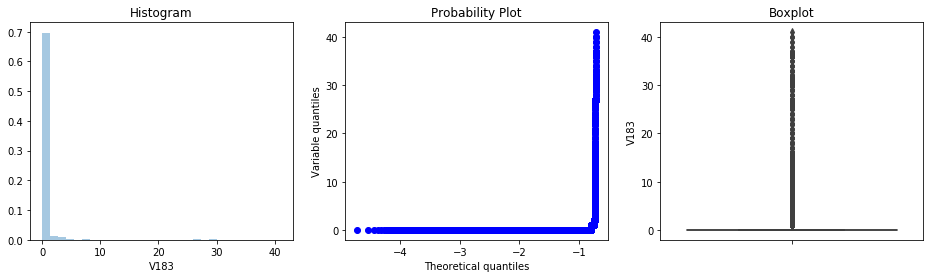

Feature: V184

count    139819.000000
mean          0.132364
std           0.543699
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: V184, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


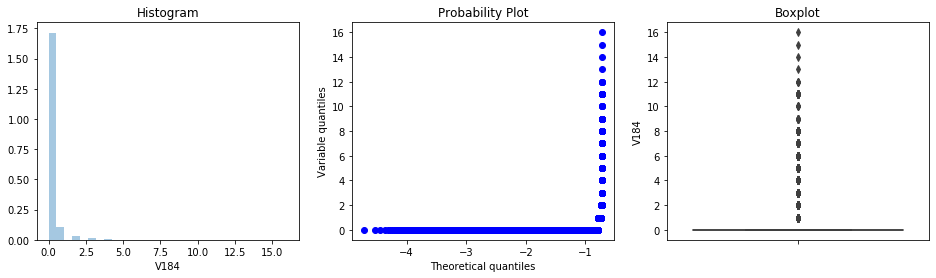

Feature: V185

count    139819.000000
mean          0.173903
std           0.699733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          31.000000
Name: V185, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


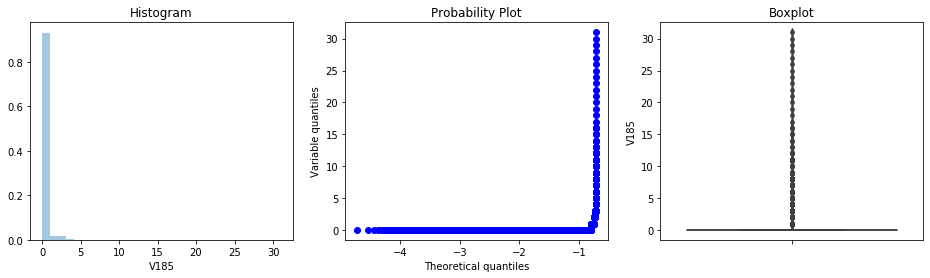

Feature: V186

count    139631.000000
mean          1.148799
std           1.223529
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          38.000000
Name: V186, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


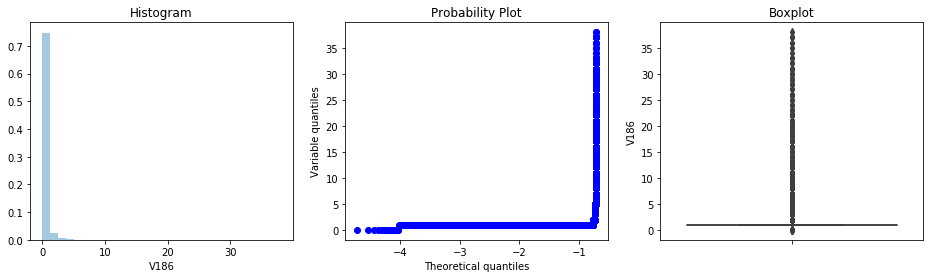

Feature: V187

count    139631.000000
mean          1.843752
std           9.884390
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         218.000000
Name: V187, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


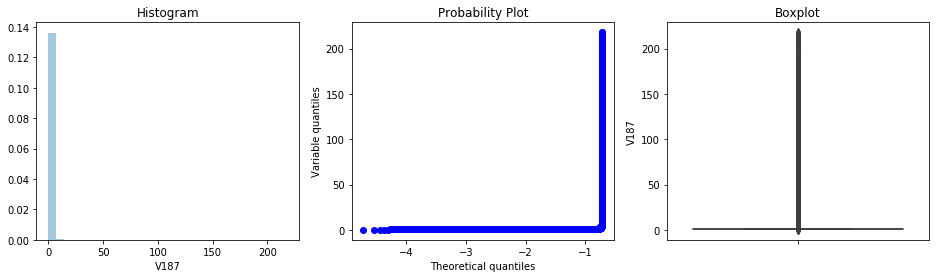

Feature: V188

count    139819.000000
mean          1.014755
std           0.671207
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          30.000000
Name: V188, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


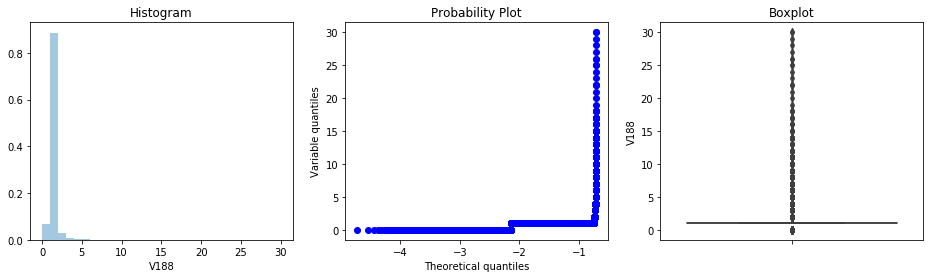

Feature: V189

count    139819.000000
mean          1.038314
std           0.792528
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          30.000000
Name: V189, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


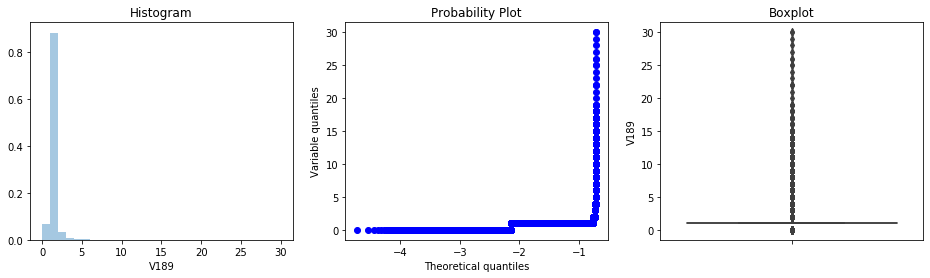

Feature: V190

count    139631.000000
mean          1.213083
std           1.480318
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          42.000000
Name: V190, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


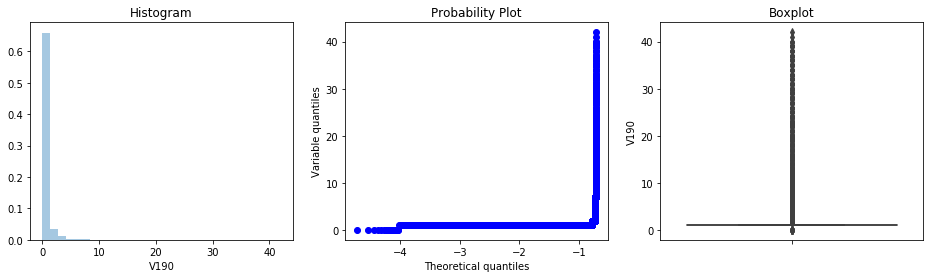

Feature: V191

count    139631.000000
mean          1.058984
std           0.677527
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: V191, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


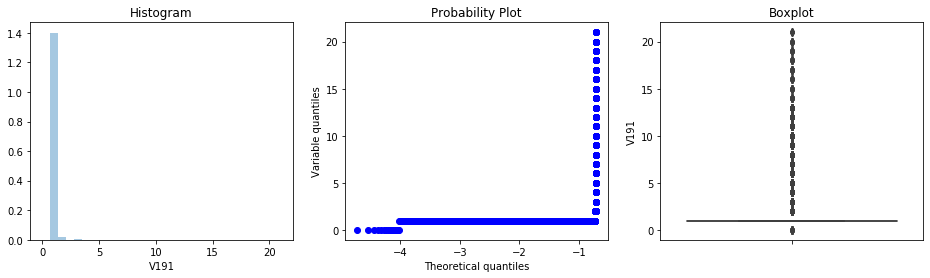

Feature: V192

count    139631.000000
mean          1.237361
std           2.635961
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          44.000000
Name: V192, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


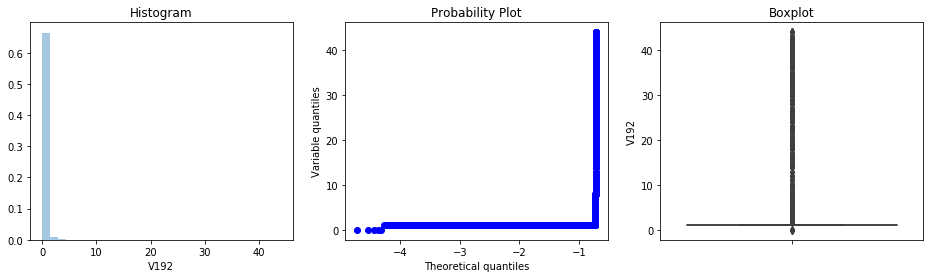

Feature: V193

count    139631.000000
mean          1.149845
std           1.714792
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          37.000000
Name: V193, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


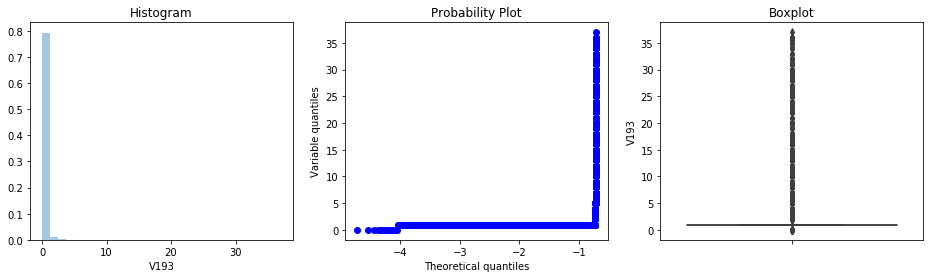

Feature: V194

count    139819.000000
mean          0.945773
std           0.304158
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: V194, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


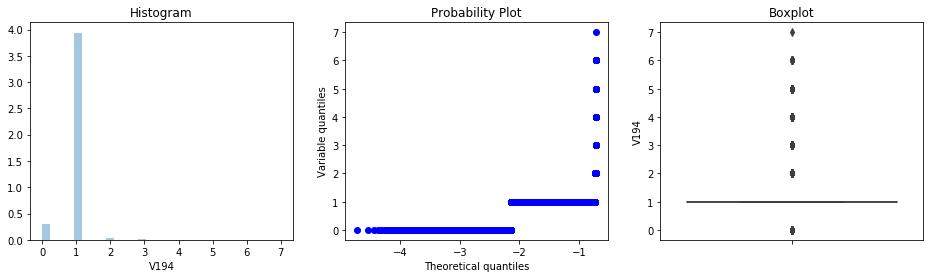

Feature: V195

count    139819.000000
mean          0.954227
std           0.376420
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          16.000000
Name: V195, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


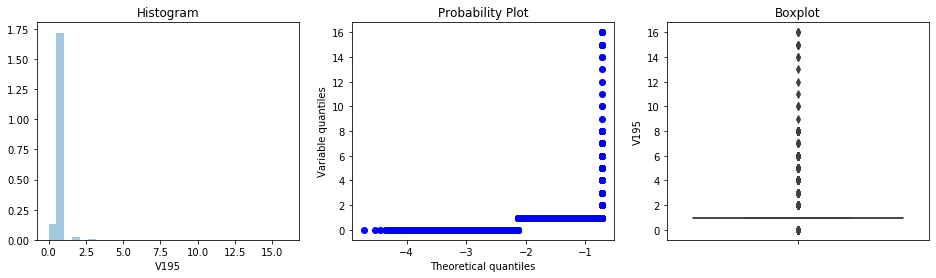

Feature: V196

count    139631.000000
mean          1.084580
std           1.105834
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          38.000000
Name: V196, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


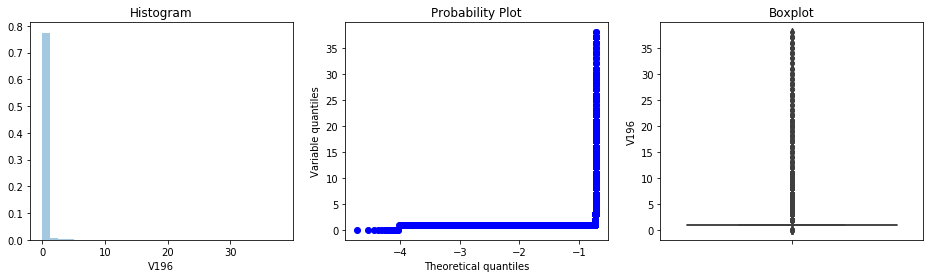

Feature: V197

count    139819.000000
mean          0.949385
std           0.336871
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          14.000000
Name: V197, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


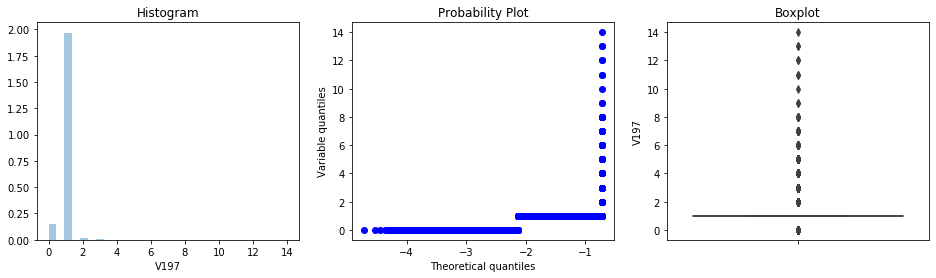

Feature: V198

count    139819.000000
mean          0.961951
std           0.493065
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: V198, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


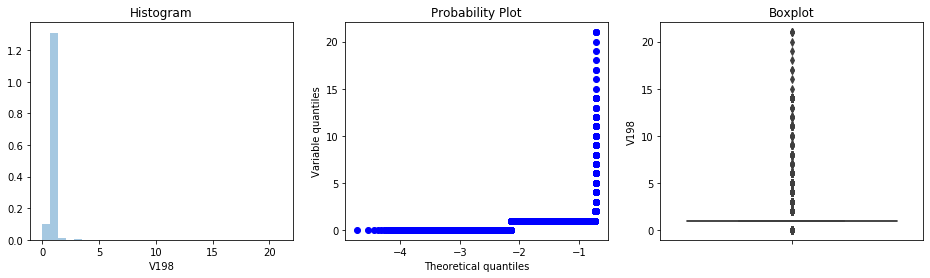

Feature: V199

count    139631.000000
mean          1.270749
std           1.671863
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          45.000000
Name: V199, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


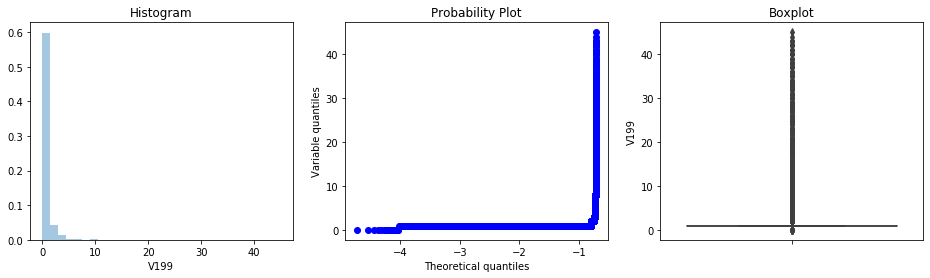

Feature: V200

count    139819.000000
mean          1.119977
std           1.253853
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          45.000000
Name: V200, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


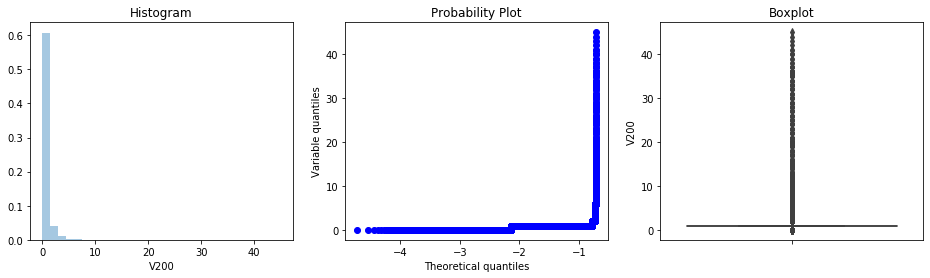

Feature: V201

count    139819.000000
mean          1.159106
std           1.418618
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          55.000000
Name: V201, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


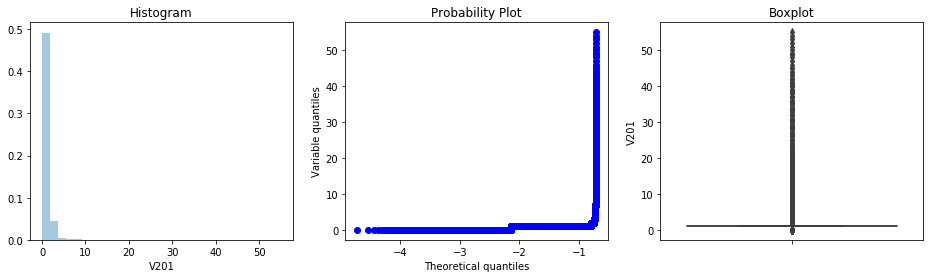

Feature: V202

count    139631.000000
mean        444.147142
std        4683.828419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V202, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


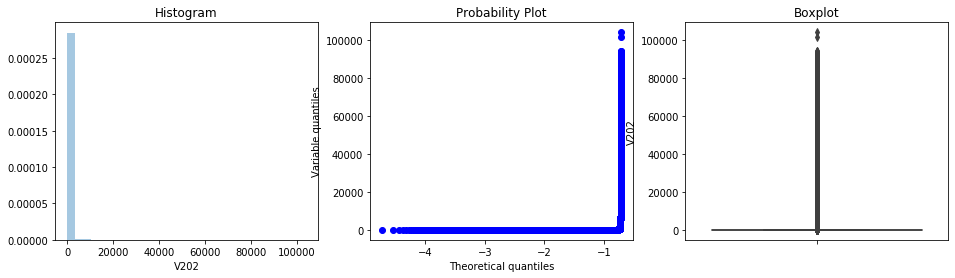

Feature: V203

count    139631.000000
mean       1078.327538
std        9105.607991
min           0.000000
25%           0.000000
50%           0.000000
75%          30.924400
max      139777.000000
Name: V203, dtype: float64
 


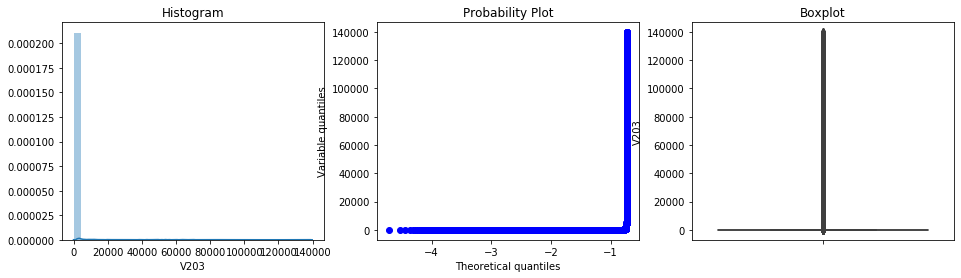

Feature: V204

count    139631.000000
mean        686.956931
std        6048.980716
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      104060.000000
Name: V204, dtype: float64
 


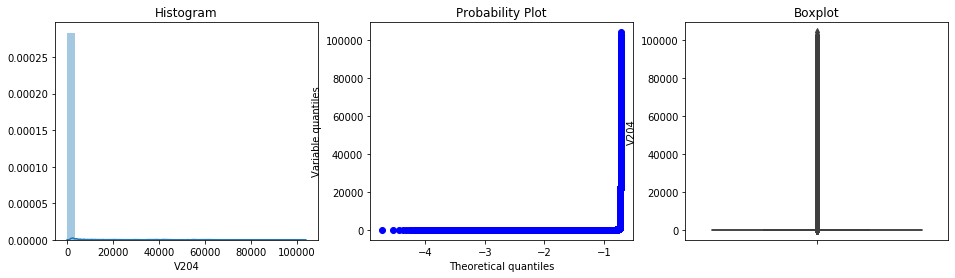

Feature: V205

count    139631.000000
mean         18.060417
std         266.545451
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V205, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


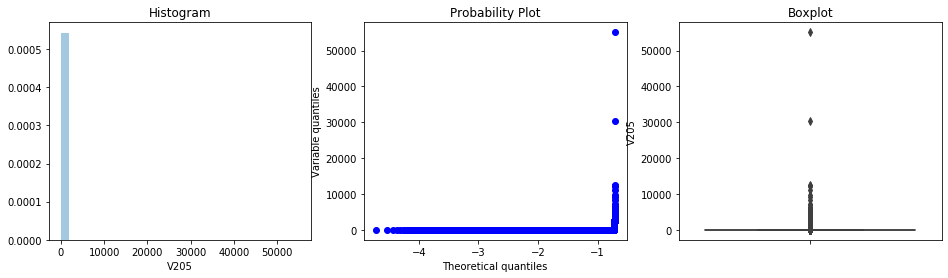

Feature: V206

count    139631.000000
mean          6.189360
std         191.474014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V206, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


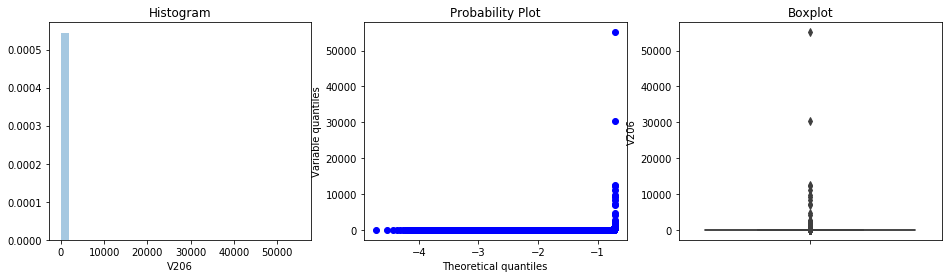

Feature: V207

count    139631.000000
mean         72.284098
std         925.676660
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V207, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


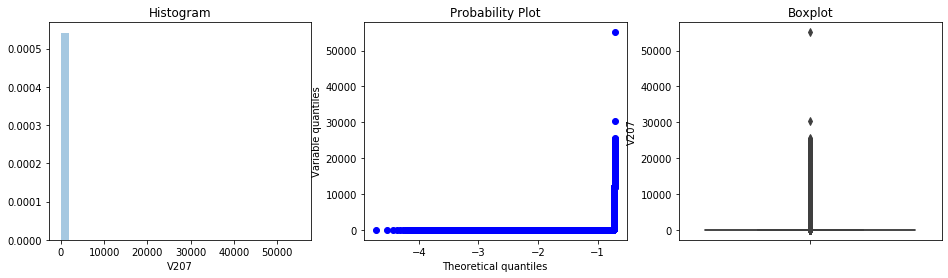

Feature: V208

count    139819.000000
mean          8.888193
std          59.047125
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3300.000000
Name: V208, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


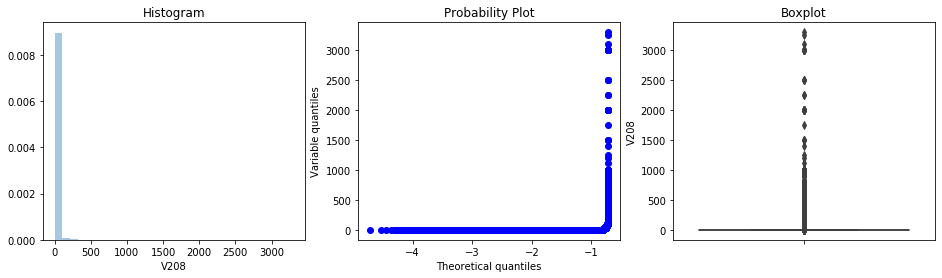

Feature: V209

count    139819.000000
mean         35.001872
std         250.800822
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        8050.000000
Name: V209, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


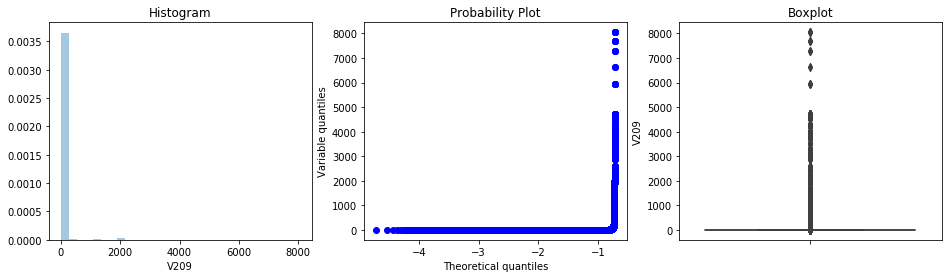

Feature: V210

count    139819.000000
mean         14.391835
std          86.523724
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3300.000000
Name: V210, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


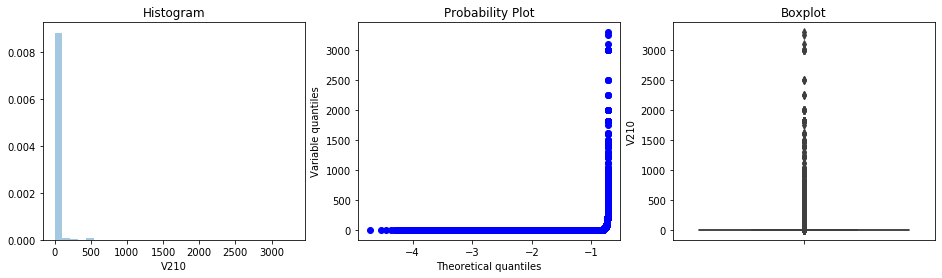

Feature: V211

count    139631.000000
mean        385.137037
std        4541.837915
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       92888.000000
Name: V211, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


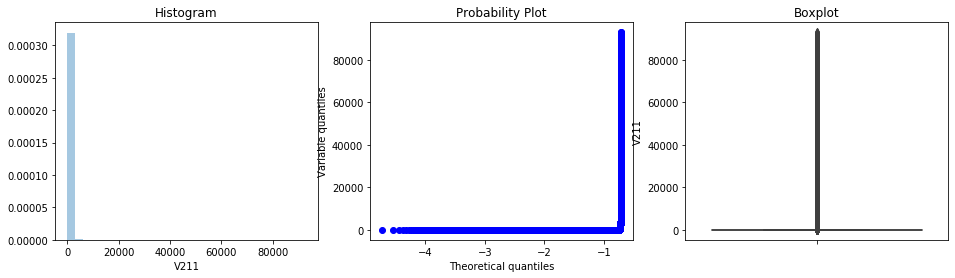

Feature: V212

count    139631.000000
mean        765.988339
std        7496.120737
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      129006.000000
Name: V212, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


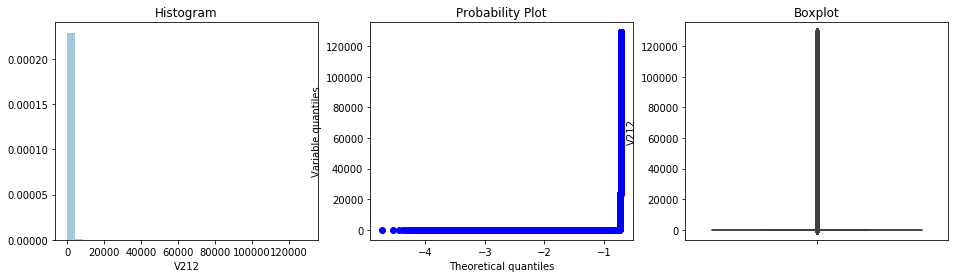

Feature: V213

count    139631.000000
mean        536.302802
std        5471.664736
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       97628.000000
Name: V213, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


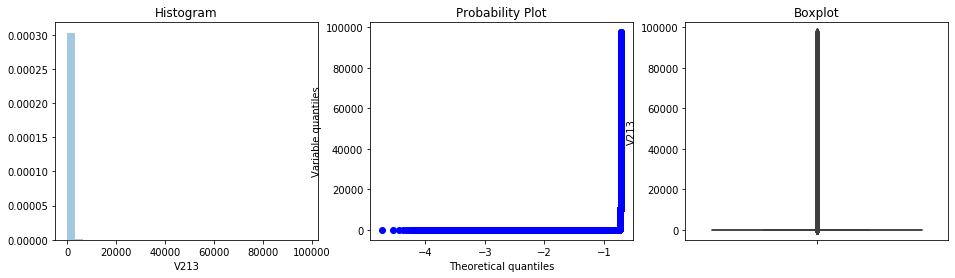

Feature: V214

count    139631.000000
mean         38.437547
std         571.834283
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V214, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


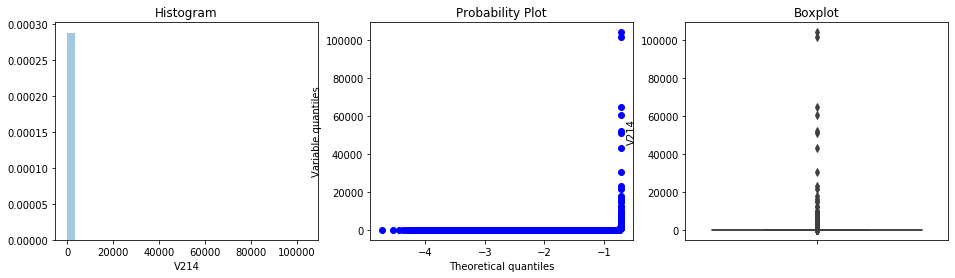

Feature: V215

count    139631.000000
mean        133.208217
std        1040.453748
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V215, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


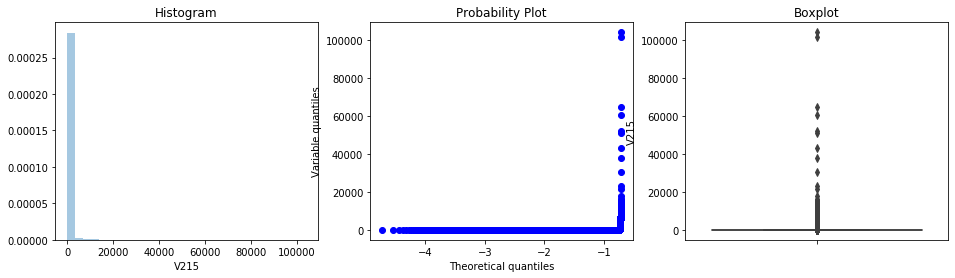

Feature: V216

count    139631.000000
mean         71.107143
std         680.267625
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V216, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


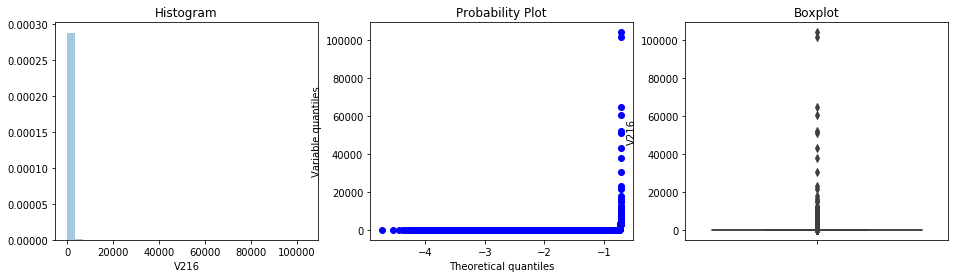

Feature: V217

count    130430.000000
mean          1.054619
std           9.547354
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         303.000000
Name: V217, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


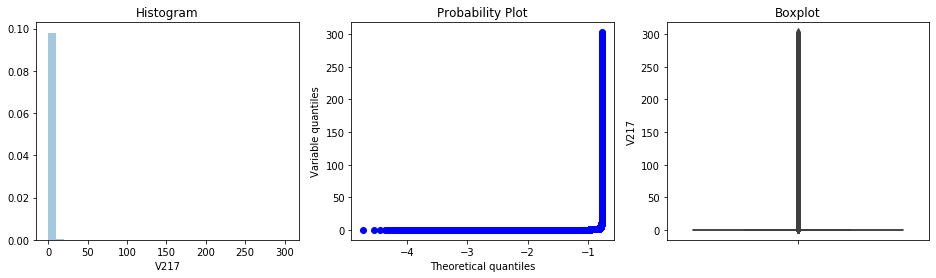

Feature: V218

count    130430.000000
mean          1.725784
std          13.919876
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         400.000000
Name: V218, dtype: float64
 


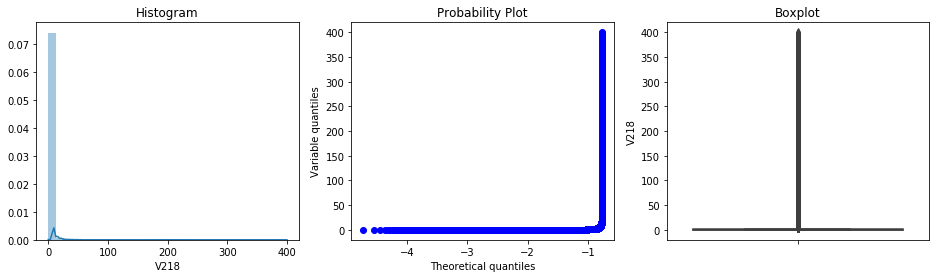

Feature: V219

count    130430.000000
mean          1.367132
std          12.044032
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         378.000000
Name: V219, dtype: float64
 


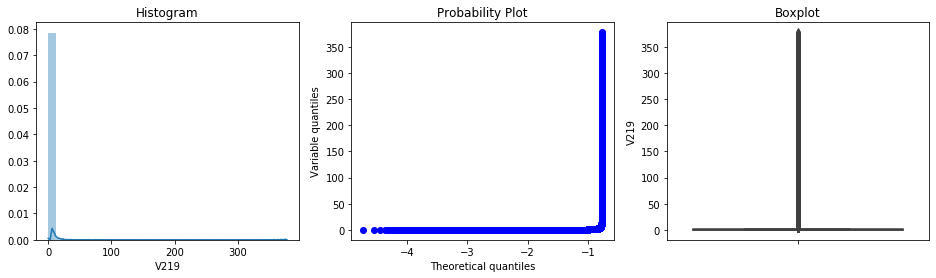

Feature: V220

count    141416.000000
mean          0.169472
std           1.002463
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: V220, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


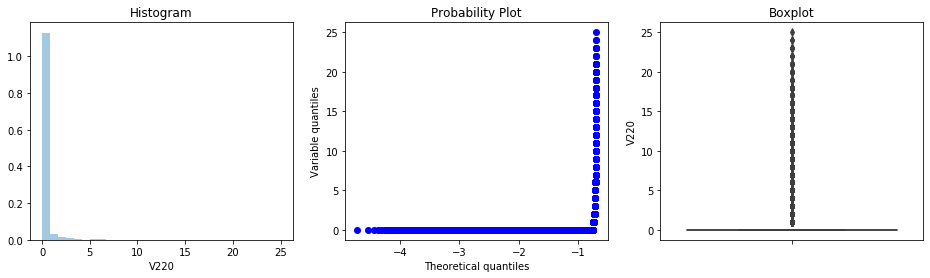

Feature: V221

count    141416.000000
mean          1.274912
std           2.728792
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         384.000000
Name: V221, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


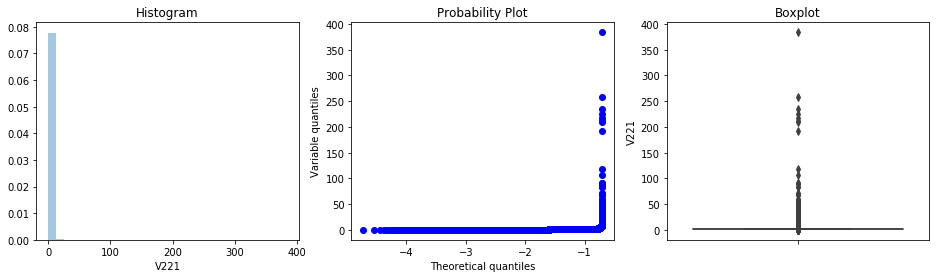

Feature: V222

count    141416.000000
mean          1.359005
std           2.913772
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         384.000000
Name: V222, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


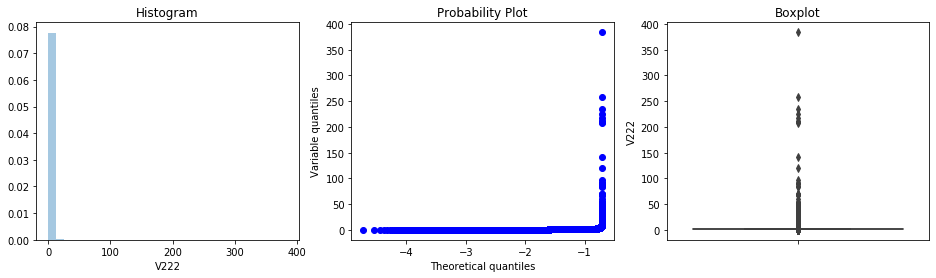

Feature: V223

count    130430.000000
mean          0.093153
std           0.402232
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: V223, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


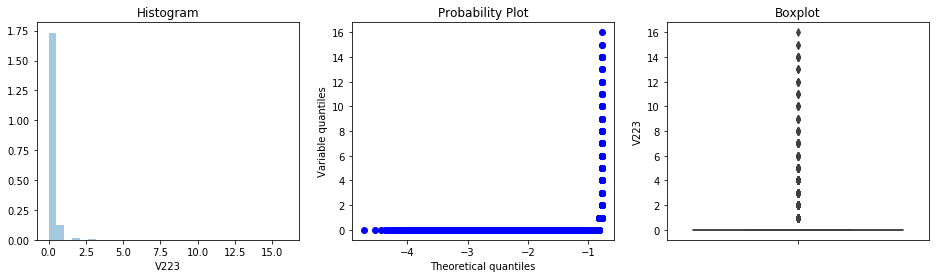

Feature: V224

count    130430.000000
mean          0.394748
std           3.443310
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         144.000000
Name: V224, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


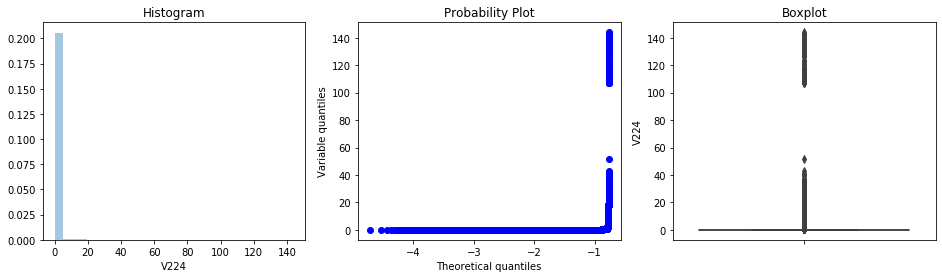

Feature: V225

count    130430.000000
mean          0.191758
std           1.290820
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          51.000000
Name: V225, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


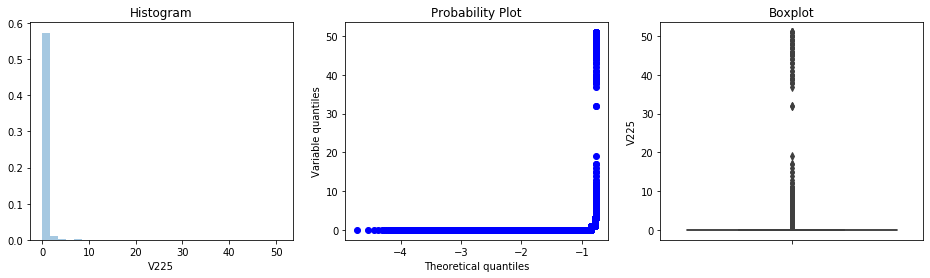

Feature: V226

count    130430.000000
mean          0.247612
std           2.756449
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         242.000000
Name: V226, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


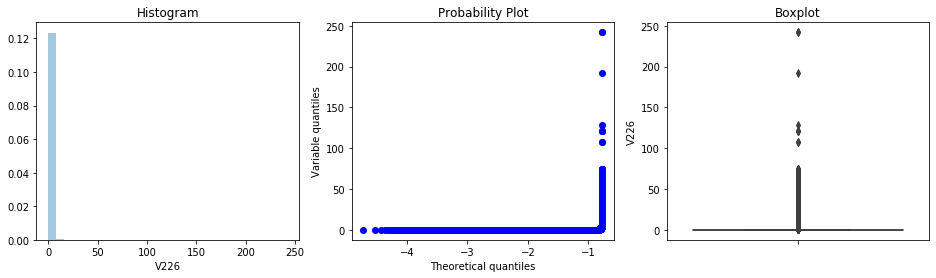

Feature: V227

count    141416.000000
mean          0.147975
std           2.049363
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         360.000000
Name: V227, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


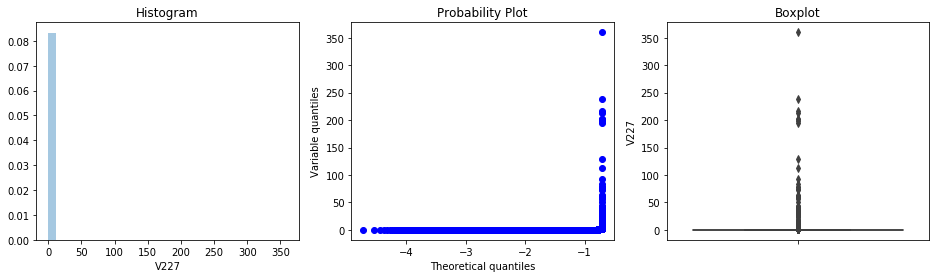

Feature: V228

count    130430.000000
mean          1.351928
std           1.409722
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          54.000000
Name: V228, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


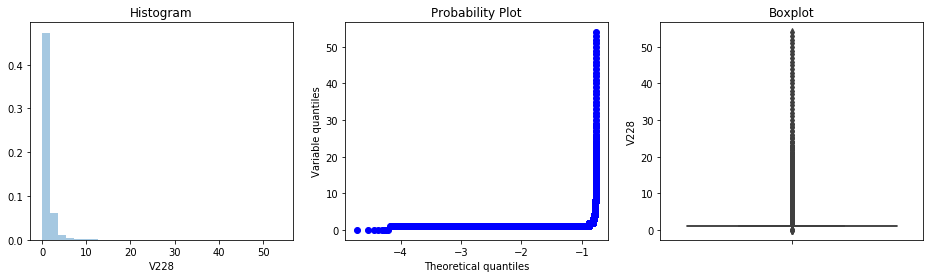

Feature: V229

count    130430.000000
mean          1.638710
std           4.316026
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         176.000000
Name: V229, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


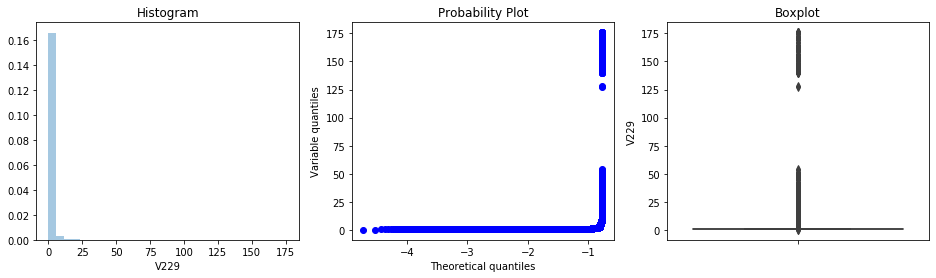

Feature: V230

count    130430.000000
mean          1.465476
std           2.122783
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          65.000000
Name: V230, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


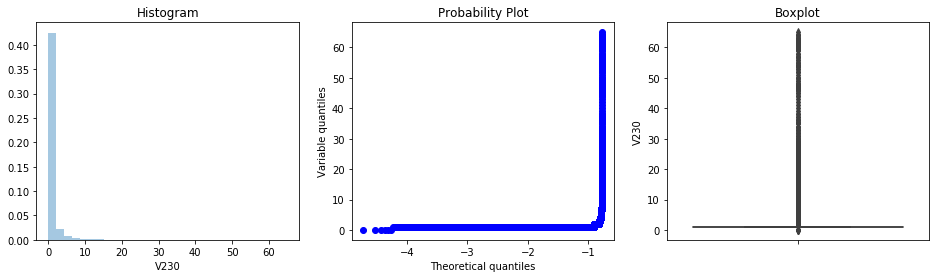

Feature: V231

count    130430.000000
mean          0.765506
std           8.877119
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         293.000000
Name: V231, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


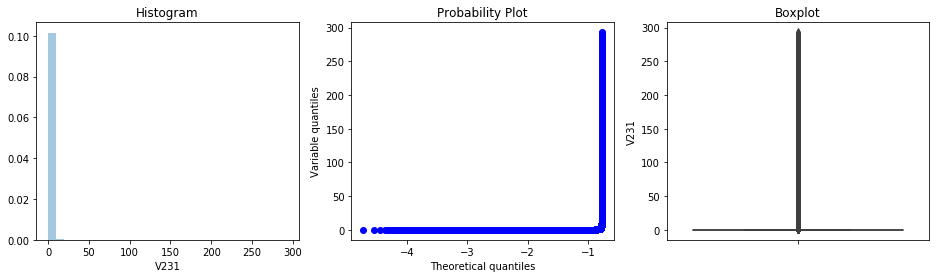

Feature: V232

count    130430.000000
mean          1.005597
std          10.460253
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         337.000000
Name: V232, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


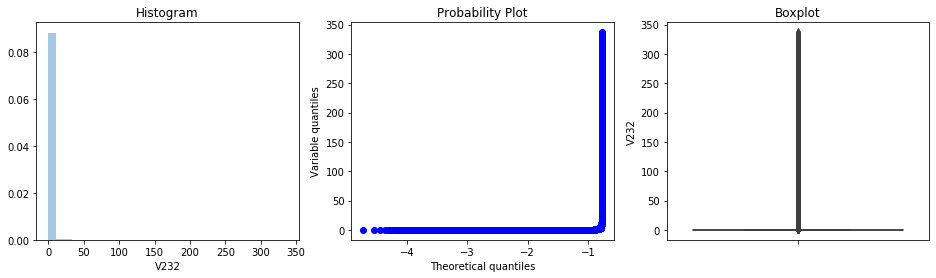

Feature: V233

count    130430.000000
mean          0.908388
std          10.149884
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         332.000000
Name: V233, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


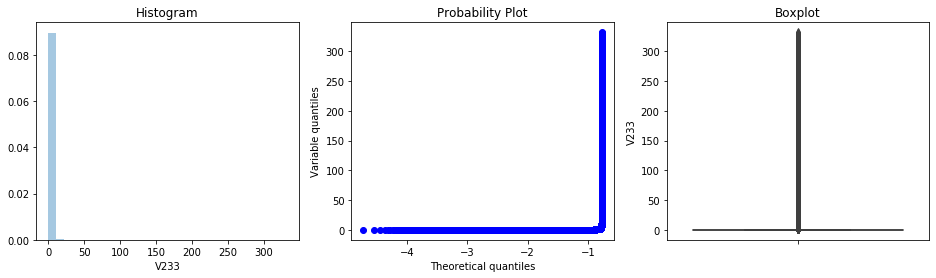

Feature: V234

count    141416.000000
mean          2.092847
std          11.323036
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         121.000000
Name: V234, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


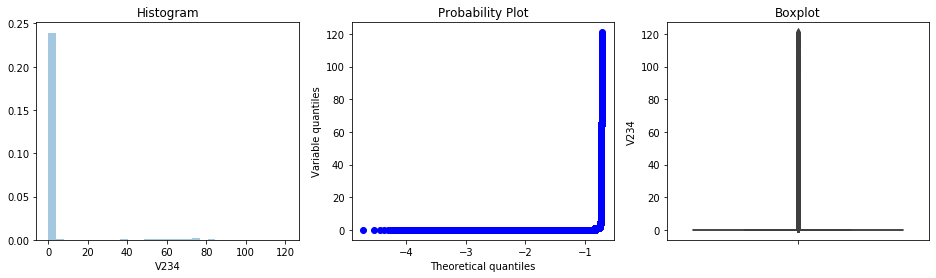

Feature: V235

count    130430.000000
mean          0.184106
std           0.902639
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: V235, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


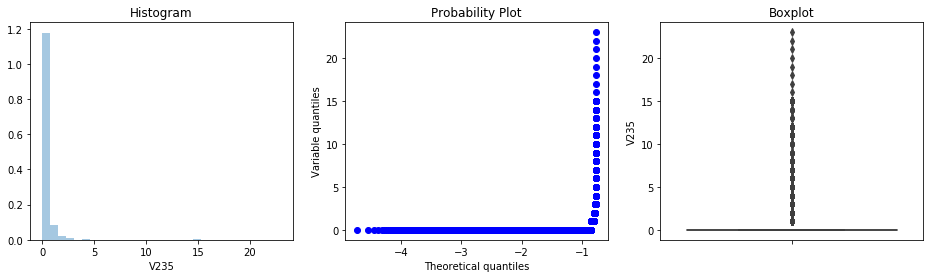

Feature: V236

count    130430.000000
mean          0.307667
std           2.152332
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          45.000000
Name: V236, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


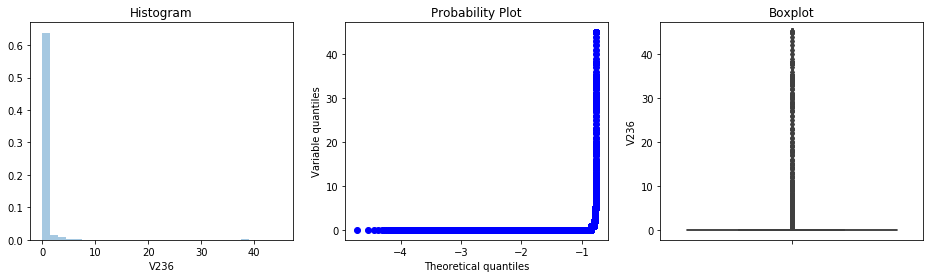

Feature: V237

count    130430.000000
mean          0.253500
std           1.716634
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: V237, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


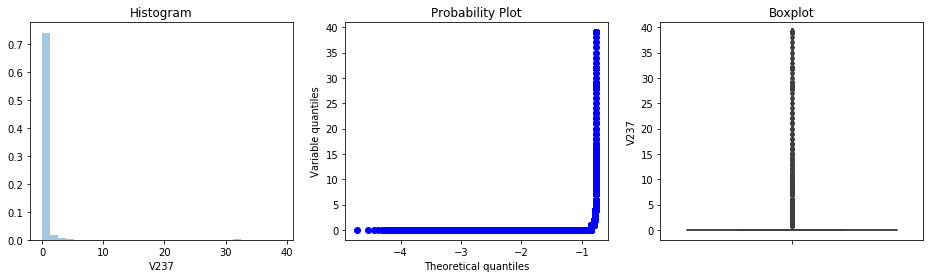

Feature: V238

count    141416.000000
mean          0.127956
std           0.574657
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: V238, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


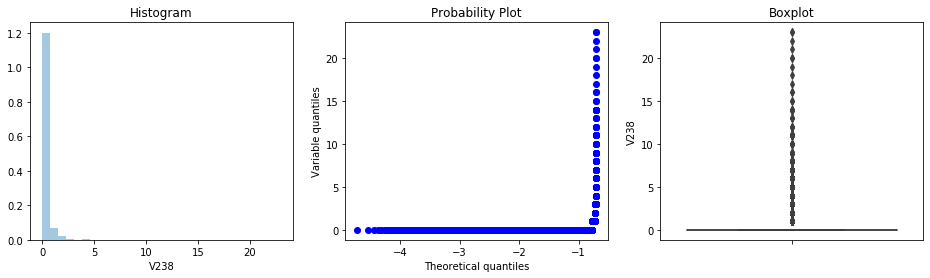

Feature: V239

count    141416.000000
mean          0.136965
std           0.616260
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: V239, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


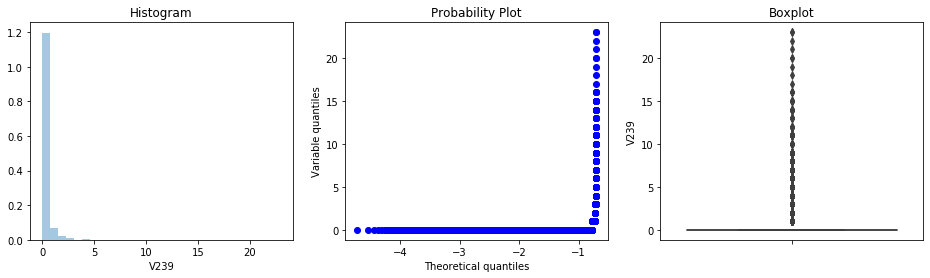

Feature: V240

count    130430.000000
mean          1.000997
std           0.049522
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: V240, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


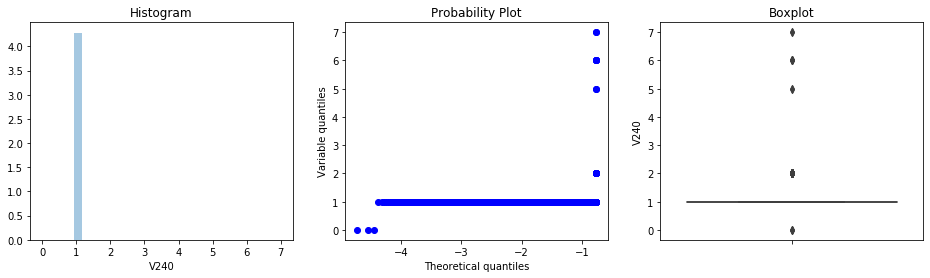

Feature: V241

count    130430.000000
mean          1.000238
std           0.022663
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: V241, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


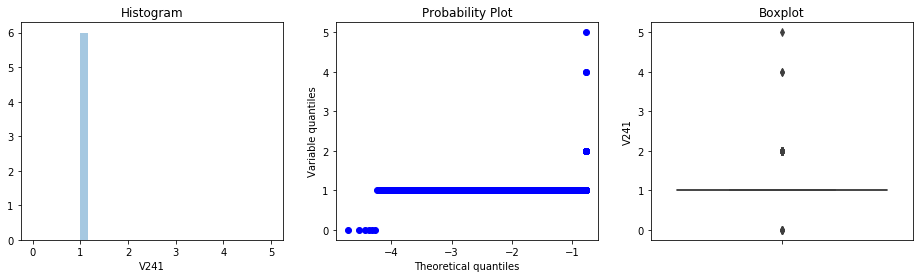

Feature: V242

count    130430.000000
mean          1.113463
std           0.660110
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          20.000000
Name: V242, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


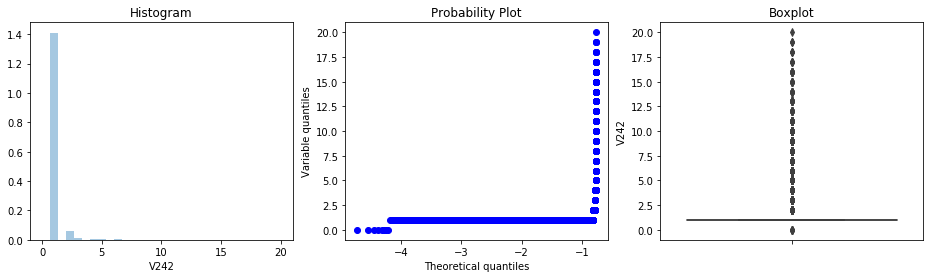

Feature: V243

count    130430.000000
mean          1.178387
std           1.398953
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          57.000000
Name: V243, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


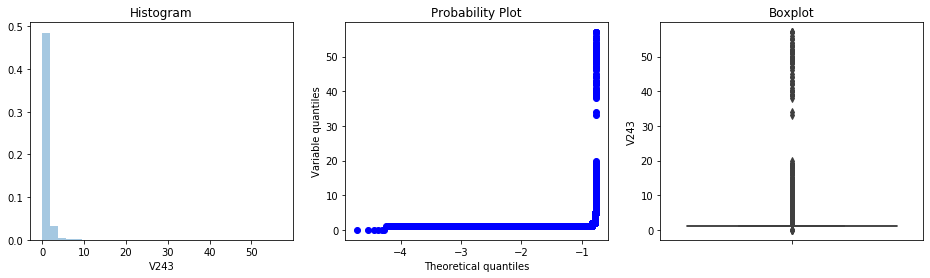

Feature: V244

count    130430.000000
mean          1.118562
std           0.698807
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          22.000000
Name: V244, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


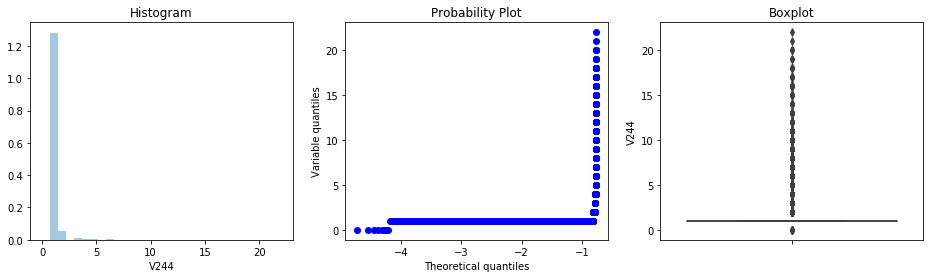

Feature: V245

count    141416.000000
mean          0.876619
std           1.821065
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         262.000000
Name: V245, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


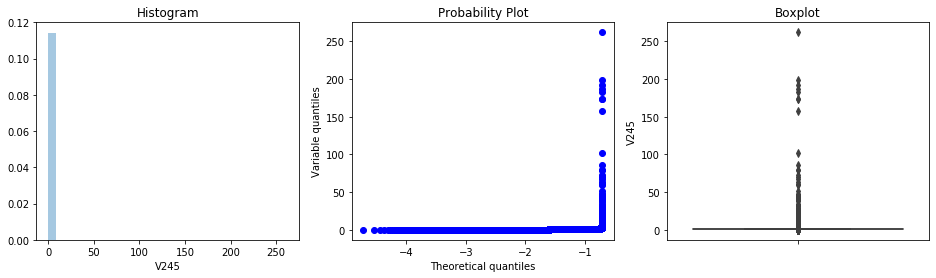

Feature: V246

count    130430.000000
mean          1.183723
std           1.040363
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          45.000000
Name: V246, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


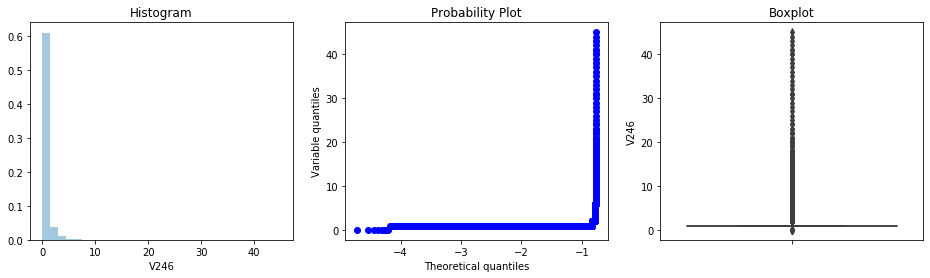

Feature: V247

count    130430.000000
mean          1.025355
std           0.281604
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          18.000000
Name: V247, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


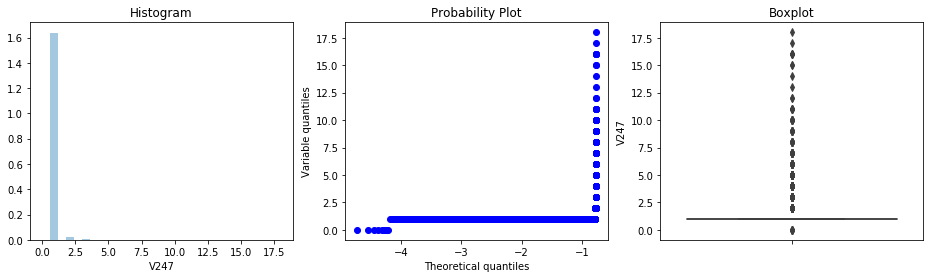

Feature: V248

count    130430.000000
mean          1.069493
std           0.888341
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          36.000000
Name: V248, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


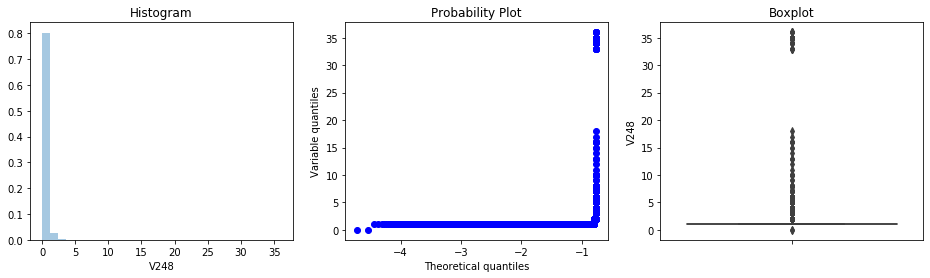

Feature: V249

count    130430.000000
mean          1.042851
std           0.528812
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          22.000000
Name: V249, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


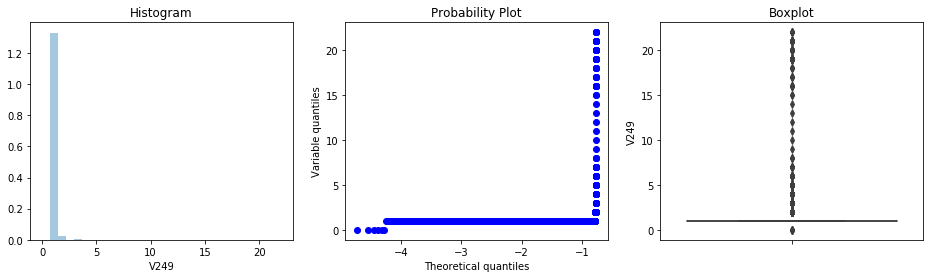

Feature: V250

count    141416.000000
mean          0.788588
std           0.488386
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          18.000000
Name: V250, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


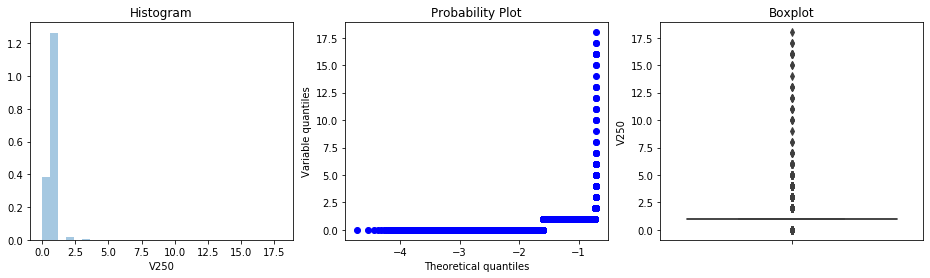

Feature: V251

count    141416.000000
mean          0.794231
std           0.501240
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          18.000000
Name: V251, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


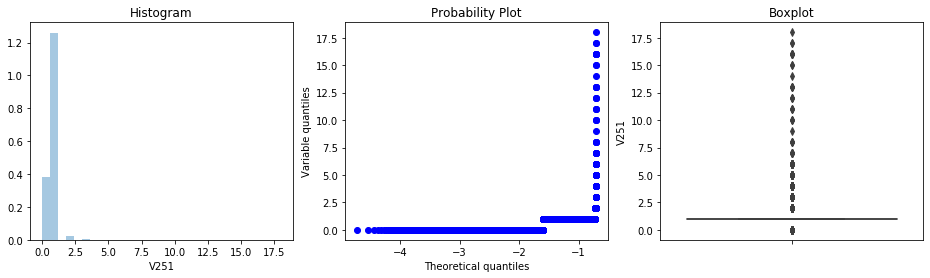

Feature: V252

count    130430.000000
mean          1.032048
std           0.389546
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          24.000000
Name: V252, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


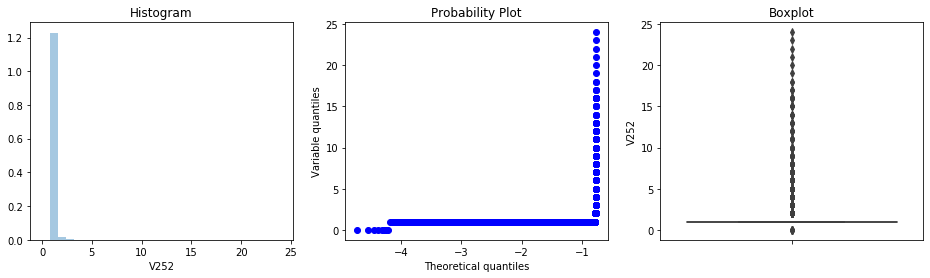

Feature: V253

count    130430.000000
mean          1.162164
std           3.612553
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         163.000000
Name: V253, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


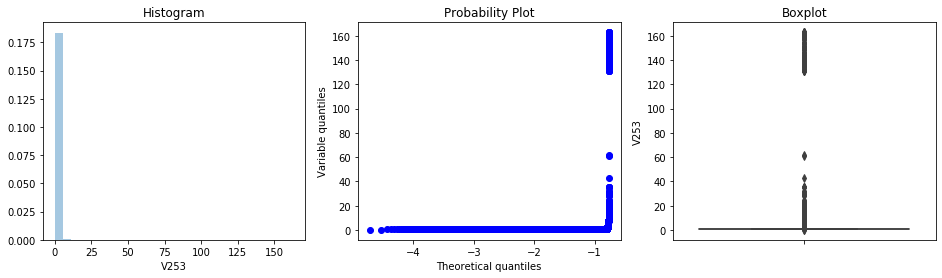

Feature: V254

count    130430.000000
mean          1.075113
std           1.357550
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          60.000000
Name: V254, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


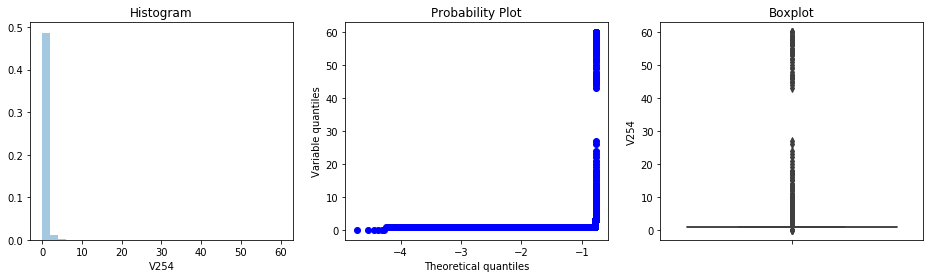

Feature: V255

count    141416.000000
mean          0.806656
std           0.939124
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          87.000000
Name: V255, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


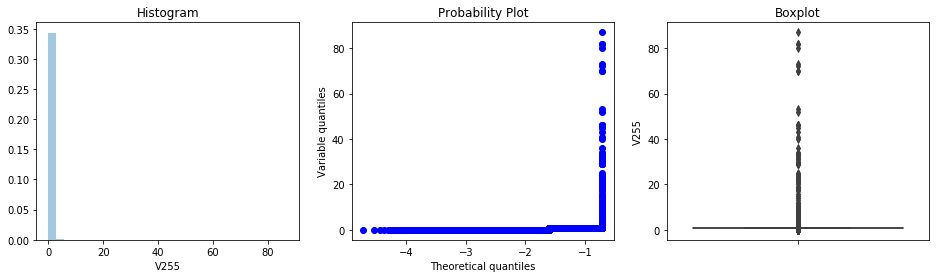

Feature: V256

count    141416.000000
mean          0.814950
std           0.969953
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          87.000000
Name: V256, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


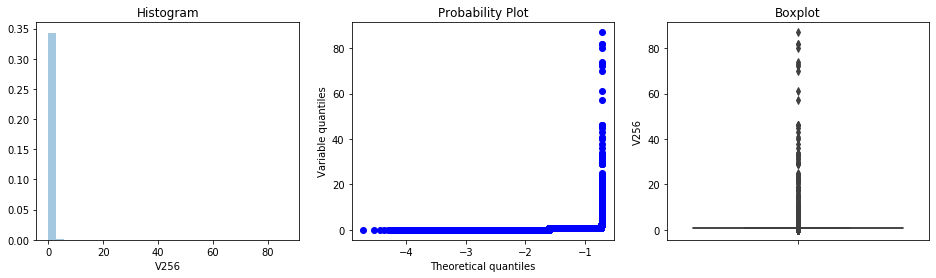

Feature: V257

count    130430.000000
mean          1.250993
std           1.299956
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          48.000000
Name: V257, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


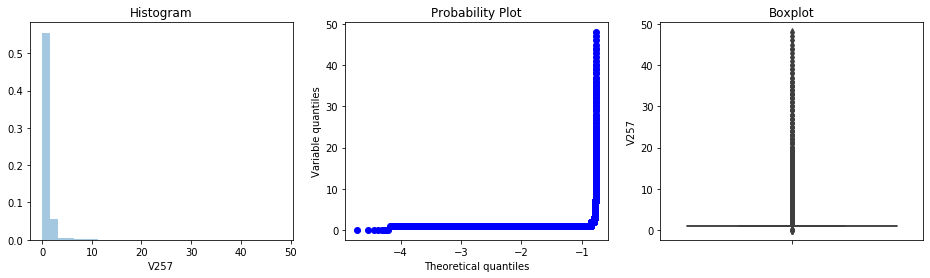

Feature: V258

count    130430.000000
mean          1.343510
std           2.015811
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          66.000000
Name: V258, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


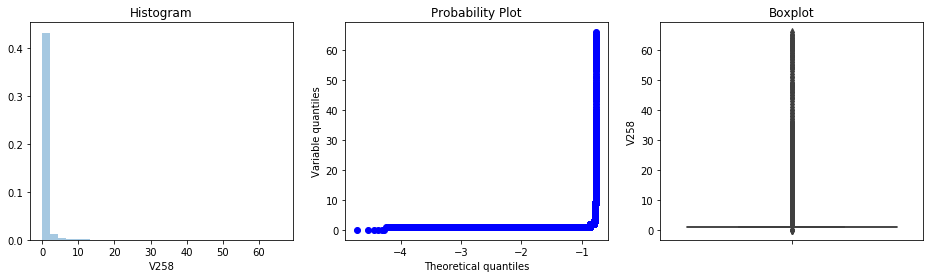

Feature: V259

count    141416.000000
mean          0.967832
std           2.113447
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         285.000000
Name: V259, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


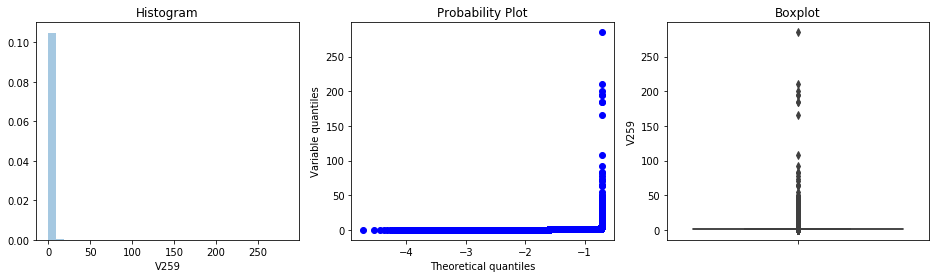

Feature: V260

count    130430.000000
mean          0.964425
std           0.379828
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: V260, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


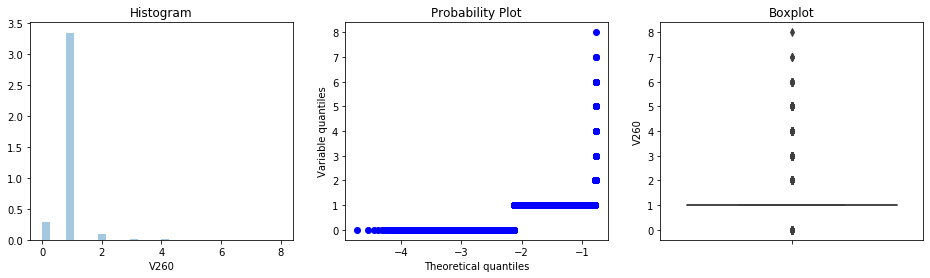

Feature: V261

count    130430.000000
mean          1.107161
std           1.323230
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          49.000000
Name: V261, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


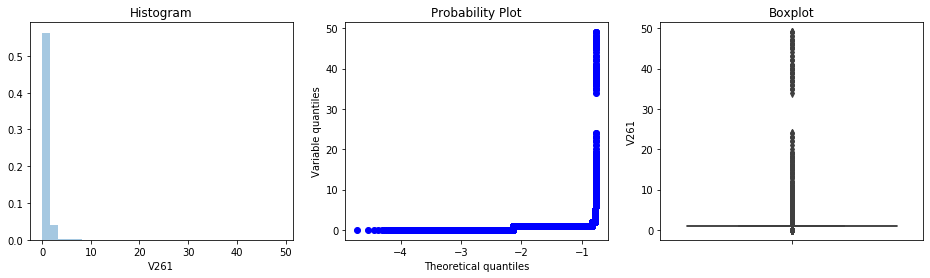

Feature: V262

count    130430.000000
mean          1.013279
std           0.625455
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          20.000000
Name: V262, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


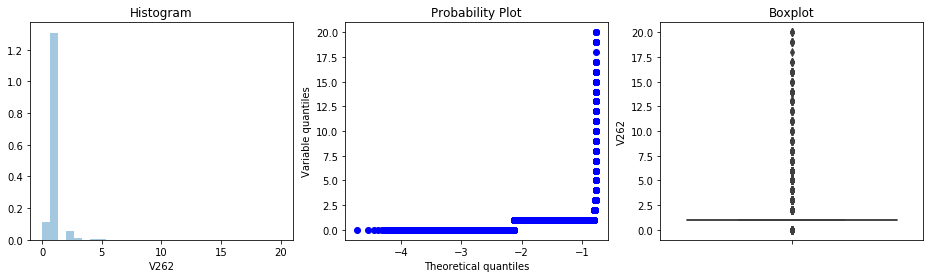

Feature: V263

count    130430.000000
mean        117.390676
std        1294.851543
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      153600.000000
Name: V263, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


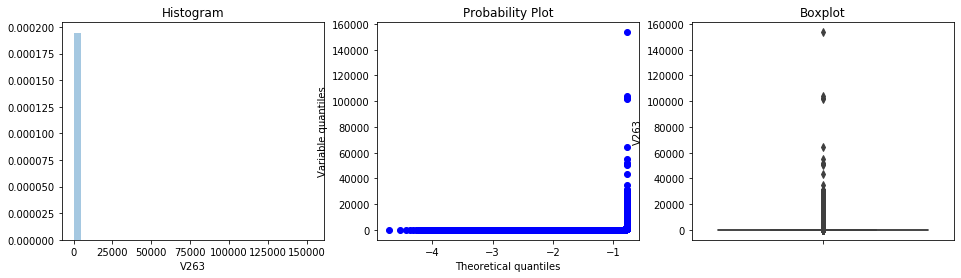

Feature: V264

count    130430.000000
mean        201.657617
std        2284.827492
min           0.000000
25%           0.000000
50%           0.000000
75%          33.593498
max      153600.000000
Name: V264, dtype: float64
 


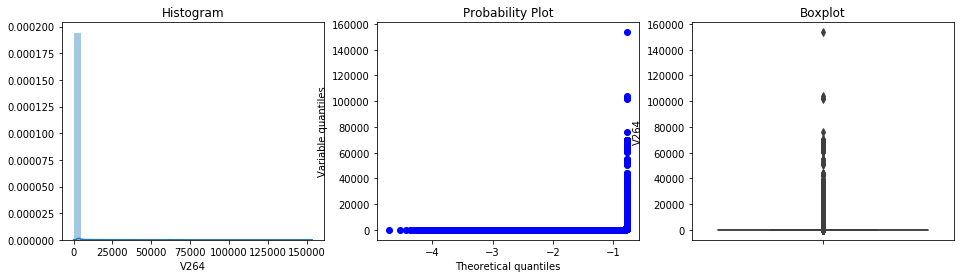

Feature: V265

count    130430.000000
mean        153.520534
std        1605.512276
min           0.000000
25%           0.000000
50%           0.000000
75%          20.897525
max      153600.000000
Name: V265, dtype: float64
 


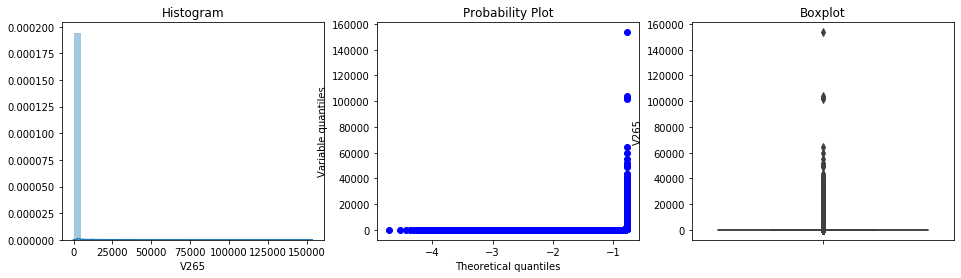

Feature: V266

count    130430.000000
mean          9.167839
std         208.038863
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V266, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


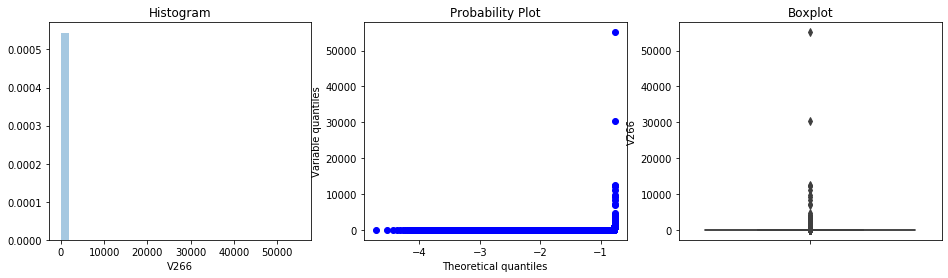

Feature: V267

count    130430.000000
mean         36.525103
std         644.878586
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V267, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


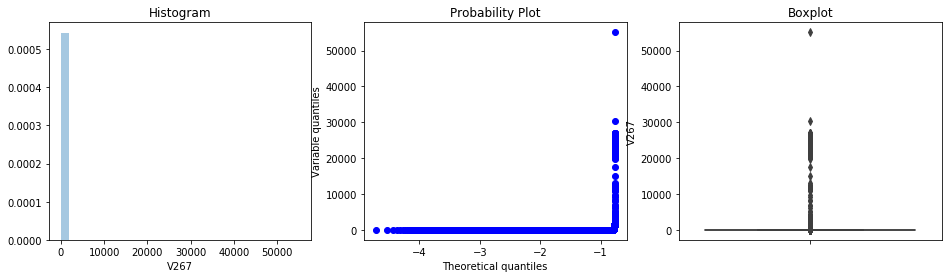

Feature: V268

count    130430.000000
mean         18.813407
std         311.280181
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V268, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


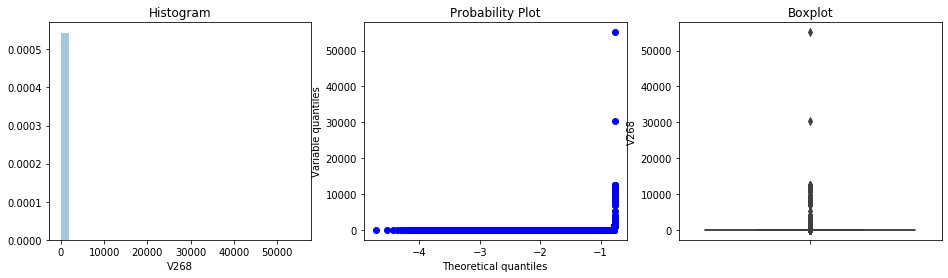

Feature: V269

count    130430.000000
mean          5.997508
std         207.317539
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V269, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


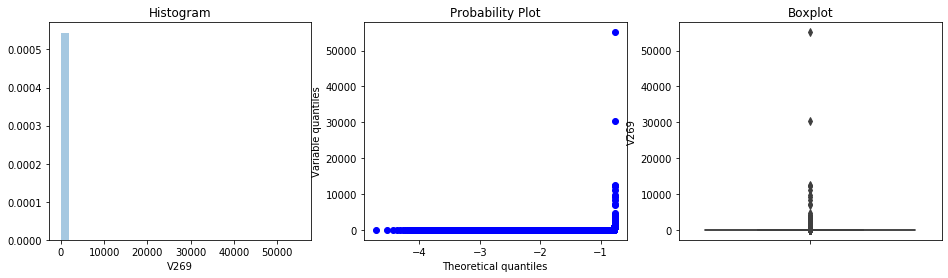

Feature: V270

count    141416.000000
mean          7.712764
std          65.507232
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4000.000000
Name: V270, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


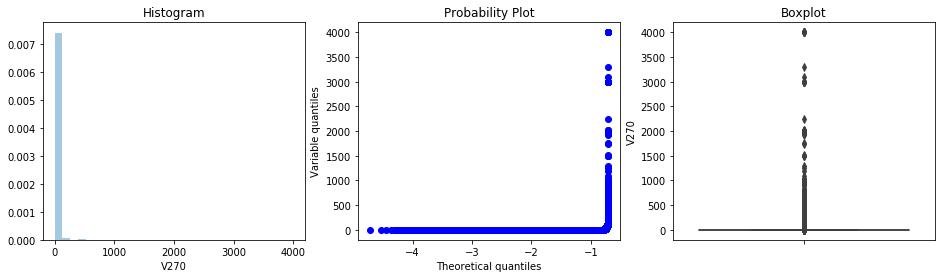

Feature: V271

count    141416.000000
mean          9.445133
std          74.147726
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4000.000000
Name: V271, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


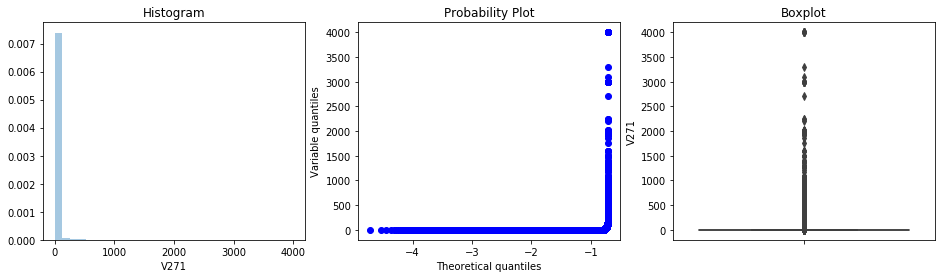

Feature: V272

count    141416.000000
mean          8.464571
std          69.723735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4000.000000
Name: V272, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


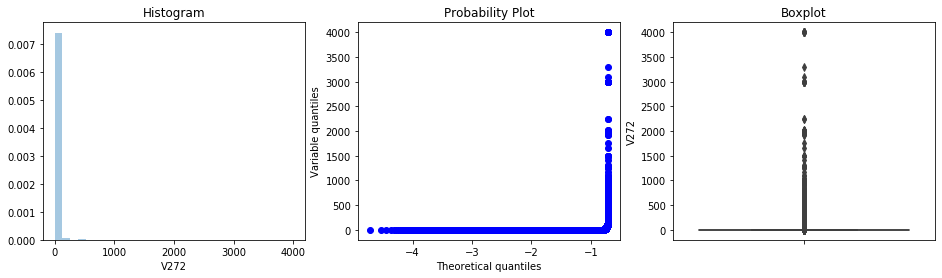

Feature: V273

count    130430.000000
mean         73.825549
std         935.187927
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       51200.000000
Name: V273, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


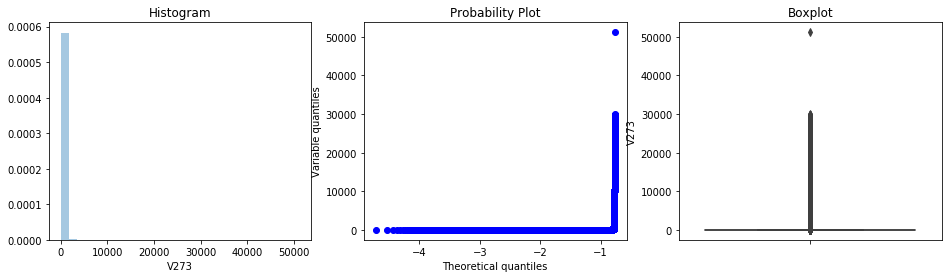

Feature: V274

count    130430.000000
mean        107.151636
std        1258.734139
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       66000.000000
Name: V274, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


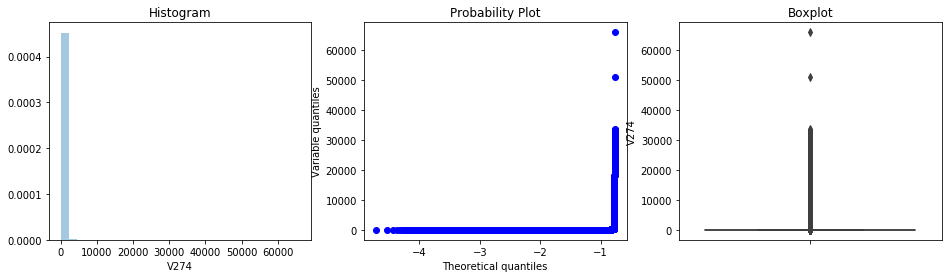

Feature: V275

count    130430.000000
mean         88.899939
std        1072.883139
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       51200.000000
Name: V275, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


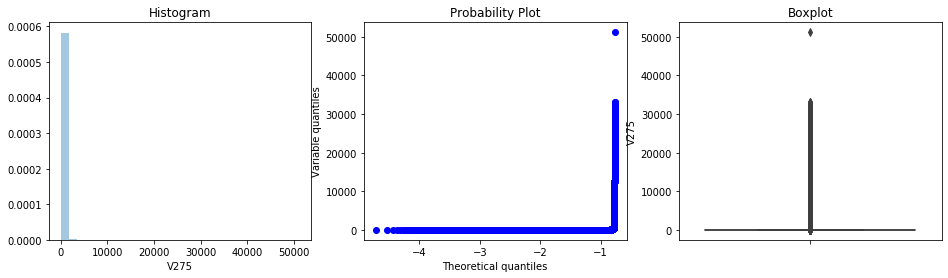

Feature: V276

count    130430.000000
mean         31.797277
std         615.659714
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V276, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


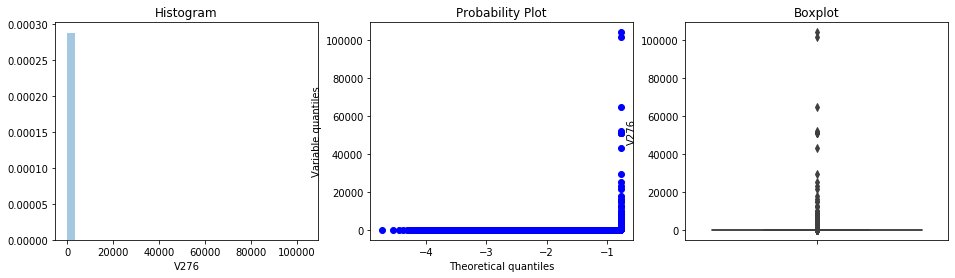

Feature: V277

count    130430.000000
mean         51.956645
std         732.145368
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V277, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


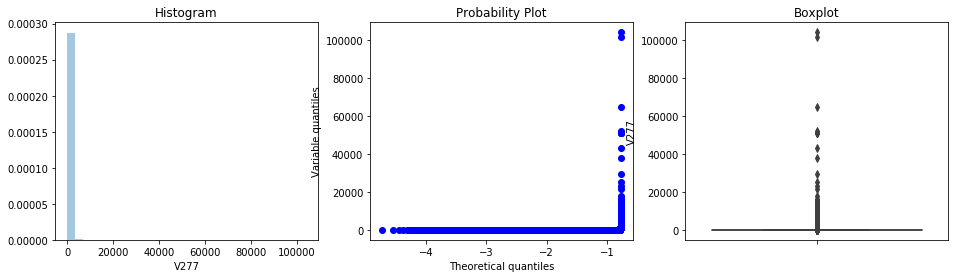

Feature: V278

count    130430.000000
mean         42.328228
std         660.611820
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V278, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


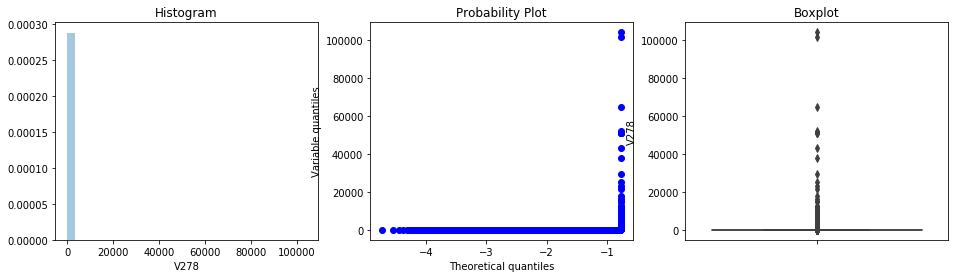

Feature: V279

count    590528.000000
mean          1.123061
std          21.021950
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         880.000000
Name: V279, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


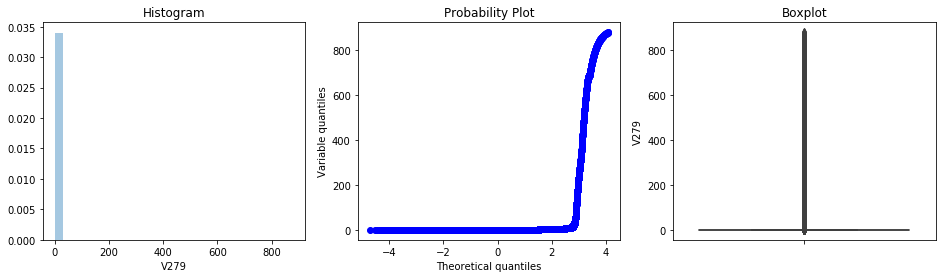

Feature: V280

count    590528.000000
mean          1.967082
std          27.851780
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         975.000000
Name: V280, dtype: float64
 


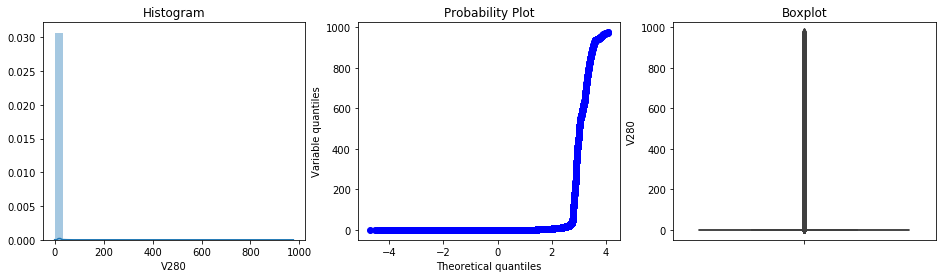

Feature: V281

count    589271.000000
mean          0.087783
std           0.512748
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          22.000000
Name: V281, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


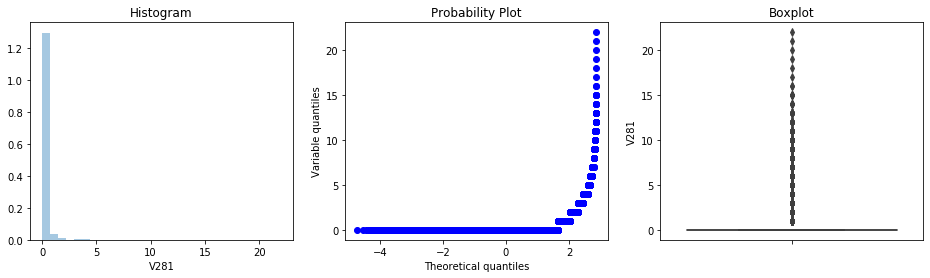

Feature: V282

count    589271.000000
mean          0.817171
std           0.921880
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          32.000000
Name: V282, dtype: float64
 


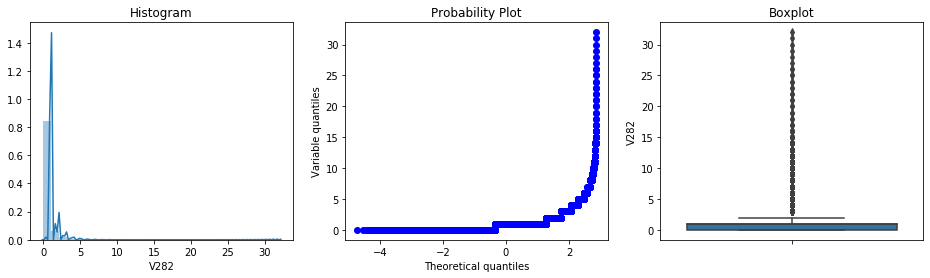

Feature: V283

count    589271.000000
mean          0.991114
std           1.558731
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          68.000000
Name: V283, dtype: float64
 


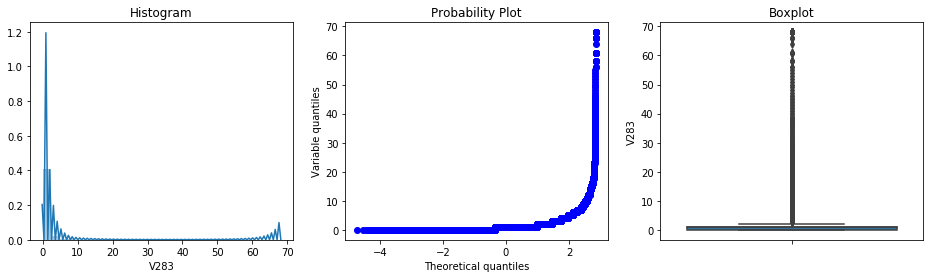

Feature: V284

count    590528.000000
mean          0.088543
std           0.338424
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: V284, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


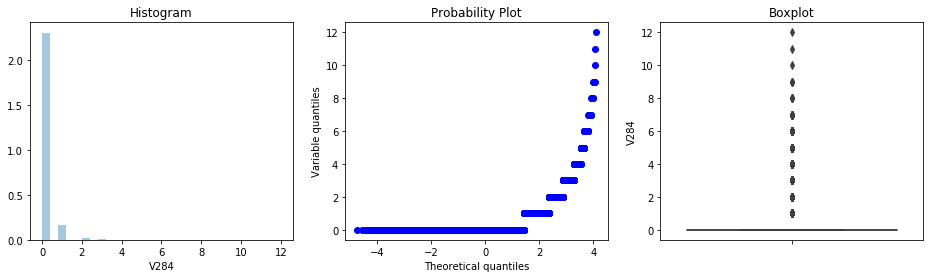

Feature: V285

count    590528.000000
mean          1.167660
std           3.282454
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          95.000000
Name: V285, dtype: float64
 


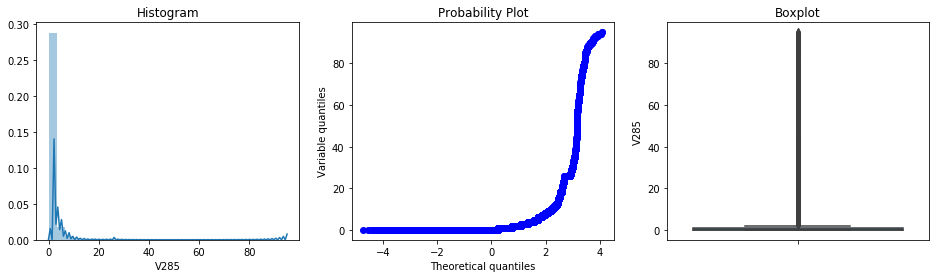

Feature: V286

count    590528.000000
mean          0.031492
std           0.190939
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: V286, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


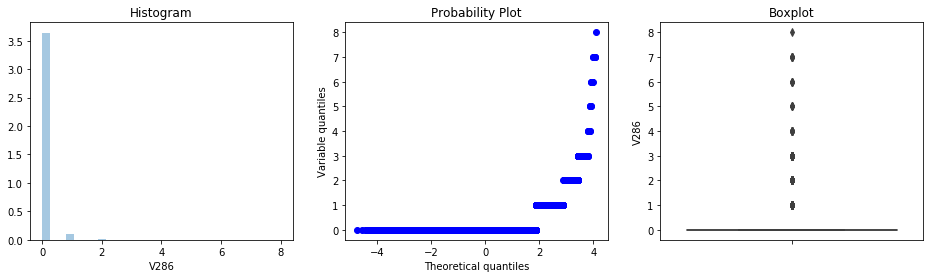

Feature: V287

count    590528.000000
mean          0.358579
std           1.078995
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          31.000000
Name: V287, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


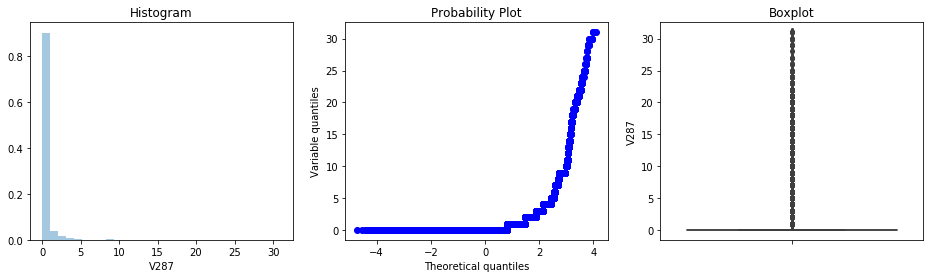

Feature: V288

count    589271.000000
mean          0.184350
std           0.430989
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: V288, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


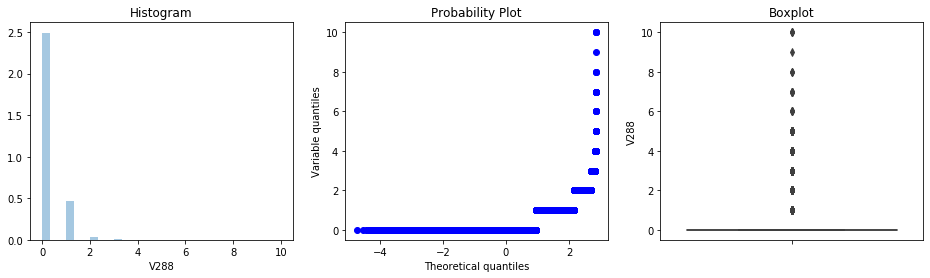

Feature: V289

count    589271.000000
mean          0.235975
std           0.599231
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: V289, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


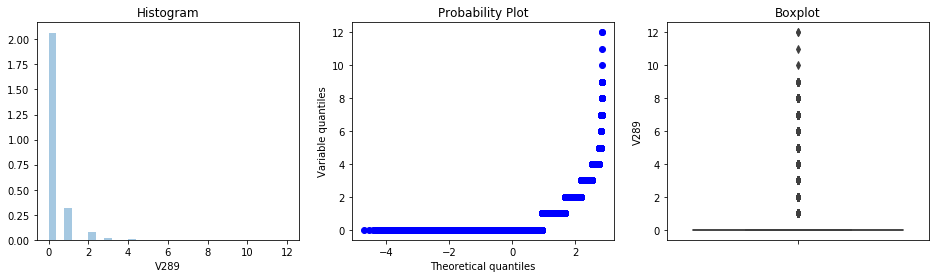

Feature: V290

count    590528.000000
mean          1.103011
std           0.768897
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          67.000000
Name: V290, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


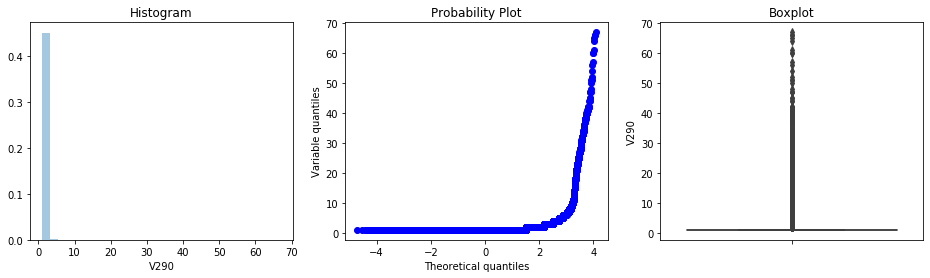

Feature: V291

count    590528.000000
mean          1.659811
std          16.252538
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1055.000000
Name: V291, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


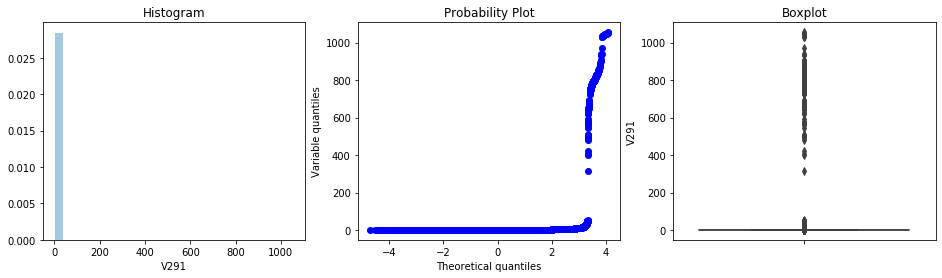

Feature: V292

count    590528.000000
mean          1.239916
std           3.775050
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         323.000000
Name: V292, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


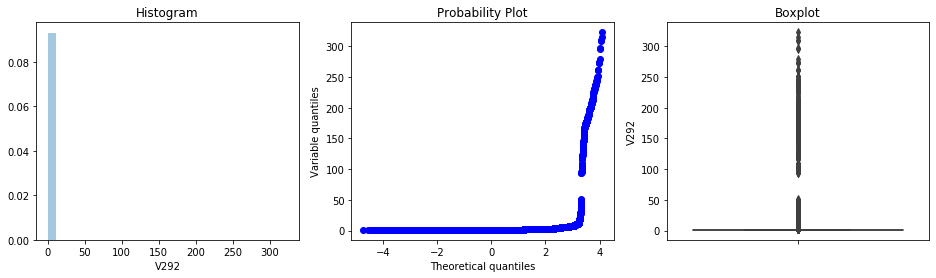

Feature: V293

count    590528.000000
mean          0.942599
std          20.588816
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         869.000000
Name: V293, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


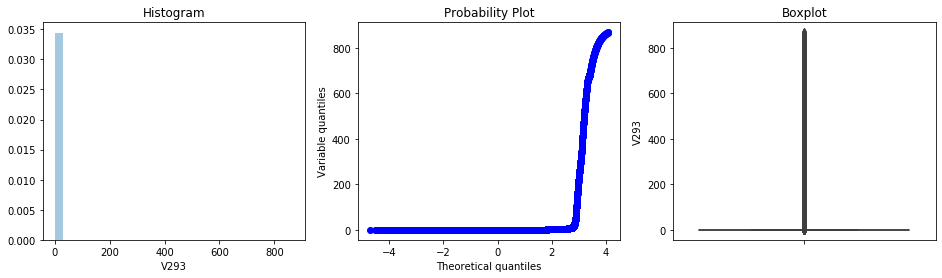

Feature: V294

count    590528.000000
mean          2.313863
std          39.526468
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1286.000000
Name: V294, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


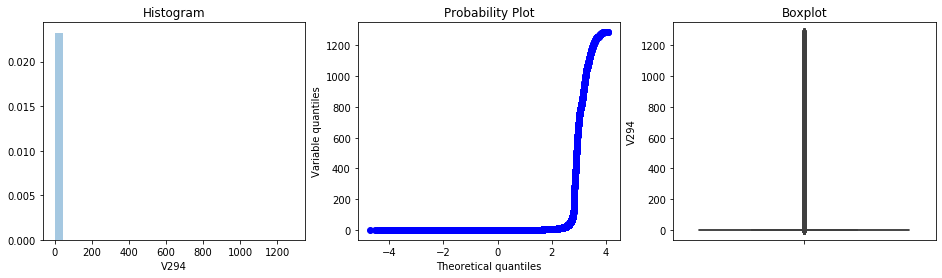

Feature: V295

count    590528.000000
mean          1.433424
std          25.962948
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         928.000000
Name: V295, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


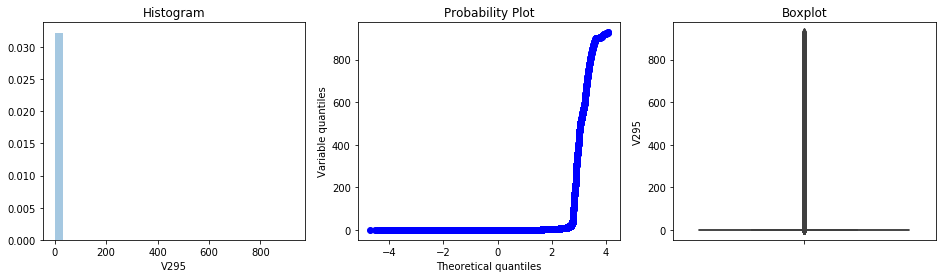

Feature: V296

count    589271.000000
mean          0.328917
std           3.264745
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          93.000000
Name: V296, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


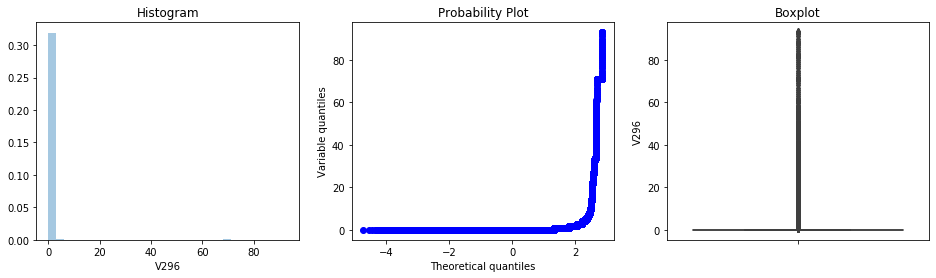

Feature: V297

count    590528.000000
mean          0.089034
std           0.628352
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: V297, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


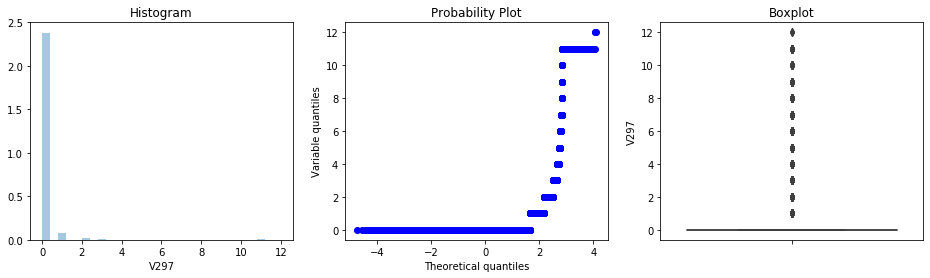

Feature: V298

count    590528.000000
mean          0.298829
std           3.175062
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          93.000000
Name: V298, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


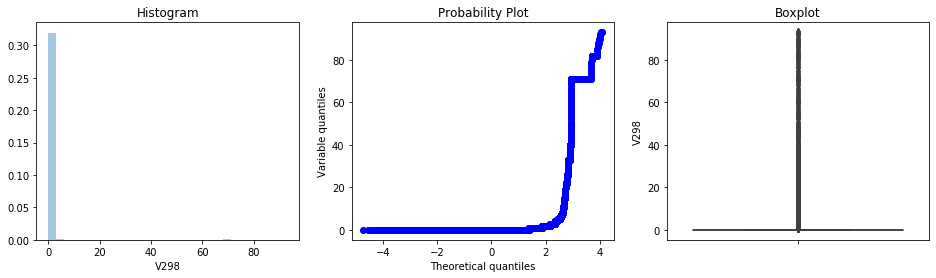

Feature: V299

count    590528.000000
mean          0.171655
std           1.724218
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          49.000000
Name: V299, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


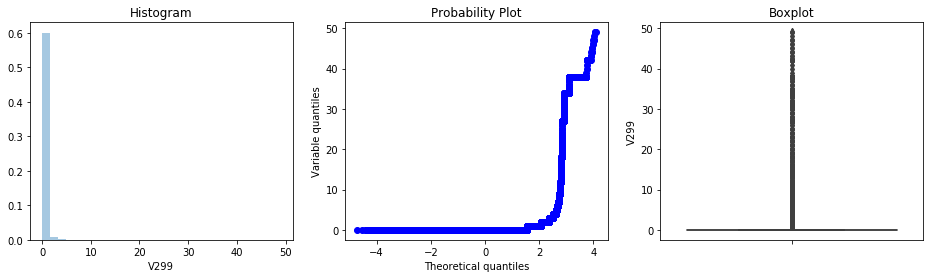

Feature: V300

count    589271.000000
mean          0.045507
std           0.289573
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: V300, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


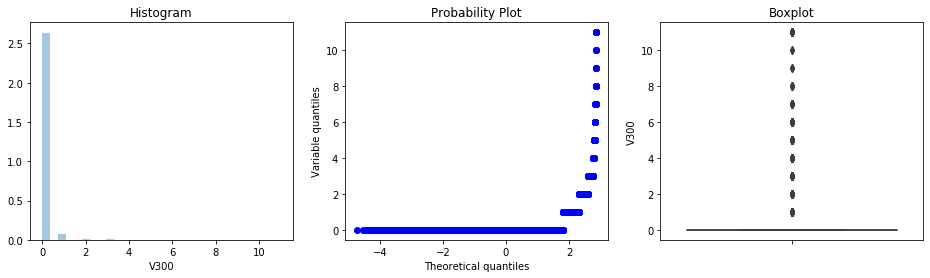

Feature: V301

count    589271.000000
mean          0.052002
std           0.318310
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: V301, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


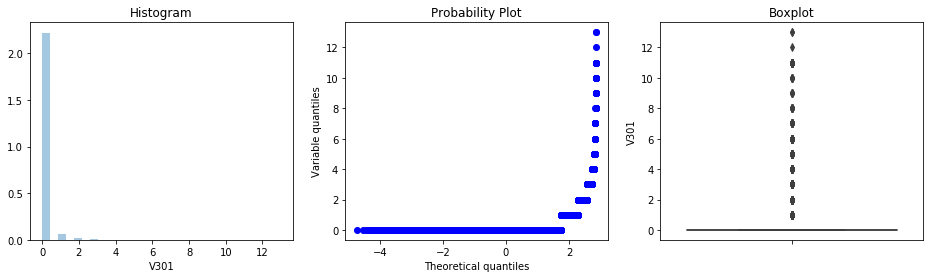

Feature: V302

count    590528.000000
mean          0.251761
std           0.481889
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: V302, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


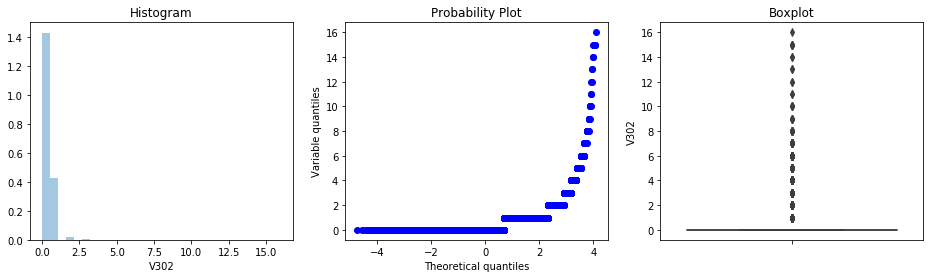

Feature: V303

count    590528.000000
mean          0.283140
std           0.623608
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: V303, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


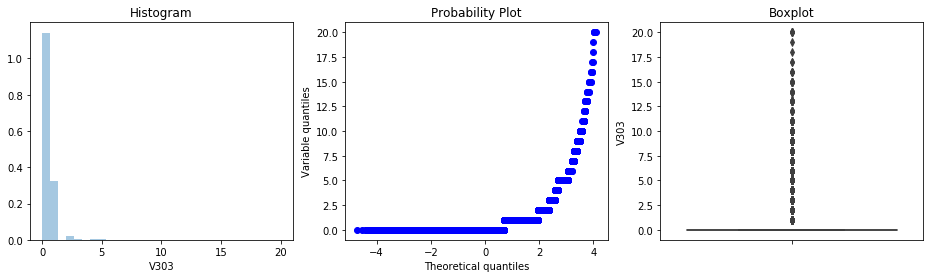

Feature: V304

count    590528.000000
mean          0.264208
std           0.528238
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: V304, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


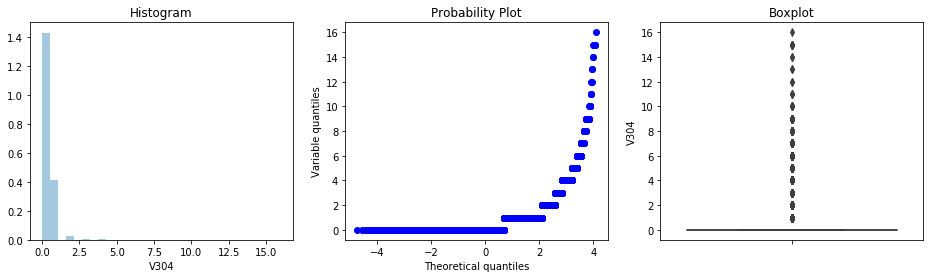

Feature: V305

count    590528.000000
mean          1.000007
std           0.002603
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: V305, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


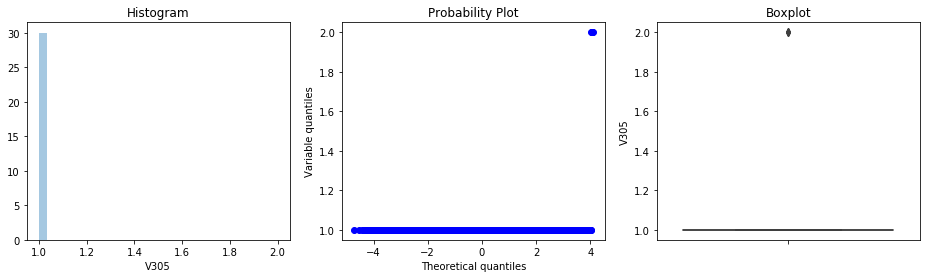

Feature: V306

count    590528.000000
mean        139.748713
std        2348.849634
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      108800.000000
Name: V306, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


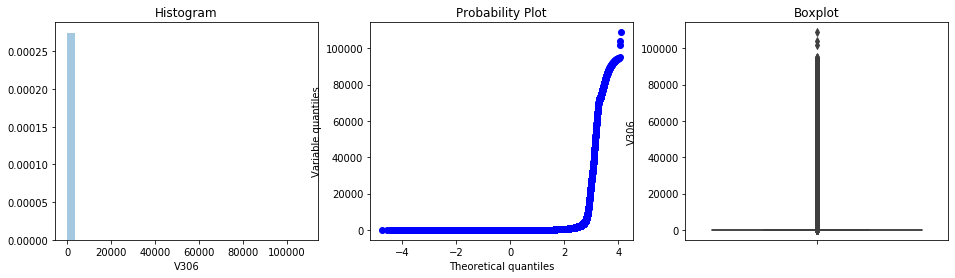

Feature: V307

count    590528.000000
mean        408.682375
std        4391.992977
min           0.000000
25%           0.000000
50%           0.000000
75%         151.380680
max      145765.000000
Name: V307, dtype: float64
 


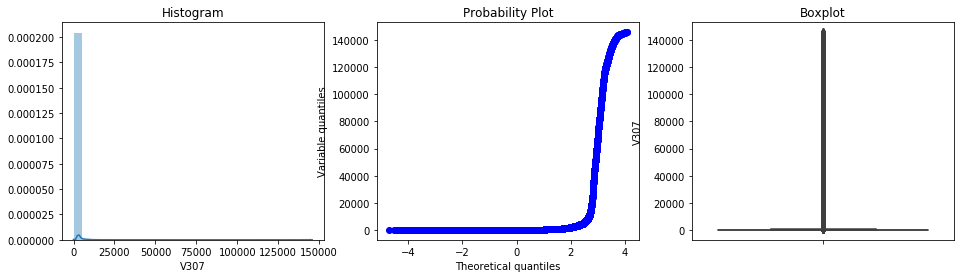

Feature: V308

count    590528.000000
mean        230.413180
std        3021.924247
min           0.000000
25%           0.000000
50%           0.000000
75%          35.970001
max      108800.000000
Name: V308, dtype: float64
 


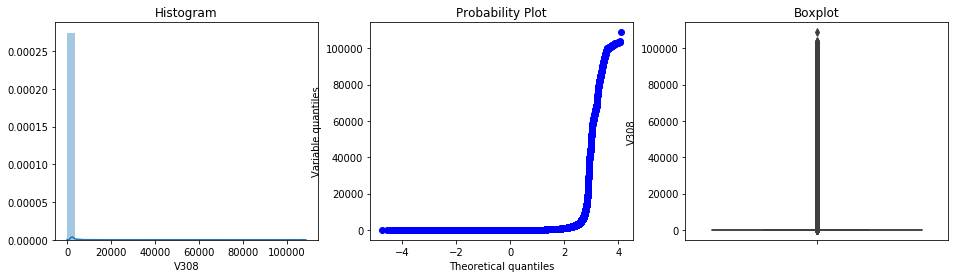

Feature: V309

count    590528.000000
mean         10.995986
std         116.254277
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V309, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


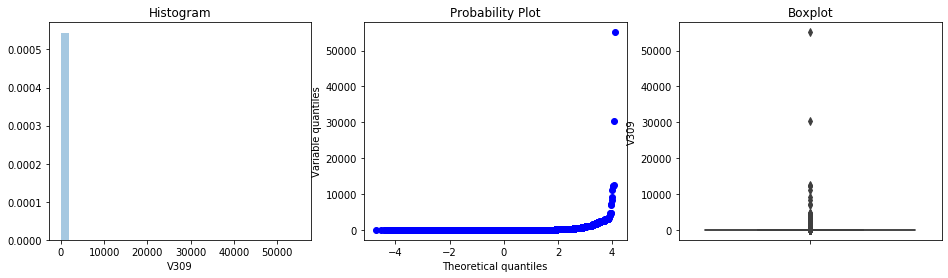

Feature: V310

count    590528.000000
mean        118.195658
std         352.983093
min           0.000000
25%           0.000000
50%           0.000000
75%         107.949997
max       55125.000000
Name: V310, dtype: float64
 


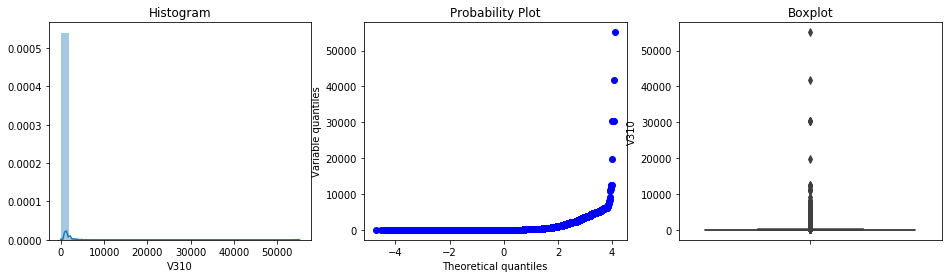

Feature: V311

count    590528.000000
mean          4.202175
std         102.374938
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V311, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


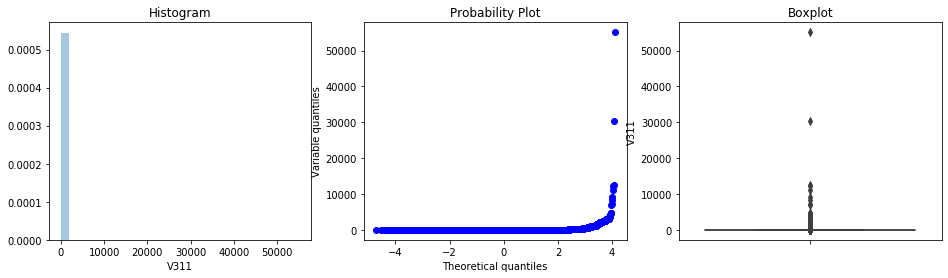

Feature: V312

count    590528.000000
mean         39.173910
std         172.128339
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V312, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


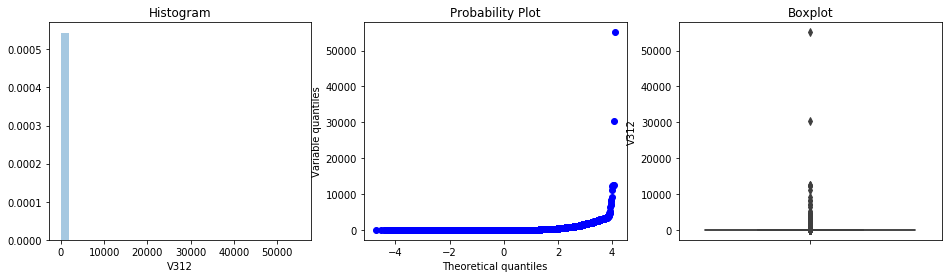

Feature: V313

count    589271.000000
mean         21.351473
std          95.902970
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4817.470215
Name: V313, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


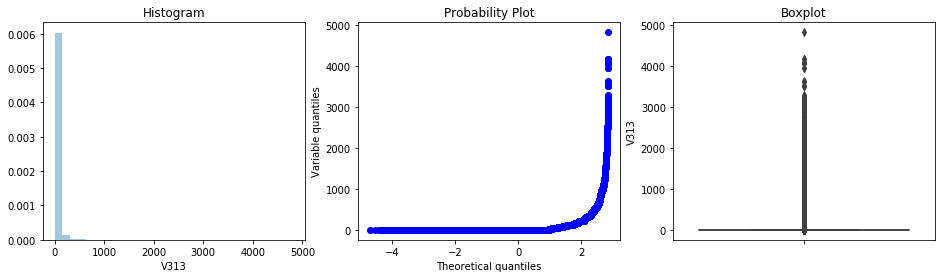

Feature: V314

count    589271.000000
mean         43.319174
std         173.619028
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7519.870117
Name: V314, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


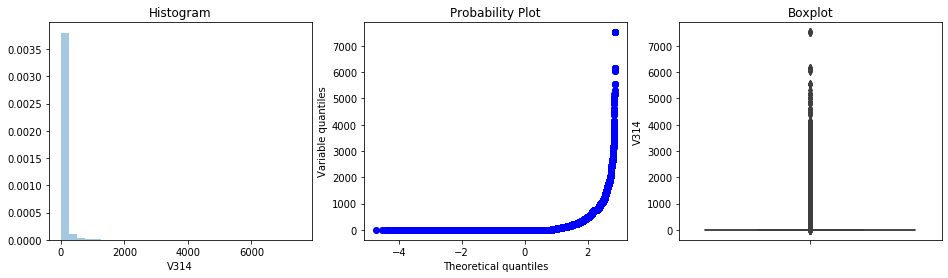

Feature: V315

count    589271.000000
mean         26.806977
std         116.853222
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4817.470215
Name: V315, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


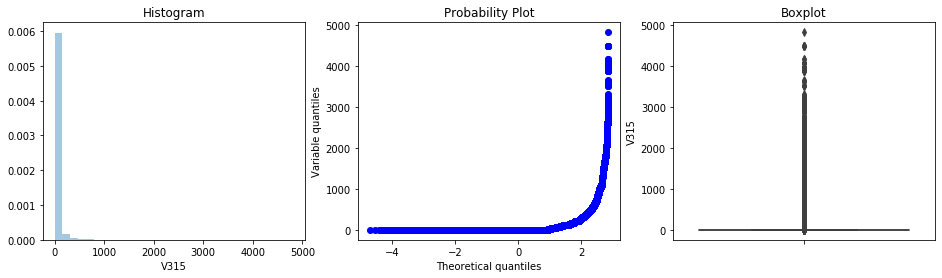

Feature: V316

count    590528.000000
mean        109.818544
std        2270.033202
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       93736.000000
Name: V316, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


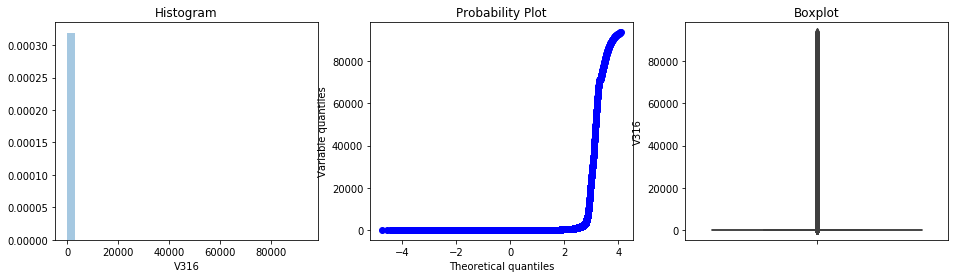

Feature: V317

count    590528.000000
mean        247.606741
std        3980.042828
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      134021.000000
Name: V317, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


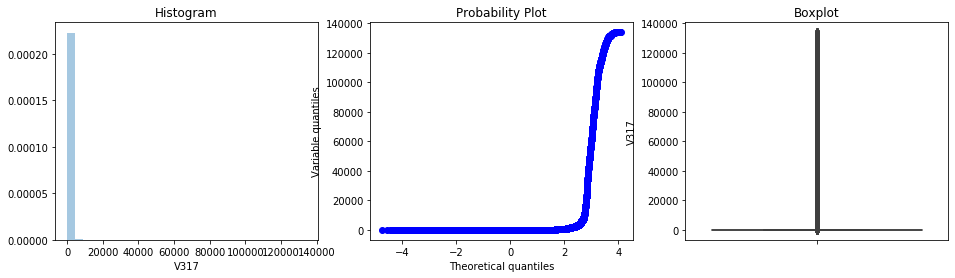

Feature: V318

count    590528.000000
mean        162.153398
std        2793.343636
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       98476.000000
Name: V318, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


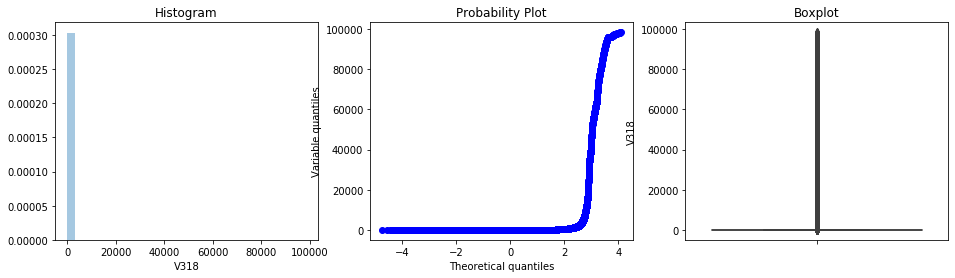

Feature: V319

count    590528.000000
mean         18.372476
std         332.304848
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V319, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


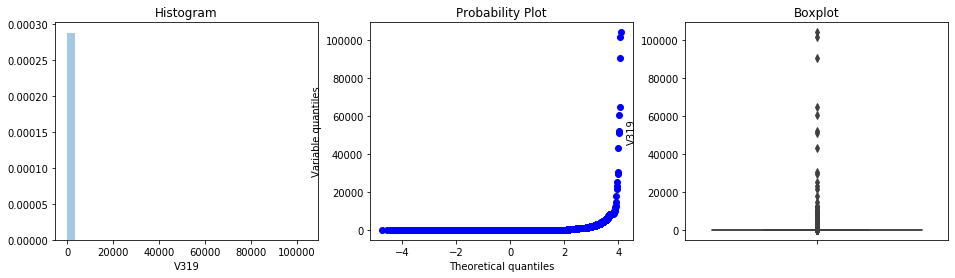

Feature: V320

count    590528.000000
mean         42.073133
std         473.499307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V320, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


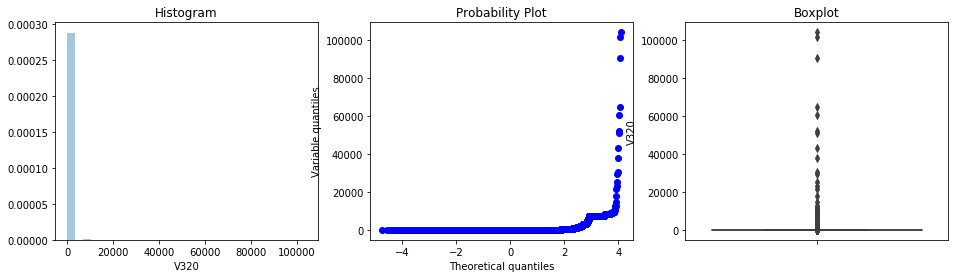

Feature: V321

count    590528.000000
mean         28.326584
std         382.053171
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V321, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


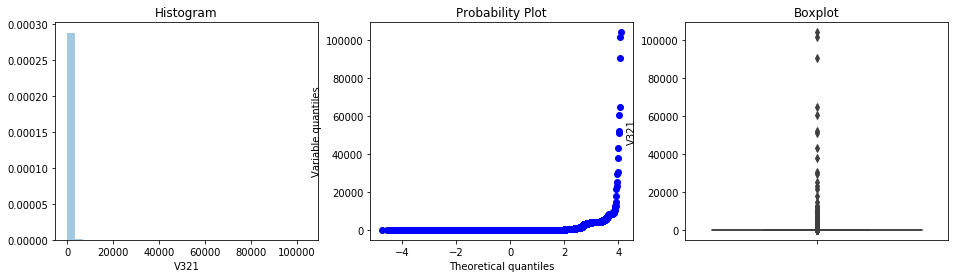

Feature: V322

count    82351.000000
mean         6.220289
std         56.022561
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        880.000000
Name: V322, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


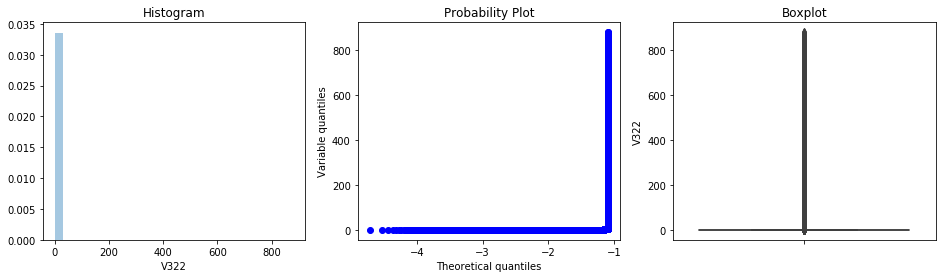

Feature: V323

count    82351.000000
mean        13.103775
std        106.739813
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1411.000000
Name: V323, dtype: float64
 


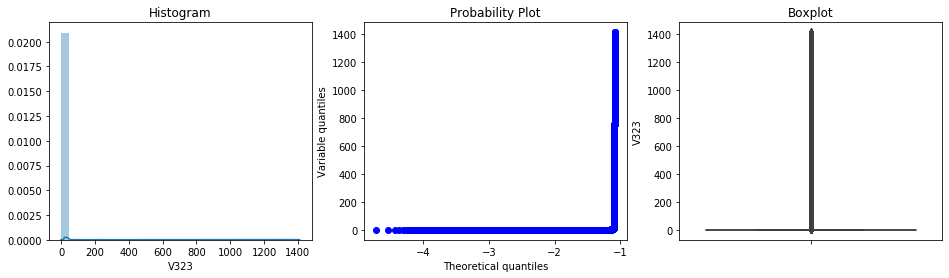

Feature: V324

count    82351.000000
mean         9.184612
std         73.627893
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        976.000000
Name: V324, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


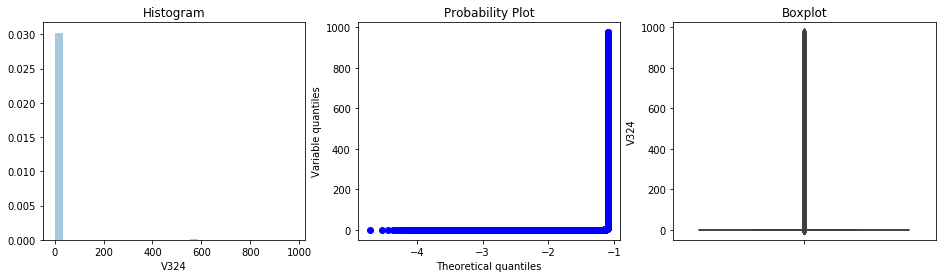

Feature: V325

count    82351.000000
mean         0.058494
std          0.304415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: V325, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


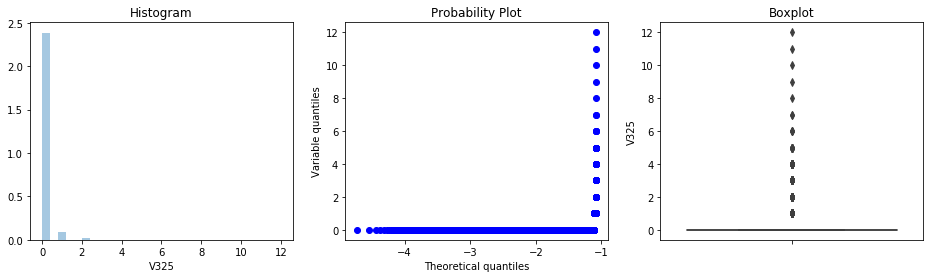

Feature: V326

count    82351.000000
mean         0.851040
std          3.950295
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: V326, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


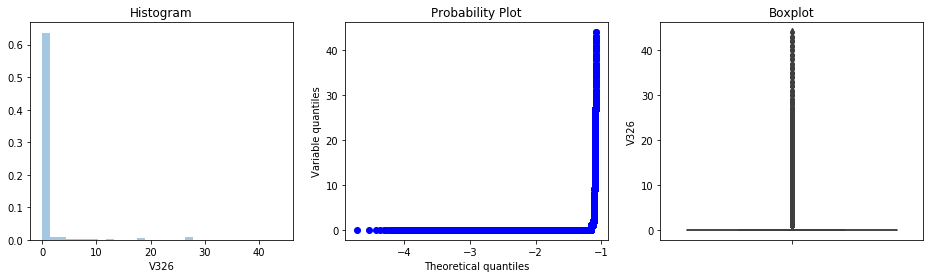

Feature: V327

count    82351.000000
mean         0.296633
std          1.364356
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: V327, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


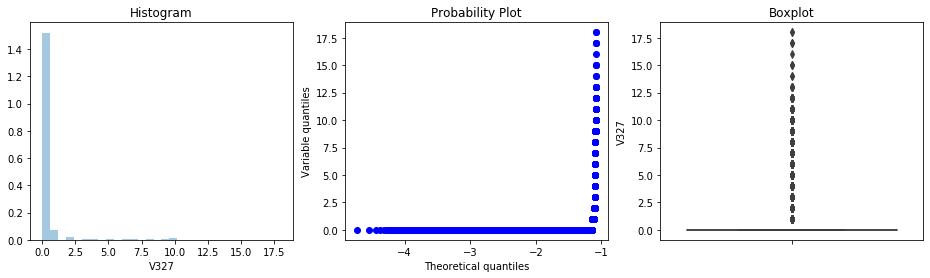

Feature: V328

count    82351.000000
mean         0.336790
std          1.580144
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: V328, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


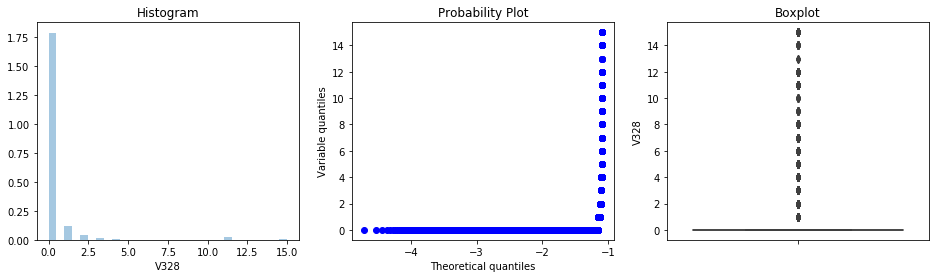

Feature: V329

count    82351.000000
mean         1.312844
std          8.769083
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         99.000000
Name: V329, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


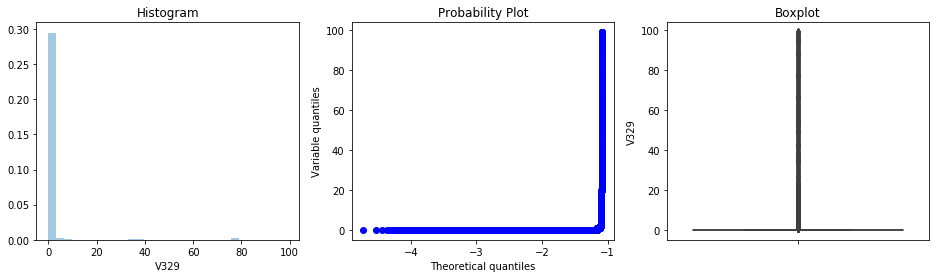

Feature: V330

count    82351.000000
mean         0.775874
std          4.727971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         55.000000
Name: V330, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


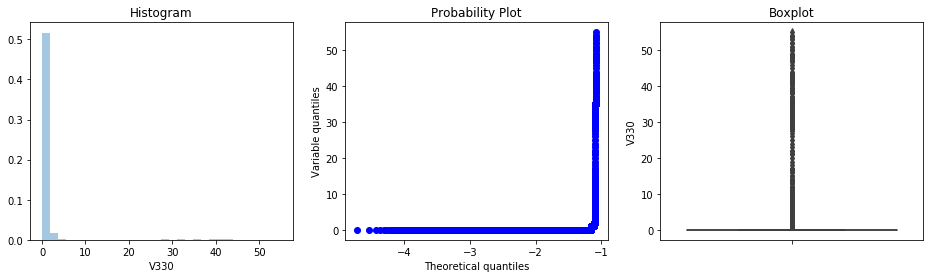

Feature: V331

count     82351.000000
mean        721.741883
std        6217.223583
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      160000.000000
Name: V331, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


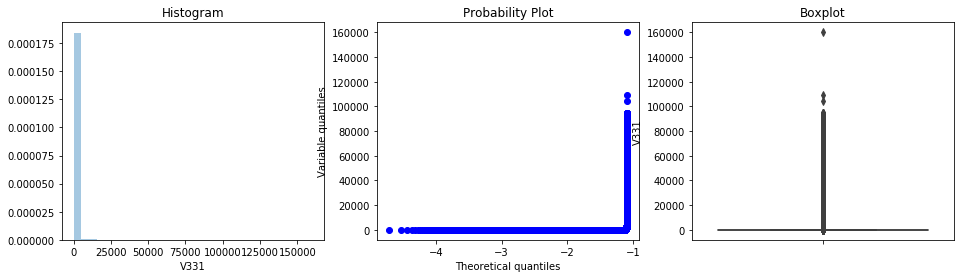

Feature: V332

count     82351.000000
mean       1375.783644
std       11169.275702
min           0.000000
25%           0.000000
50%           0.000000
75%          25.000000
max      160000.000000
Name: V332, dtype: float64
 


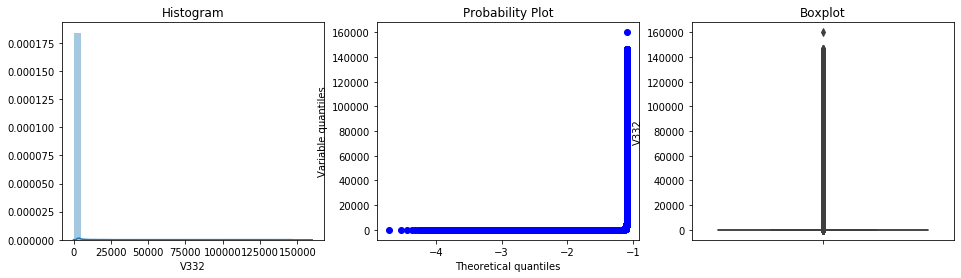

Feature: V333

count     82351.000000
mean       1014.622782
std        7955.735482
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      160000.000000
Name: V333, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


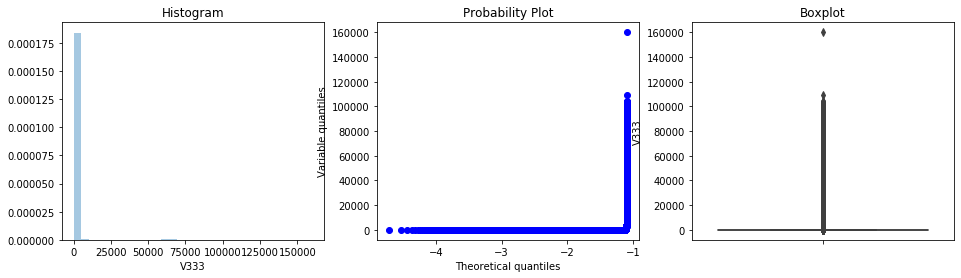

Feature: V334

count    82351.000000
mean         9.807015
std        243.861391
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      55125.000000
Name: V334, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


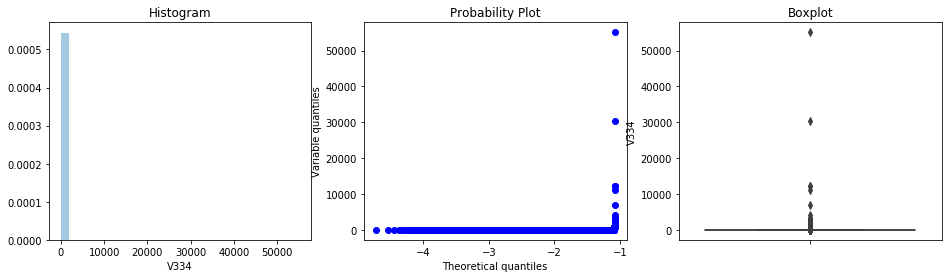

Feature: V335

count    82351.00000
mean        59.16455
std        387.62948
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      55125.00000
Name: V335, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


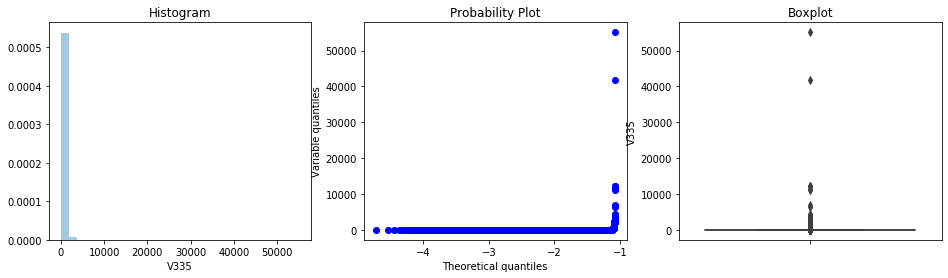

Feature: V336

count    82351.000000
mean        28.530903
std        274.576920
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      55125.000000
Name: V336, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


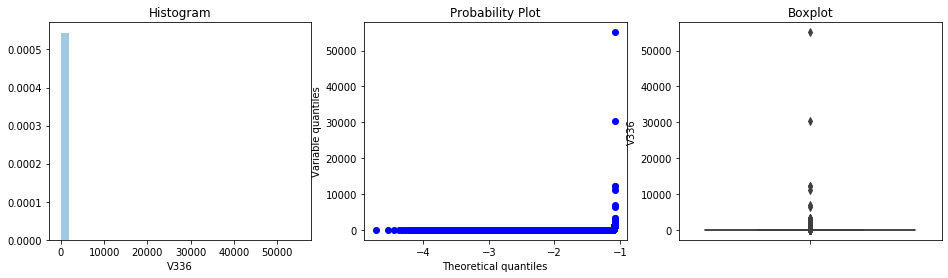

Feature: V337

count     82351.000000
mean         55.352422
std         668.486833
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V337, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


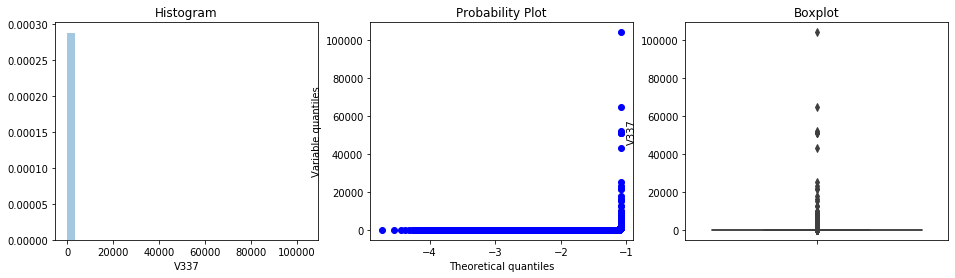

Feature: V338

count     82351.000000
mean        151.160542
std        1095.034387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V338, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


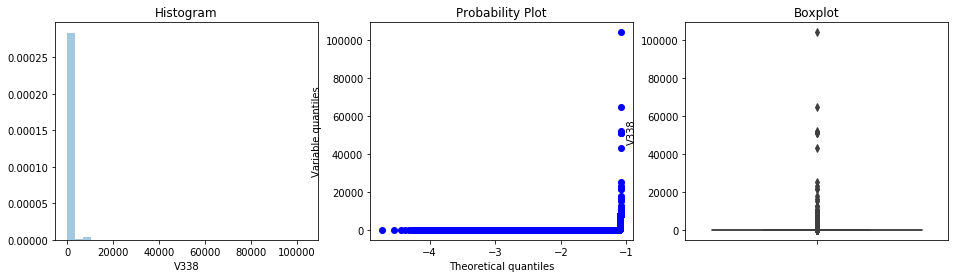

Feature: V339

count     82351.000000
mean        100.700882
std         814.946722
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V339, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


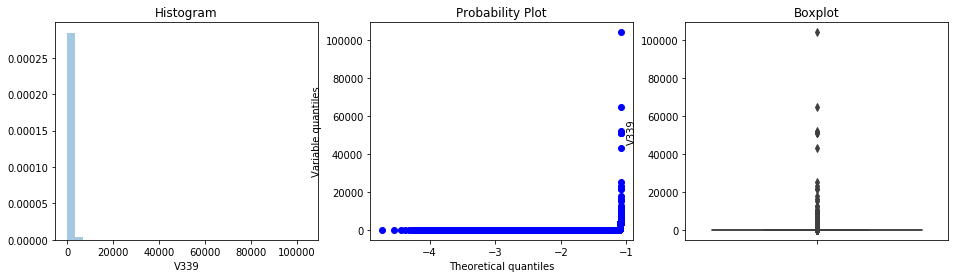

Feature: id_01

count    144233.000000
mean        -10.170502
std          14.347949
min        -100.000000
25%         -10.000000
50%          -5.000000
75%          -5.000000
max           0.000000
Name: id_01, dtype: float64
 


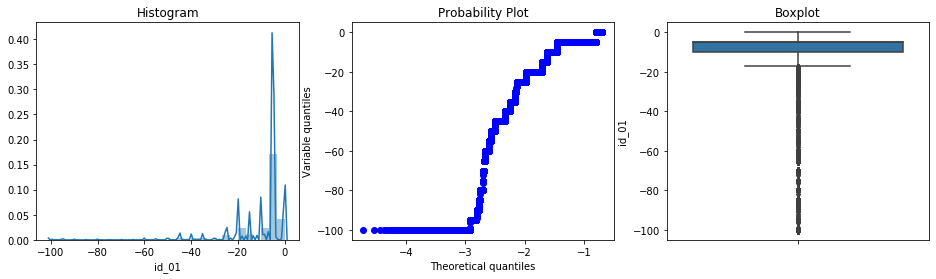

Feature: id_02

count    140872.000000
mean     174716.584708
std      159651.816856
min           1.000000
25%       67992.000000
50%      125800.500000
75%      228749.000000
max      999595.000000
Name: id_02, dtype: float64
 


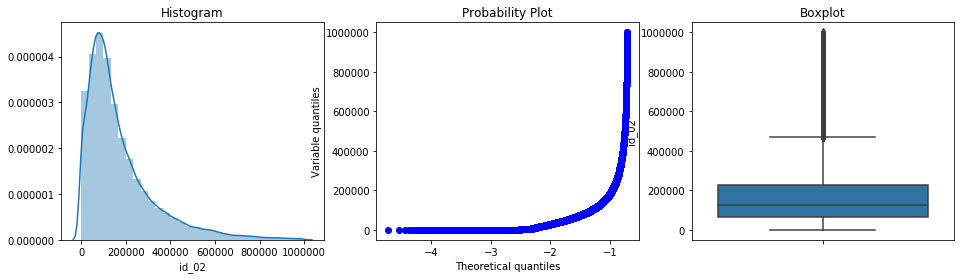

Feature: id_03

count    66324.000000
mean         0.060189
std          0.598231
min        -13.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: id_03, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


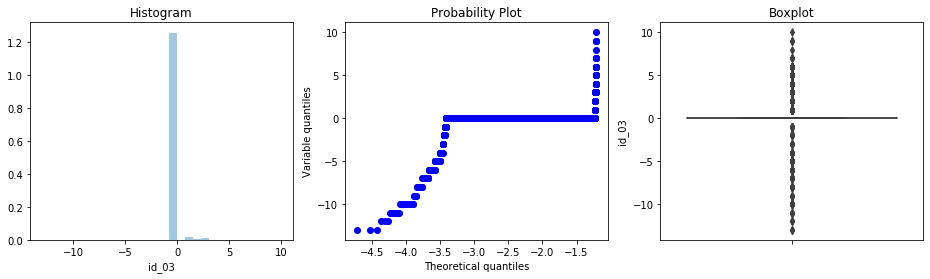

Feature: id_04

count    66324.000000
mean        -0.058938
std          0.701015
min        -28.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: id_04, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


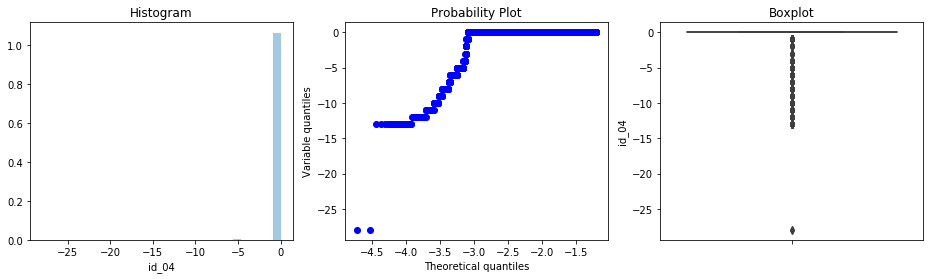

Feature: id_05

count    136865.000000
mean          1.615585
std           5.249856
min         -72.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          52.000000
Name: id_05, dtype: float64
 


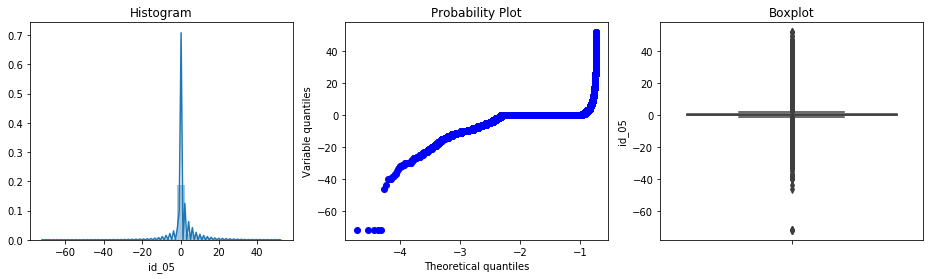

Feature: id_06

count    136865.000000
mean         -6.698710
std          16.491104
min        -100.000000
25%          -6.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: id_06, dtype: float64
 


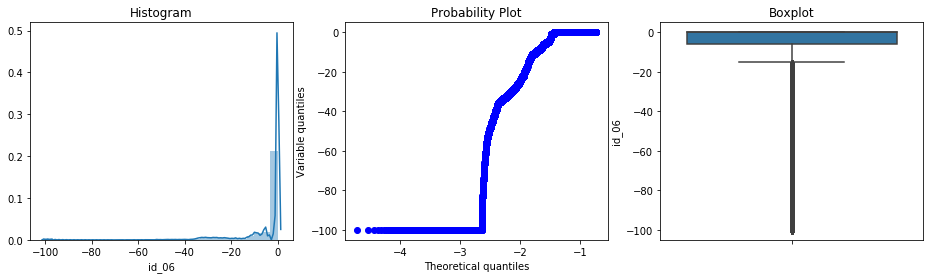

Feature: id_07

count    5155.000000
mean       13.285354
std        11.384207
min       -46.000000
25%         5.000000
50%        14.000000
75%        22.000000
max        61.000000
Name: id_07, dtype: float64
 


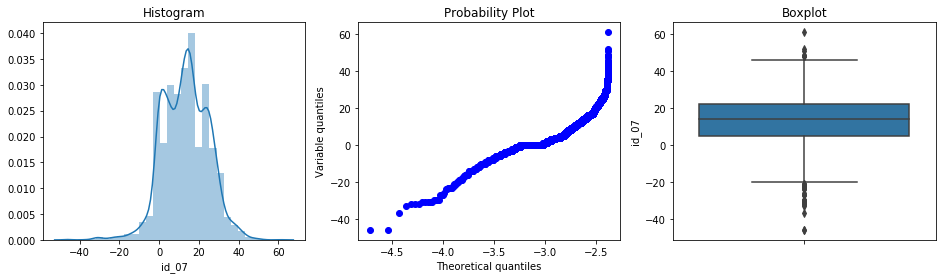

Feature: id_08

count    5155.000000
mean      -38.600388
std        26.084899
min      -100.000000
25%       -48.000000
50%       -34.000000
75%       -23.000000
max         0.000000
Name: id_08, dtype: float64
 


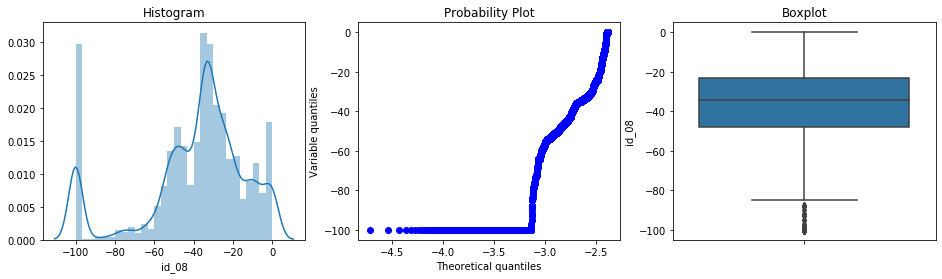

Feature: id_09

count    74926.000000
mean         0.091023
std          0.983842
min        -36.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         25.000000
Name: id_09, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


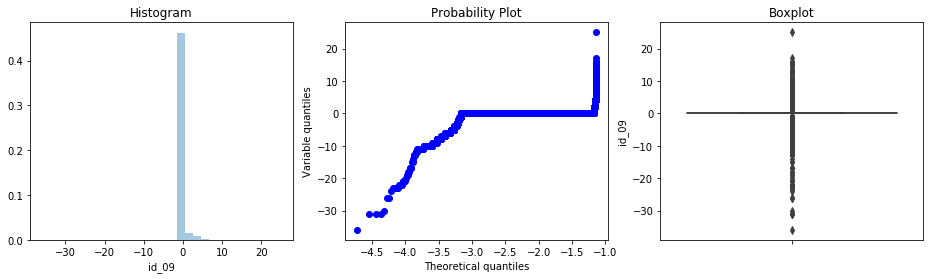

Feature: id_10

count    74926.000000
mean        -0.301124
std          2.789446
min       -100.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: id_10, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


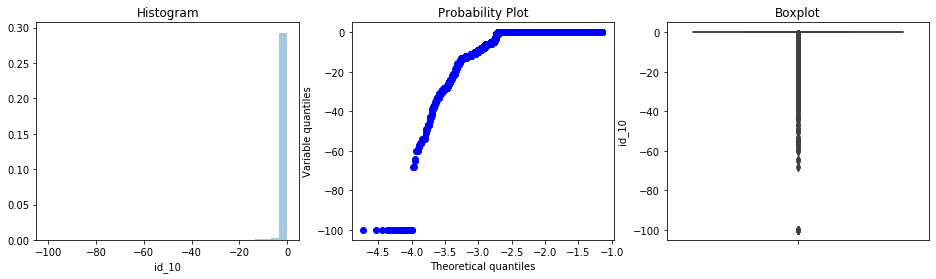

Feature: id_11

count    140978.000000
mean         99.745325
std           1.127602
min          90.000000
25%         100.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: id_11, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


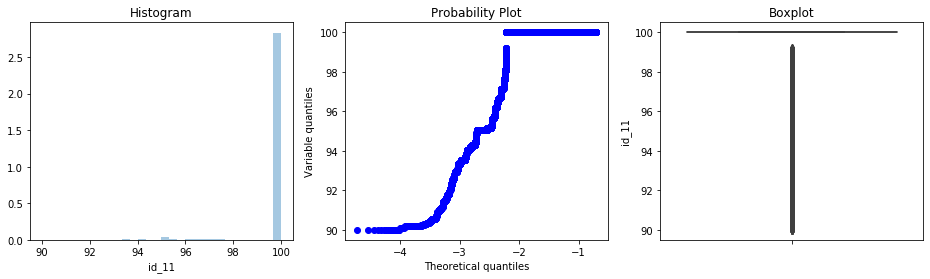

Feature: id_13

count    127320.000000
mean         48.053071
std          11.774858
min          10.000000
25%          49.000000
50%          52.000000
75%          52.000000
max          64.000000
Name: id_13, dtype: float64
 


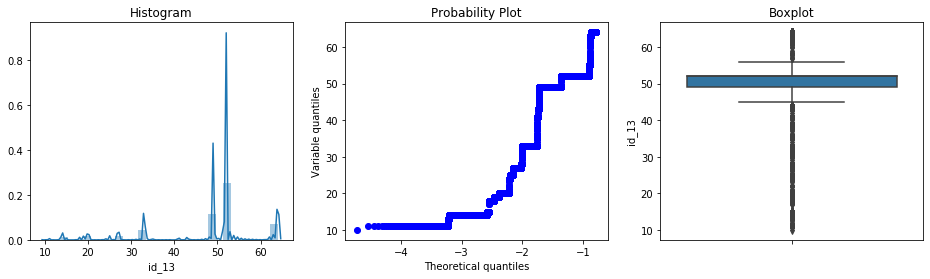

Feature: id_14

count    80044.000000
mean      -344.507146
std         93.695502
min       -660.000000
25%       -360.000000
50%       -300.000000
75%       -300.000000
max        720.000000
Name: id_14, dtype: float64
 


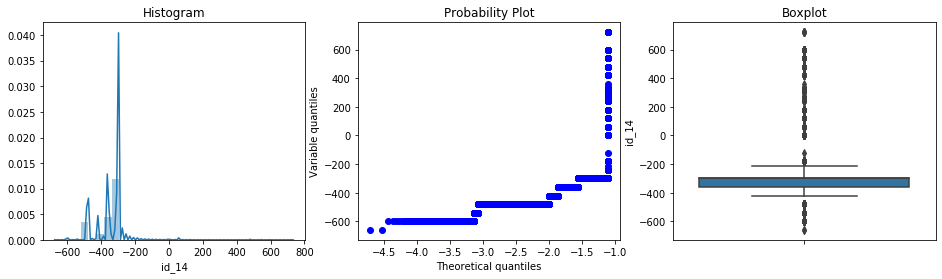

Feature: id_17

count    139369.000000
mean        189.451377
std          30.375360
min         100.000000
25%         166.000000
50%         166.000000
75%         225.000000
max         229.000000
Name: id_17, dtype: float64
 


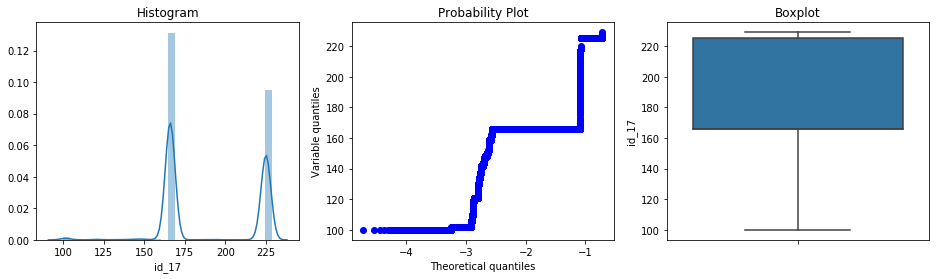

Feature: id_18

count    45113.000000
mean        14.237337
std          1.561302
min         10.000000
25%         13.000000
50%         15.000000
75%         15.000000
max         29.000000
Name: id_18, dtype: float64
 


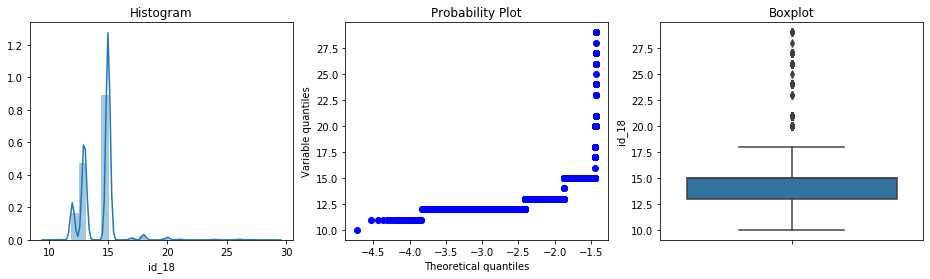

Feature: id_19

count    139318.000000
mean        353.128174
std         141.095343
min         100.000000
25%         266.000000
50%         341.000000
75%         427.000000
max         671.000000
Name: id_19, dtype: float64
 


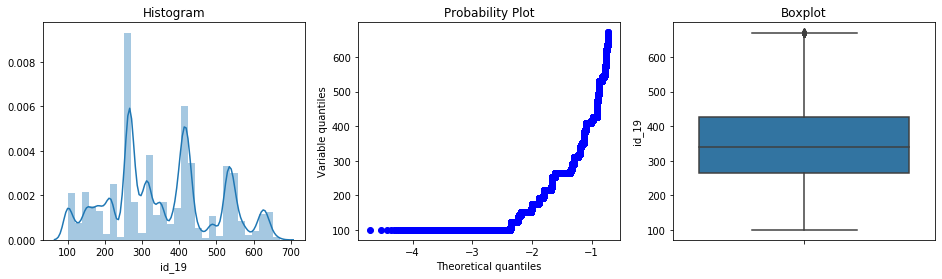

Feature: id_20

count    139261.000000
mean        403.882666
std         152.160327
min         100.000000
25%         256.000000
50%         472.000000
75%         533.000000
max         661.000000
Name: id_20, dtype: float64
 


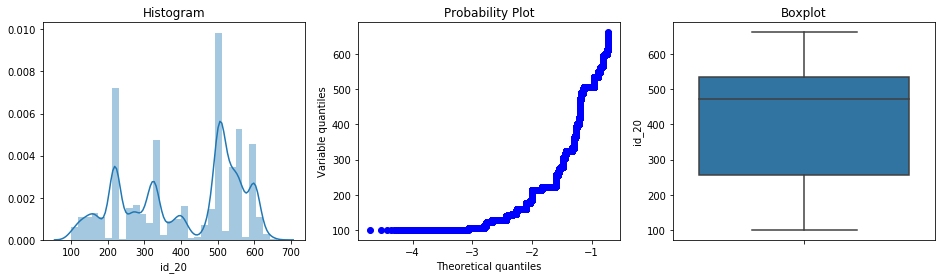

Feature: id_21

count    5159.000000
mean      368.269820
std       198.847038
min       100.000000
25%       252.000000
50%       252.000000
75%       486.500000
max       854.000000
Name: id_21, dtype: float64
 


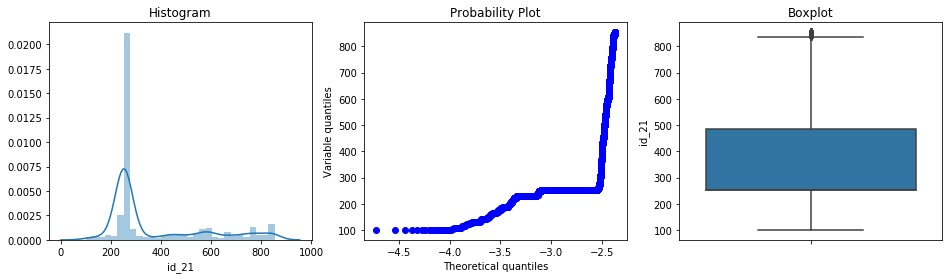

Feature: id_22

count    5169.000000
mean       16.002708
std         6.897665
min        10.000000
25%        14.000000
50%        14.000000
75%        14.000000
max        44.000000
Name: id_22, dtype: float64
 


C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


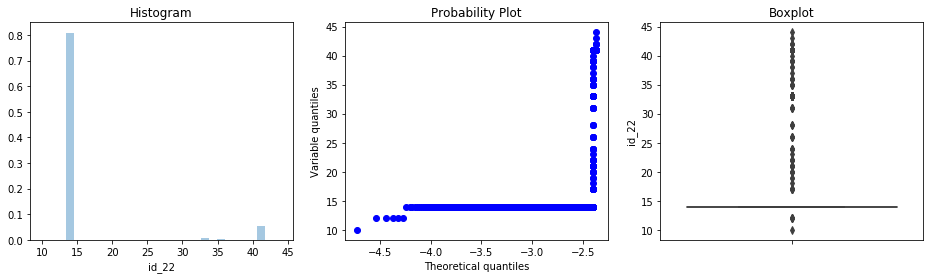

Feature: id_24

count    4747.000000
mean       12.800927
std         2.372447
min        11.000000
25%        11.000000
50%        11.000000
75%        15.000000
max        26.000000
Name: id_24, dtype: float64
 


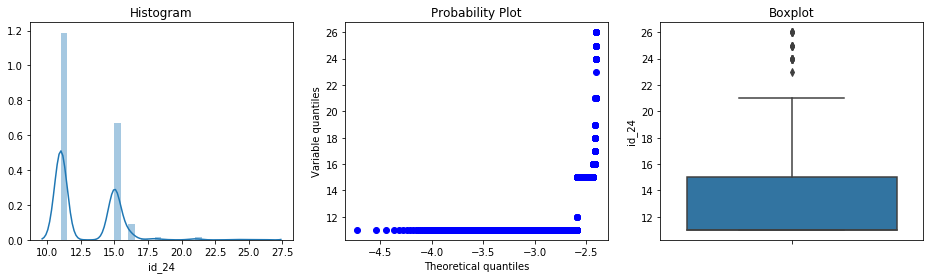

Feature: id_25

count    5132.000000
mean      329.608924
std        97.461089
min       100.000000
25%       321.000000
50%       321.000000
75%       371.000000
max       548.000000
Name: id_25, dtype: float64
 


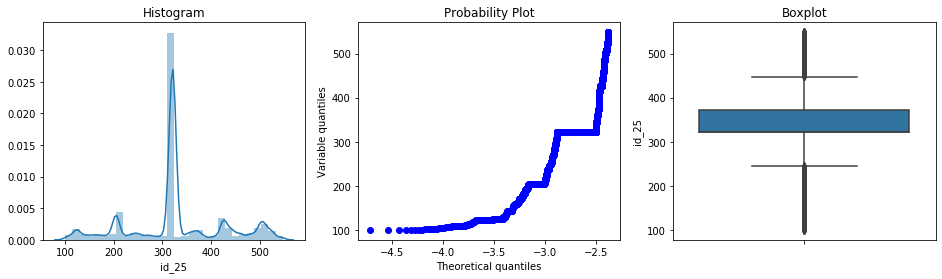

Feature: id_26

count    5163.000000
mean      149.070308
std        32.101995
min       100.000000
25%       119.000000
50%       149.000000
75%       169.000000
max       216.000000
Name: id_26, dtype: float64
 


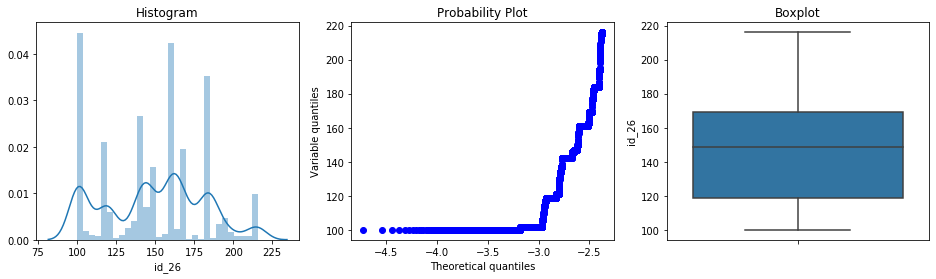

Feature: id_32

count    77586.000000
mean        26.508597
std          3.737502
min          0.000000
25%         24.000000
50%         24.000000
75%         32.000000
max         32.000000
Name: id_32, dtype: float64
 


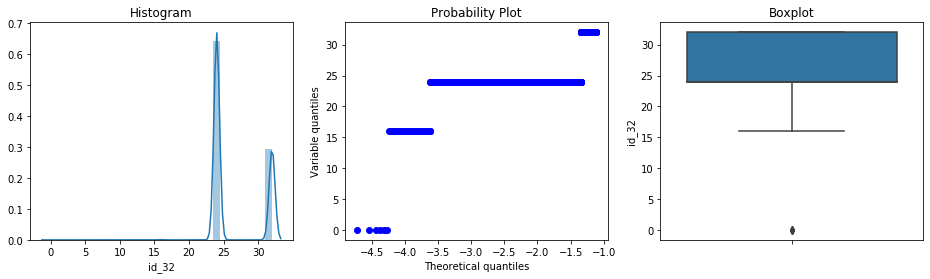

In [16]:
#### Numeric variables ####
for feat in NUMERIC:
    print( 'Feature:',feat)
    print('')
    print(train[feat].describe())
    print(' ')
    diagnostic_plots(train, feat)

In [17]:
for feat in CATEG:
    print( 'Feature:',feat)
    print('')
    print('Number of unique values:')
    print(train[feat].nunique())
    print('')
    print('Value distribution:')
    print((train[feat].value_counts().head(20)))
    print('')
    print('')

Feature: ProductCD

Number of unique values:
5

Value distribution:
W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64


Feature: card4

Number of unique values:
4

Value distribution:
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64


Feature: card6

Number of unique values:
4

Value distribution:
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64


Feature: P_emaildomain

Number of unique values:
59

Value distribution:
gmail.com        228355
yahoo.com        100934
hotmail.com       45250
anonymous.com     36998
aol.com           28289
comcast.net        7888
icloud.com         6267
outlook.com        5096
msn.com            4092
att.net            4033
live.com           3041
sbcglobal.net      2970
verizon.net        2705
ymail.com          2396
bellsouth.net      1909
yahoo.com.m